Related urls, will remove once finished:
- https://medium.com/data-science-in-your-pocket/automl-for-time-series-forecasting-using-autots-with-example-735fb559443a
- https://github.com/winedarksea/AutoTS#tips-for-speed-and-large-data

Import libraries

In [1]:
import pandas as pd
from autots import AutoTS
from autots.models.model_list import model_lists
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from metrics import print_evaluation_metrics

Load dataset

In [8]:
file_path = "../data/parsed_dataset.csv"
date_column = "Date"
target_column = "Close"
df = pd.read_csv(file_path, parse_dates=True)
df[date_column] = pd.to_datetime(df[date_column], format="%Y-%m-%d")


df.set_index(date_column, inplace=True)
dates = df.index.values
dates

array(['2014-09-24T00:00:00.000000000', '2014-09-25T00:00:00.000000000',
       '2014-09-26T00:00:00.000000000', ...,
       '2024-01-31T00:00:00.000000000', '2024-02-01T00:00:00.000000000',
       '2024-02-02T00:00:00.000000000'], dtype='datetime64[ns]')

Create model

In [9]:
data_length = len(df)
train_split = 0.9
model = AutoTS(
    forecast_length=(int(data_length*(1-train_split))),
    frequency="D",
    prediction_interval=0.95,
    ensemble=None,
    models_mode="gradient_boosting",
    model_list="univariate",
    max_generations=5,
    num_validations=3,
    no_negatives=True,
    transformer_list="fast",
    n_jobs="auto",
)

Using 6 cpus for n_jobs.


In [4]:
print(model_lists.keys())

dict_keys(['all', 'default', 'fast', 'superfast', 'parallel', 'fast_parallel', 'fast_parallel_no_arima', 'probabilistic', 'multivariate', 'univariate', 'no_params', 'recombination_approved', 'no_shared', 'no_shared_fast', 'experimental', 'slow', 'gpu', 'regressor', 'best', 'motifs', 'all_result_path', 'regressions', 'all_pragmatic', 'update_fit'])


In [5]:
print(model_lists["univariate"])

['ConstantNaive', 'UnivariateRegression', 'AverageValueNaive', 'LastValueNaive', 'SeasonalityMotif', 'UnobservedComponents', 'ARCH', 'GLM', 'KalmanStateSpace', 'FBProphet', 'DatepartRegression', 'GLS', 'PreprocessingRegression', 'MetricMotif', 'NeuralProphet', 'ARDL', 'FFT', 'ARIMA', 'ETS', 'MLEnsemble', 'SeasonalNaive', 'UnivariateMotif', 'Theta']


Train test split, fit and prediction

In [10]:
train = df.iloc[:int(data_length*train_split)]
test = df.iloc[int(data_length*train_split):]
model.fit(train)
prediction = model.predict(forecast_length=len(test))

Data frequency is: D, used frequency is: D
Model Number: 1 with model ARIMA in generation 0 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.04362D+00    |proj g|=  1.27375D-02
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.04354D+00    |proj g|=  1.28181D-02
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.04345D+00    |proj g|=  1.32331D-02
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.04188D+00    |proj g|= 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    2    f=  8.04304D+00    |proj g|=  8.18405D-03

At iterate    1    f=  8.04316D+00    |proj g|=  1.24880D-02

At iterate    1    f=  8.04153D+00    |proj g|=  7.67563D-03

At iterate    1    f=  8.04319D+00    |proj g|=  5.73094D-03

At iterate    1    f=  8.04328D+00    |proj g|=  5.87260D-03

At iterate    1    f=  8.04318D+00    |proj g|=  1.39699D-02

At iterate    3    f=  8.04302D+00    |proj g|=  4.87764D-03

At iterate    2    f=  8.04299D+00    |proj g|=  9.50127D-03

At iterate    2    f=  8.04295D+00    |proj g|=  8.84987D-03

At iterate    2    f=  8.04145D+00    |proj g|=  1.10682D-02

At iterate    2    f=  8.04314D+00    |proj g|=  6.74377D-03

At iterate    2    f=  8.04322D+00    |proj g|=  6.87457D-03

At iterate    4    f=  8.04301D+00    |proj g|=  2.03196D-03

At iterate    3    f=  8.04293D+00    |proj g|=  3.91780D-03

At iterate    3    f=  8.04296D+00    |proj g|=  2.73336D-03

At iterate    3    f=  8.04140D+00    |proj g|=  2.85634D-03

At iter

 This problem is unconstrained.



At iterate   72    f=  8.03635D+00    |proj g|=  5.76740D-03

At iterate   76    f=  8.03615D+00    |proj g|=  7.27580D-03

At iterate   82    f=  8.03560D+00    |proj g|=  1.84332D-02

At iterate   87    f=  8.03591D+00    |proj g|=  4.99312D-03

At iterate   73    f=  8.03634D+00    |proj g|=  7.02648D-03

At iterate    1    f=  8.04144D+00    |proj g|=  8.36387D-03

At iterate   77    f=  8.03583D+00    |proj g|=  1.52338D-02

At iterate   77    f=  8.03614D+00    |proj g|=  1.34163D-02

At iterate   83    f=  8.03559D+00    |proj g|=  6.13405D-03

At iterate   88    f=  8.03590D+00    |proj g|=  5.94303D-03

At iterate    2    f=  8.04137D+00    |proj g|=  1.11016D-02

At iterate   74    f=  8.03634D+00    |proj g|=  1.85728D-02

At iterate   78    f=  8.03611D+00    |proj g|=  1.86547D-02

At iterate   84    f=  8.03559D+00    |proj g|=  3.61580D-03

At iterate    3    f=  8.04132D+00    |proj g|=  2.00123D-03

At iterate   89    f=  8.03590D+00    |proj g|=  2.41541D-03

At iter

 This problem is unconstrained.



At iterate   19    f=  8.04030D+00    |proj g|=  1.54502D-02

At iterate   92    f=  8.03585D+00    |proj g|=  5.68912D-03

At iterate  105    f=  8.03571D+00    |proj g|=  2.65913D-03

At iterate    1    f=  8.04045D+00    |proj g|=  1.21660D-02

At iterate   93    f=  8.03585D+00    |proj g|=  4.27747D-03

At iterate  106    f=  8.03571D+00    |proj g|=  1.03456D-03

At iterate   87    f=  8.03607D+00    |proj g|=  1.26266D-02

At iterate   94    f=  8.03585D+00    |proj g|=  1.43308D-03

At iterate   20    f=  8.04028D+00    |proj g|=  7.11777D-03

At iterate    2    f=  8.04028D+00    |proj g|=  7.97644D-03

At iterate   95    f=  8.03584D+00    |proj g|=  2.58580D-03

At iterate  107    f=  8.03571D+00    |proj g|=  4.14808D-04

At iterate   88    f=  8.03606D+00    |proj g|=  5.95474D-03

At iterate   21    f=  8.04022D+00    |proj g|=  6.36870D-03

At iterate    3    f=  8.04026D+00    |proj g|=  2.45885D-03

At iterate   96    f=  8.03584D+00    |proj g|=  3.64070D-03

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3

Model Number: 7 with model DatepartRegression in generation 0 of 5
Model Number: 8 with model DatepartRegression in generation 0 of 5


2024-02-04 20:36:13.843595: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-04 20:36:13.962201: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-04 20:36:13.962243: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-04 20:36:13.978581: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-04 20:36:14.013092: I tensorflow/core/platform/cpu_feature_guar

Epoch 1/50
86/86 [==============================] - 3s 2ms/step - loss: 0.4230
Epoch 2/50
86/86 [==============================] - 0s 2ms/step - loss: 0.4224
Epoch 3/50
86/86 [==============================] - 0s 2ms/step - loss: 0.4224
Epoch 4/50
86/86 [==============================] - 0s 2ms/step - loss: 0.4223
Epoch 5/50
86/86 [==============================] - 0s 2ms/step - loss: 0.4224
Epoch 6/50
86/86 [==============================] - 0s 2ms/step - loss: 0.4223
Epoch 7/50
86/86 [==============================] - 0s 2ms/step - loss: 0.4222
Epoch 8/50
86/86 [==============================] - 0s 2ms/step - loss: 0.4222
Epoch 9/50
86/86 [==============================] - 0s 2ms/step - loss: 0.4222
Epoch 10/50
86/86 [==============================] - 0s 2ms/step - loss: 0.4222
Epoch 11/50
86/86 [==============================] - 0s 2ms/step - loss: 0.4221
Epoch 12/50
86/86 [==============================] - 0s 2ms/step - loss: 0.4221
Epoch 13/50
86/86 [==============================

/home/samuell/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


Model Number: 26 with model FBProphet in generation 0 of 5


Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
20:36:35 - cmdstanpy - INFO - Chain [1] start processing
20:36:35 - cmdstanpy - INFO - Chain [1] start processing
20:36:35 - cmdstanpy - INFO - Chain [1] start processing
20:36:35 - cmdstanpy - INFO - Chain [1] start processing
20:36:35 - cmdstanpy - INFO - Chain [1] start processing
20:36:35 - cmdstanpy - INFO - Chain [1] start processing
20:36:35 - cmdstanpy - INFO - Chain [1] done processing
20:36:35 - cmdstanpy - INFO - Chain [1] done processing
20:36:35 - cmdstanpy - INFO - Chain [1] done processing
20:36:35 - cmdstanpy - INFO - Chain [1] done processing
20:36:35 - cmdstanpy - INFO - Chain [1] done processing
20:36:35 - cmdstanpy - INFO - 

Model Number: 27 with model DatepartRegression in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 27 in generation 0: DatepartRegression
Model Number: 28 with model SeasonalNaive in generation 0 of 5
Model Number: 29 with model DatepartRegression in generation 0 of 5
Model Number: 30 with model UnobservedComponents in generation 0 of 5
Model Number: 31 with model UnobservedComponents in generation 0 of 5
Model Number: 32 with model ETS in generation 0 of 5
Model Number: 33 with model ARDL in generation 0 of 5
Model Number: 34 with model UnivariateMotif in generation 0 of 5
Model Number: 35 with model UnivariateMotif in generation 0 of 5
Model Number: 36 with model FBProphet in generation 0 of 5


Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
20:36:41 - cmdstanpy - INFO - Chain [1] start processing
20:36:41 - cmdstanpy - INFO - Chain [1] start processing
20:36:41 - cmdstanpy - INFO - Chain [1] start processing
20:36:41 - cmdstanpy - INFO - Chain [1] start processing
20:36:41 - cmdstanpy - INFO - Chain [1] start processing
20:36:41 - cmdstanpy - INFO - Chain [1] start processing
20:36:41 - cmdstanpy - INFO - Chain [1] done processing
20:36:42 - cmdstanpy - INFO - Chain [1] done processing
20:36:42 - cmdstanpy - INFO - Chain [1] done processing
20:36:42 - cmdstanpy - INFO - Chain [1] done processing
20:36:42 - cmdstanpy - INFO - Chain [1] done processing
20:36:42 - cmdstanpy - INFO - 

Model Number: 37 with model SeasonalNaive in generation 0 of 5
Model Number: 38 with model DatepartRegression in generation 0 of 5
Model Number: 39 with model Theta in generation 0 of 5
Model Number: 40 with model UnivariateRegression in generation 0 of 5
Model Number: 41 with model ARCH in generation 0 of 5
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 41 in generation 0: ARCH
Model Number: 42 with model SeasonalityMotif in generation 0 of 5
Model Number: 43 with model ConstantNaive in generation 0 of 5
Model Number: 44 with model UnivariateRegression in generation 0 of 5
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 44 in generation 0: UnivariateRegression
Model Number: 45 with model AverageValueNaive in generation 0 of 5
Model Number: 46 with model LastValueNaive in generation 0 of 5
Model Number: 47 with model SeasonalityMotif in generation 0 of 5
Model Number: 48 with model UnobservedComponents in generatio

Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
20:37:01 - cmdstanpy - INFO - Chain [1] start processing
20:37:01 - cmdstanpy - INFO - Chain [1] start processing
20:37:01 - cmdstanpy - INFO - Chain [1] start processing
20:37:01 - cmdstanpy - INFO - Chain [1] start processing
20:37:01 - cmdstanpy - INFO - Chain [1] start processing
20:37:01 - cmdstanpy - INFO - Chain [1] start processing
20:37:03 - cmdstanpy - INFO - Chain [1] done processing
20:37:03 - cmdstanpy - INFO - Chain [1] done processing
20:37:03 - cmdstanpy - INFO - Chain [1] done processing
20:37:03 - cmdstanpy - INFO - Chain [1] done processing
20:37:03 - cmdstanpy - INFO - Chain [1] done processing
20:37:04 - cmdstanpy - INFO - 

Model Number: 53 with model DatepartRegression in generation 0 of 5
Model Number: 54 with model GLS in generation 0 of 5
Model Number: 55 with model PreprocessingRegression in generation 0 of 5
Template Eval Error: ModuleNotFoundError("No module named 'xgboost'") in model 55 in generation 0: PreprocessingRegression
Model Number: 56 with model MetricMotif in generation 0 of 5
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 56 in generation 0: MetricMotif
Model Number: 57 with model NeuralProphet in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 57 in generation 0: NeuralProphet
Model Number: 58 with model ARDL in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 58 in generation 0: ARDL
Model Number: 59 with model FFT in generation 0 of 5
Model Number: 60 with model ARIMA in generation 0 of 5
RUNNING THE L-BFGS-B C

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


Model Number: 61 with model ETS in generation 0 of 5
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'ffill', 'transformations': {'0': 'IntermittentOccurrence', '1': 'AlignLastValue', '2': 'FFTDecomposition', '3': 'AlignLastValue', '4': 'IntermittentOccurrence', '5': 'AlignLastValue'}, 'transformation_params': {'0': {'center': 'mean'}, '1': {'rows': 7, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '2': {'n_harmonics': 10, 'detrend': None}, '3': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '4': {'center': 'mean'}, '5': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': False}}}. fail_on_forecast_nan=True") in model 61 in generation 0: ETS
Model Number: 62 with model MLEnsemble in generation 0 of 5
Template Eval Error: ValueError('all the input array dimensions for the concatenation axis must match exactly, but along dimension 2,

Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
20:37:15 - cmdstanpy - INFO - Chain [1] start processing
20:37:15 - cmdstanpy - INFO - Chain [1] start processing
20:37:15 - cmdstanpy - INFO - Chain [1] start processing
20:37:15 - cmdstanpy - INFO - Chain [1] done processing
20:37:15 - cmdstanpy - INFO - Chain [1] done processing
20:37:15 - cmdstanpy - INFO - Chain [1] done processing
20:37:15 - cmdstanpy - INFO - Chain [1] start processing
20:37:15 - cmdstanpy - INFO - Chain [1] start processing
20:37:15 - cmdstanpy - INFO - Chain [1] done processing
20:37:15 - cmdstanpy - INFO - Chain [1] start processing
20:37:15 - cmdstanpy - INFO - Chain [1] done processing
20:37:15 - cmdstanpy - INFO - 

Model Number: 70 with model GLM in generation 0 of 5
Model Number: 71 with model ConstantNaive in generation 0 of 5
Model Number: 72 with model SeasonalityMotif in generation 0 of 5
Model Number: 73 with model MetricMotif in generation 0 of 5
Template Eval Error: Exception('Transformer QuantileTransformer failed on fit') in model 73 in generation 0: MetricMotif
Model Number: 74 with model AverageValueNaive in generation 0 of 5


/home/samuell/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)
/home/samuell/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


Template Eval Error: Exception('Transformer QuantileTransformer failed on inverse') in model 74 in generation 0: AverageValueNaive
Model Number: 75 with model MetricMotif in generation 0 of 5
Model Number: 76 with model MLEnsemble in generation 0 of 5
Template Eval Error: ValueError('all the input array dimensions for the concatenation axis must match exactly, but along dimension 2, the array at index 0 has size 8 and the array at index 1 has size 21') in model 76 in generation 0: MLEnsemble
Model Number: 77 with model ARDL in generation 0 of 5
Model Number: 78 with model ARDL in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 78 in generation 0: ARDL
Model Number: 79 with model MLEnsemble in generation 0 of 5
Template Eval Error: Exception('Transformer RegressionFilter failed on fit') in model 79 in generation 0: MLEnsemble
Model Number: 80 with model KalmanStateSpace in generation 0 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/impute.py:54: RuntimeWarning: Mean of empty slice
  arr = np.nan_to_num(arr) + np.isnan(arr) * np.nan_to_num(np.nanmean(arr, axis=0))


Model Number: 81 with model ARCH in generation 0 of 5
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 81 in generation 0: ARCH
Model Number: 82 with model ConstantNaive in generation 0 of 5
Model Number: 83 with model KalmanStateSpace in generation 0 of 5
Model Number: 84 with model LastValueNaive in generation 0 of 5
Model Number: 85 with model DatepartRegression in generation 0 of 5
Model Number: 86 with model UnobservedComponents in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 86 in generation 0: UnobservedComponents
Model Number: 87 with model UnivariateMotif in generation 0 of 5
Model Number: 88 with model UnivariateRegression in generation 0 of 5
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 88 in generation 0: UnivariateRegression
Model Number: 89 with model UnobservedComponents in generation 0 of 5
Template Eval Error: ValueError("regre

Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
20:37:24 - cmdstanpy - INFO - Chain [1] start processing
20:37:24 - cmdstanpy - INFO - Chain [1] start processing
20:37:24 - cmdstanpy - INFO - Chain [1] start processing
20:37:24 - cmdstanpy - INFO - Chain [1] start processing
20:37:24 - cmdstanpy - INFO - Chain [1] start processing
20:37:24 - cmdstanpy - INFO - Chain [1] start processing
20:37:25 - cmdstanpy - INFO - Chain [1] done processing
20:37:25 - cmdstanpy - INFO - Chain [1] done processing
20:37:25 - cmdstanpy - INFO - Chain [1] done processing
20:37:25 - cmdstanpy - INFO - Chain [1] done processing
20:37:25 - cmdstanpy - INFO - Chain [1] done processing
20:37:25 - cmdstanpy - INFO - 

Model Number: 91 with model ETS in generation 0 of 5
Model Number: 92 with model Theta in generation 0 of 5
Model Number: 93 with model SeasonalNaive in generation 0 of 5
Model Number: 94 with model FBProphet in generation 0 of 5
Template Eval Error: Exception('Transformer RegressionFilter failed on fit') in model 94 in generation 0: FBProphet
Model Number: 95 with model SeasonalityMotif in generation 0 of 5
Model Number: 96 with model UnobservedComponents in generation 0 of 5
Model Number: 97 with model ETS in generation 0 of 5
Model Number: 98 with model UnivariateRegression in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 98 in generation 0: UnivariateRegression
Model Number: 99 with model SeasonalityMotif in generation 0 of 5
Model Number: 100 with model UnivariateRegression in generation 0 of 5
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 100 in generation 0: UnivariateRegr

/home/samuell/.local/lib/python3.10/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:15: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


Model Number: 105 with model FFT in generation 0 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 105 in generation 0: FFT
Model Number: 106 with model ARIMA in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 106 in generation 0: ARIMA
Model Number: 107 with model MLEnsemble in generation 0 of 5
Template Eval Error: ValueError('all the input array dimensions for the concatenation axis must match exactly, but along dimension 2, the array at index 0 has size 8 and the array at index 1 has size 21') in model 107 in generation 0: MLEnsemble
Model Number: 108 with model ARIMA in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 108 in generation 0: ARIMA
Model Number: 109 with model ETS in generation 0 of 5
Model Number: 110 with model AverageValueNaive in generation 0 of 5
Model Number: 111 with model KalmanS

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    2    f=  7.99687D+00    |proj g|=  2.87879D-02

At iterate    3    f=  7.99272D+00    |proj g|=  4.04824D-02

At iterate    3    f=  7.99382D+00    |proj g|=  4.09770D-02

At iterate    2    f=  7.99676D+00    |proj g|=  2.86258D-02

At iterate    2    f=  7.99619D+00    |proj g|=  2.86627D-02

At iterate    3    f=  7.99489D+00    |proj g|=  4.10565D-02

At iterate    2    f=  7.99553D+00    |proj g|=  2.86328D-02

At iterate    4    f=  7.98784D+00    |proj g|=  5.01313D-02

At iterate    3    f=  7.99379D+00    |proj g|=  4.06275D-02

At iterate    4    f=  7.98886D+00    |proj g|=  5.10668D-02

At iterate    3    f=  7.99315D+00    |proj g|=  4.07636D-02

At iterate    4    f=  7.98989D+00    |proj g|=  5.12556D-02

At iterate    4    f=  7.98888D+00    |proj g|=  5.04042D-02

At iterate    3    f=  7.99250D+00    |proj g|=  4.07423D-02

At iterate    5    f=  7.98245D+00    |proj g|=  5.51673D-02

At iterate    5    f=  7.98346D+00    |proj g|=  5.53362D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.98056D+00    |proj g|=  5.53166D-02

At iterate   27    f=  7.94695D+00    |proj g|=  2.28316D-02

At iterate    6    f=  7.97464D+00    |proj g|=  6.14915D-02

At iterate   28    f=  7.94722D+00    |proj g|=  1.40804D-02
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.00246D+00    |proj g|=  7.05205D-02

At iterate   27    f=  7.94926D+00    |proj g|=  8.32142D-03

At iterate    7    f=  7.96679D+00    |proj g|=  1.01703D-01

At iterate   27    f=  7.94787D+00    |proj g|=  1.86395D-02

At iterate   28    f=  7.94355D+00    |proj g|=  3.21802D-02

At iterate    8    f=  7.95843D+00    |proj g|=  3.48549D-02

At iterate    1    f=  7.99637D+00    |proj g|=  3.56837D-02

At iterate    9    f=  7.95365D+00    |proj g|=  1.51175D-02

At iterate   28    f=  7.94906D+00    |proj g|=  2.24229D-02

At iterate    2    f=  7.9

Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
20:38:13 - cmdstanpy - INFO - Chain [1] start processing
20:38:13 - cmdstanpy - INFO - Chain [1] start processing
20:38:13 - cmdstanpy - INFO - Chain [1] start processing
20:38:13 - cmdstanpy - INFO - Chain [1] start processing
20:38:13 - cmdstanpy - INFO - Chain [1] start processing
20:38:13 - cmdstanpy - INFO - Chain [1] start processing
20:38:14 - cmdstanpy - INFO - Chain [1] done processing
20:38:14 - cmdstanpy - INFO - Chain [1] done processing
20:38:14 - cmdstanpy - INFO - Chain [1] done processing
20:38:14 - cmdstanpy - INFO - Chain [1] done processing
20:38:14 - cmdstanpy - INFO - Chain [1] done processing
20:38:14 - cmdstanpy - INFO - 

Model Number: 122 with model ConstantNaive in generation 0 of 5
Model Number: 123 with model PreprocessingRegression in generation 0 of 5
Template Eval Error: ModuleNotFoundError("No module named 'xgboost'") in model 123 in generation 0: PreprocessingRegression
Model Number: 124 with model MLEnsemble in generation 0 of 5
Template Eval Error: ValueError('all the input array dimensions for the concatenation axis must match exactly, but along dimension 2, the array at index 0 has size 8 and the array at index 1 has size 21') in model 124 in generation 0: MLEnsemble
Model Number: 125 with model UnobservedComponents in generation 0 of 5
Model Number: 126 with model PreprocessingRegression in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 126 in generation 0: PreprocessingRegression
Model Number: 127 with model GLM in generation 0 of 5
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimatio

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:445: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:445: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:445: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: divide by zero encountered in divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: divide by zero encountered in divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/home/samuell/.local/lib/python3.10/site-

Model Number: 129 with model UnobservedComponents in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 129 in generation 0: UnobservedComponents
Model Number: 130 with model ARIMA in generation 0 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.53407D+00    |proj g|=  1.19732D+01
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.57334D+00    |proj g|=  1.15891D+01

At iterate    1    f= -3.57504D+00    |proj g|=  1.33009D+00

At iterate    2    f= -3.57505D+00    |proj g|=  1.52347D-01

At iterate    3    f= -3.57505D+00    |proj g|=  4.32799D-02

At iterate    1    f= -3.53607D+00    |proj g|=  1.37477D+00

At iterate    4    f= -3

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    3    f= -3.59234D+00    |proj g|=  3.32369D-02

At iterate    2    f= -3.56145D+00    |proj g|=  9.60994D-02

At iterate    4    f= -3.55062D+00    |proj g|=  6.64631D-02

At iterate   11    f= -3.53692D+00    |proj g|=  6.36536D+00

At iterate    2    f= -3.55950D+00    |proj g|=  1.52569D-01

At iterate    3    f= -3.56145D+00    |proj g|=  4.77375D-02

At iterate   17    f= -3.57696D+00    |proj g|=  2.60580D-02

At iterate    5    f= -3.55062D+00    |proj g|=  2.32852D-01

At iterate   12    f= -3.53759D+00    |proj g|=  6.63108D+00

At iterate    3    f= -3.55950D+00    |proj g|=  4.22592D-02

At iterate    4    f= -3.56145D+00    |proj g|=  4.77254D-02

At iterate    4    f= -3.59234D+00    |proj g|=  7.09131D-02

At iterate   18    f= -3.57696D+00    |proj g|=  1.14322D-01

At iterate    6    f= -3.55062D+00    |proj g|=  4.64645D-01

At iterate   13    f= -3.53815D+00    |proj g|=  4.20556D+00

At iterate    5    f= -3.56145D+00    |proj g|=  1.56322D-01

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   30    f= -3.61773D+00    |proj g|=  1.86220D-01

At iterate   29    f= -3.57878D+00    |proj g|=  4.12252D-01

At iterate    1    f= -3.52136D+00    |proj g|=  1.01859D+00

At iterate   11    f= -3.52645D+00    |proj g|=  6.15191D+00

At iterate   31    f= -3.61774D+00    |proj g|=  3.15135D-01

At iterate   30    f= -3.57888D+00    |proj g|=  1.74435D-01

At iterate    2    f= -3.52136D+00    |proj g|=  1.18598D-01

At iterate   12    f= -3.52711D+00    |proj g|=  6.49392D+00

At iterate   36    f= -3.55721D+00    |proj g|=  1.35991D-02

At iterate    3    f= -3.52136D+00    |proj g|=  5.89869D-02

At iterate   31    f= -3.57889D+00    |proj g|=  6.69661D-02

At iterate    4    f= -3.52136D+00    |proj g|=  5.90972D-02

At iterate   13    f= -3.52766D+00    |proj g|=  4.22903D+00

At iterate    5    f= -3.52137D+00    |proj g|=  1.88010D-01

At iterate   32    f= -3.61774D+00    |proj g|=  2.13528D-01

At iterate   32    f= -3.57890D+00    |proj g|=  3.65389D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



At iterate   30    f= -3.54763D+00    |proj g|=  8.71588D-02

At iterate   21    f= -3.52458D+00    |proj g|=  2.65622D+00

At iterate   31    f= -3.54765D+00    |proj g|=  3.50232D-02

At iterate   32    f= -3.54765D+00    |proj g|=  2.08680D-01

At iterate   22    f= -3.52581D+00    |proj g|=  4.26990D+00

At iterate   33    f= -3.54765D+00    |proj g|=  1.75013D-03

At iterate   23    f= -3.52820D+00    |proj g|=  5.69436D+00

At iterate   34    f= -3.54765D+00    |proj g|=  1.44420D-03

At iterate   24    f= -3.53224D+00    |proj g|=  5.58107D+00

At iterate   35    f= -3.54765D+00    |proj g|=  1.45408D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2412: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 185294753710.38406, tolerance: 49207626.39894048
  ) = cd_fast.enet_coordinate_descent_multi_task(


Template Eval Error: ValueError('all the input array dimensions for the concatenation axis must match exactly, but along dimension 2, the array at index 0 has size 8 and the array at index 1 has size 21') in model 144 in generation 0: MLEnsemble
Model Number: 145 with model DatepartRegression in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 145 in generation 0: DatepartRegression
Model Number: 146 with model AverageValueNaive in generation 0 of 5
Model Number: 147 with model MLEnsemble in generation 0 of 5
Template Eval Error: ValueError('all the input array dimensions for the concatenation axis must match exactly, but along dimension 2, the array at index 0 has size 8 and the array at index 1 has size 21') in model 147 in generation 0: MLEnsemble
Model Number: 148 with model SeasonalNaive in generation 0 of 5
Model Number: 149 with model FBProphet in generation 0 of 5


Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
20:38:26 - cmdstanpy - INFO - Chain [1] start processing
20:38:26 - cmdstanpy - INFO - Chain [1] start processing
20:38:26 - cmdstanpy - INFO - Chain [1] start processing
20:38:26 - cmdstanpy - INFO - Chain [1] start processing
20:38:26 - cmdstanpy - INFO - Chain [1] start processing
20:38:26 - cmdstanpy - INFO - Chain [1] start processing
20:38:26 - cmdstanpy - INFO - Chain [1] done processing
20:38:26 - cmdstanpy - INFO - Chain [1] done processing
20:38:26 - cmdstanpy - INFO - Chain [1] done processing
20:38:26 - cmdstanpy - INFO - Chain [1] done processing
20:38:26 - cmdstanpy - INFO - Chain [1] done processing
20:38:26 - cmdstanpy - INFO - 

Model Number: 150 with model MLEnsemble in generation 0 of 5
Template Eval Error: ValueError('all the input array dimensions for the concatenation axis must match exactly, but along dimension 2, the array at index 0 has size 8 and the array at index 1 has size 21') in model 150 in generation 0: MLEnsemble
Model Number: 151 with model UnobservedComponents in generation 0 of 5
Model Number: 152 with model MLEnsemble in generation 0 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 152 in generation 0: MLEnsemble
Model Number: 153 with model SeasonalityMotif in generation 0 of 5
Model Number: 154 with model AverageValueNaive in generation 0 of 5
Model Number: 155 with model ARCH in generation 0 of 5
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 155 in generation 0: ARCH
Model Number: 156 with model KalmanStateSpace in generation 0 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))


Template Eval Error: LinAlgError('SVD did not converge') in model 156 in generation 0: KalmanStateSpace
Model Number: 157 with model UnivariateMotif in generation 0 of 5
New Generation: 1 of 5
Model Number: 158 with model SeasonalNaive in generation 1 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 158 in generation 1: SeasonalNaive
Model Number: 159 with model SeasonalNaive in generation 1 of 5
Model Number: 160 with model AverageValueNaive in generation 1 of 5
Model Number: 161 with model AverageValueNaive in generation 1 of 5
Model Number: 162 with model AverageValueNaive in generation 1 of 5
Model Number: 163 with model GLS in generation 1 of 5
Model Number: 164 with model FBProphet in generation 1 of 5


Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
20:38:38 - cmdstanpy - INFO - Chain [1] start processing
20:38:38 - cmdstanpy - INFO - Chain [1] start processing
20:38:38 - cmdstanpy - INFO - Chain [1] start processing
20:38:38 - cmdstanpy - INFO - Chain [1] start processing
20:38:38 - cmdstanpy - INFO - Chain [1] start processing
20:38:38 - cmdstanpy - INFO - Chain [1] start processing
20:38:39 - cmdstanpy - INFO - Chain [1] done processing
20:38:39 - cmdstanpy - INFO - Chain [1] done processing
20:38:39 - cmdstanpy - INFO - Chain [1] done processing
20:38:39 - cmdstanpy - INFO - Chain [1] done processing
20:38:39 - cmdstanpy - INFO - Chain [1] done processing
20:38:39 - cmdstanpy - INFO - 

Model Number: 165 with model UnobservedComponents in generation 1 of 5
Model Number: 166 with model GLM in generation 1 of 5


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnin

Model Number: 167 with model SeasonalNaive in generation 1 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 167 in generation 1: SeasonalNaive
Model Number: 168 with model FBProphet in generation 1 of 5
Model Number: 169 with model ETS in generation 1 of 5
Model Number: 170 with model ETS in generation 1 of 5
Model Number: 171 with model DatepartRegression in generation 1 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3

Model Number: 172 with model DatepartRegression in generation 1 of 5
Model Number: 173 with model DatepartRegression in generation 1 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3

Model Number: 174 with model ConstantNaive in generation 1 of 5
Model Number: 175 with model LastValueNaive in generation 1 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 175 in generation 1: LastValueNaive
Model Number: 176 with model ARIMA in generation 1 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.73383D+02    |proj g|=  4.50278D+02
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.13830D+03    |proj g|=  1.06292D+03
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.61177D+04    |proj g|=  8.48930D+04
RUNN

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    7    f=  3.88042D+02    |proj g|=  1.77400D+01

At iterate    8    f=  2.23084D+02    |proj g|=  2.02619D+00

At iterate    7    f=  2.47602D+04    |proj g|=  5.37466D+03

At iterate    8    f=  3.80583D+02    |proj g|=  7.01173D+01

At iterate   12    f=  1.08216D+02    |proj g|=  6.75525D-01

At iterate    8    f=  2.19283D+04    |proj g|=  6.13525D+03

At iterate    7    f=  1.08758D+03    |proj g|=  2.61126D+02

At iterate    9    f=  2.22981D+02    |proj g|=  4.56163D+00

At iterate   10    f=  2.38240D+02    |proj g|=  6.58900D+01

At iterate    9    f=  2.01814D+04    |proj g|=  2.63461D+03

At iterate    8    f=  1.05748D+03    |proj g|=  2.83738D+02

At iterate   10    f=  2.22762D+02    |proj g|=  8.94282D+00

At iterate   10    f=  1.93258D+04    |proj g|=  3.98990D+03

At iterate   11    f=  2.38198D+02    |proj g|=  6.67612D+01

At iterate   13    f=  1.08133D+02    |proj g|=  6.20229D-01

At iterate   11    f=  1.88363D+04    |proj g|=  6.27512D+02

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   50    f=  1.82354D+04    |proj g|=  1.05722D+02

At iterate   31    f=  1.79361D+02    |proj g|=  7.74056D-01

At iterate   38    f=  7.07011D+02    |proj g|=  7.60902D+00

At iterate   51    f=  1.82336D+04    |proj g|=  1.31877D+02

At iterate   52    f=  1.82265D+04    |proj g|=  6.00066D+02

At iterate   39    f=  7.07003D+02    |proj g|=  3.33572D+00

At iterate   53    f=  1.81963D+04    |proj g|=  3.57304D+03

At iterate   32    f=  1.79288D+02    |proj g|=  3.98346D+00

At iterate   40    f=  7.06994D+02    |proj g|=  8.37243D+00

At iterate   42    f=  2.61060D+02    |proj g|=  3.25969D+00

At iterate   31    f=  1.78165D+02    |proj g|=  2.90399D+02

At iterate   54    f=  1.80672D+04    |proj g|=  1.92011D+03

At iterate   41    f=  7.06979D+02    |proj g|=  1.16833D+01

At iterate   43    f=  2.61014D+02    |proj g|=  5.19391D+00

At iterate   33    f=  1.78975D+02    |proj g|=  9.38490D+00

At iterate   42    f=  7.06967D+02    |proj g|=  8.65595D+00

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.

 Nonpositive definiteness in Cholesky factorization in formt;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   85    f=  1.32708D+04    |proj g|=  7.52766D+02
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.26620D+02    |proj g|=  6.24072D+02

At iterate   52    f=  1.30901D+01    |proj g|=  1.19088D+00

At iterate    1    f=  2.58155D+02    |proj g|=  2.00056D+02

At iterate   86    f=  1.12387D+04    |proj g|=  3.50485D+03

At iterate   53    f=  7.06863D+02    |proj g|=  1.45395D+00

At iterate    2    f=  1.83953D+02    |proj g|=  9.59108D+01

At iterate    3    f=  1.57709D+02    |proj g|=  2.44194D+01

At iterate   87    f=  7.16242D+03    |proj g|=  5.11404D+02

At iterate    4    f=  1.54678D+02    |proj g|=  1.09517D+01

At iterate    5    f=  1.53688D+02    |proj g|=  3.44144D+00

At iterate   88    f=  4.91529D+03    |proj g|=  1.02684D+03

At iterate   54    f=  7.06737D+02    |proj g|=  2.66980D+01

At iterate    6    f=  1.5


 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



At iterate   97    f=  2.78637D+02    |proj g|=  2.25407D+02

At iterate    4    f=  5.11691D+02    |proj g|=  1.39152D+01

At iterate   19    f=  1.50812D+02    |proj g|=  1.31818D+00

At iterate    5    f=  5.10743D+02    |proj g|=  1.44927D+01

At iterate   63    f=  7.06009D+02    |proj g|=  3.92753D+01

At iterate   20    f=  1.50748D+02    |proj g|=  2.00914D+00

At iterate    6    f=  5.09459D+02    |proj g|=  1.75573D+01

At iterate   21    f=  1.50669D+02    |proj g|=  8.73453D-01

At iterate    7    f=  5.03454D+02    |proj g|=  5.81924D+01

At iterate   98    f=  2.45517D+02    |proj g|=  2.56362D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   40    f= -0.00000D+00    |proj g|=  3.35979D+04
  ys=-3.447E+06  -gs= 6.476E+03 BFGS update SKIPPED

At iterate  106    f=  1.69157D+01    |proj g|=  3.01053D+03
  ys=-2.778E+02  -gs= 5.047E-01 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     55    139      3     0     0   1.245D+00   1.309D+01
  F =   13.090059821605983     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     41    104      2     1     0   3.360D+04  -0.000D+00
  F =  -0.0000000000000000     

ABNORMAL_TERMINATION_IN_LNSRCH                              
Model Number: 177 with model ARIMA in generation 1 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.09246D+00    |proj g|=  4.60609D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explor


 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


Model Number: 179 with model Theta in generation 1 of 5
Model Number: 180 with model SeasonalNaive in generation 1 of 5
Model Number: 181 with model DatepartRegression in generation 1 of 5
Model Number: 182 with model MetricMotif in generation 1 of 5
Model Number: 183 with model SeasonalNaive in generation 1 of 5
Model Number: 184 with model GLM in generation 1 of 5
Model Number: 185 with model ARDL in generation 1 of 5
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 185 in generation 1: ARDL
Model Number: 186 with model Theta in generation 1 of 5
Model Number: 187 with model DatepartRegression in generation 1 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3

Model Number: 188 with model UnivariateRegression in generation 1 of 5
Template Eval Error: ModuleNotFoundError("No module named 'xgboost'") in model 188 in generation 1: UnivariateRegression
Model Number: 189 with model Theta in generation 1 of 5
Model Number: 190 with model DatepartRegression in generation 1 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 190 in generation 1: DatepartRegression
Model Number: 191 with model UnobservedComponents in generation 1 of 5
Model Number: 192 with model Theta in generation 1 of 5
Model Number: 193 with model KalmanStateSpace in generation 1 of 5
Model Number: 194 with model KalmanStateSpace in generation 1 of 5
Model Number: 195 with model SeasonalityMotif in generation 1 of 5
Model Number: 196 with model FBProphet in generation 1 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 196 in generation 1: FBProphet
Model Number: 197 with model

Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
20:39:22 - cmdstanpy - INFO - Chain [1] start processing
20:39:22 - cmdstanpy - INFO - Chain [1] start processing
20:39:23 - cmdstanpy - INFO - Chain [1] start processing
20:39:23 - cmdstanpy - INFO - Chain [1] start processing
20:39:23 - cmdstanpy - INFO - Chain [1] start processing
20:39:23 - cmdstanpy - INFO - Chain [1] start processing
20:39:23 - cmdstanpy - INFO - Chain [1] done processing
20:39:23 - cmdstanpy - INFO - Chain [1] done processing
20:39:23 - cmdstanpy - INFO - Chain [1] done processing
20:39:23 - cmdstanpy - INFO - Chain [1] done processing
20:39:23 - cmdstanpy - INFO - Chain [1] done processing
20:39:23 - cmdstanpy - INFO - 

Model Number: 208 with model FBProphet in generation 1 of 5
Model Number: 209 with model ARIMA in generation 1 of 5
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 209 in generation 1: ARIMA
Model Number: 210 with model UnobservedComponents in generation 1 of 5
Model Number: 211 with model FFT in generation 1 of 5
Model Number: 212 with model UnobservedComponents in generation 1 of 5
Model Number: 213 with model AverageValueNaive in generation 1 of 5
Model Number: 214 with model GLM in generation 1 of 5
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 214 in generation 1: GLM
Model Number: 215 with model SeasonalNaive in generation 1 of 5
Model Number: 216 with model ARIMA in generation 1 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.14091D+00    |proj g

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    1    f= -1.13902D+00    |proj g|=  1.32352D-02

At iterate    1    f= -1.14099D+00    |proj g|=  1.37474D-02

At iterate    1    f= -1.13701D+00    |proj g|=  1.31441D-02

At iterate    1    f= -1.13792D+00    |proj g|=  1.30039D-02

At iterate    1    f= -1.13607D+00    |proj g|=  1.27259D-02

At iterate    2    f= -1.14100D+00    |proj g|=  1.02862D-02

At iterate    2    f= -1.13902D+00    |proj g|=  1.03803D-02

At iterate    1    f= -1.13678D+00    |proj g|=  1.29125D-02

At iterate    2    f= -1.13701D+00    |proj g|=  1.10878D-02

At iterate    2    f= -1.13792D+00    |proj g|=  1.07072D-02

At iterate    3    f= -1.14100D+00    |proj g|=  3.18665D-02

At iterate    2    f= -1.13607D+00    |proj g|=  1.12246D-02

At iterate    3    f= -1.13902D+00    |proj g|=  3.35748D-02

At iterate    4    f= -1.14102D+00    |proj g|=  7.36055D-02

At iterate    4    f= -1.13904D+00    |proj g|=  7.60453D-02

At iterate    3    f= -1.13702D+00    |proj g|=  3.75057D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   21    f= -1.13698D+00    |proj g|=  1.41674D-03
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.13589D+00    |proj g|=  2.24050D-01

At iterate   20    f= -1.13811D+00    |proj g|=  6.06118D-04

At iterate   22    f= -1.13698D+00    |proj g|=  1.03233D-04

At iterate    1    f= -1.13619D+00    |proj g|=  1.16817D-02

At iterate   23    f= -1.13698D+00    |proj g|=  2.62268D-04

At iterate   21    f= -1.13811D+00    |proj g|=  1.27319D-04

At iterate   24    f= -1.13698D+00    |proj g|=  5.18926D-04

At iterate    2    f= -1.13619D+00    |proj g|=  1.16311D-02

At iterate    1    f= -1.13597D+00    |proj g|=  1.16672D-02

At iterate   25    f= -1.13698D+00    |proj g|=  5.97242D-04

At iterate   22    f= -1.13811D+00    |proj g|=  1.04885D-04

At iterate    2    f= -1.13597D+00    |proj g|=  1.16168D-02

At iterate    3    f= -1.1

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    1    f=  8.04318D+00    |proj g|=  1.39699D-02

At iterate    1    f=  8.04316D+00    |proj g|=  1.24880D-02

At iterate    2    f=  8.04295D+00    |proj g|=  8.84987D-03

At iterate    2    f=  8.04299D+00    |proj g|=  9.50127D-03

At iterate    3    f=  8.04293D+00    |proj g|=  3.91780D-03

At iterate    1    f=  8.04330D+00    |proj g|=  1.48828D-02

At iterate    4    f=  8.04292D+00    |proj g|=  2.00838D-03

At iterate    3    f=  8.04296D+00    |proj g|=  2.73336D-03

At iterate    1    f=  8.04153D+00    |proj g|=  7.67563D-03

At iterate    5    f=  8.04291D+00    |proj g|=  1.93411D-03

At iterate    4    f=  8.04296D+00    |proj g|=  1.91628D-03

At iterate    2    f=  8.04304D+00    |proj g|=  8.18405D-03

At iterate    1    f=  8.04319D+00    |proj g|=  5.73094D-03

At iterate    1    f=  8.04328D+00    |proj g|=  5.87260D-03

At iterate    2    f=  8.04145D+00    |proj g|=  1.10682D-02

At iterate    5    f=  8.04295D+00    |proj g|=  1.72291D-03

At iter

 This problem is unconstrained.



At iterate   90    f=  8.03605D+00    |proj g|=  1.90494D-03

At iterate   92    f=  8.03568D+00    |proj g|=  9.49622D-04

At iterate   90    f=  8.03589D+00    |proj g|=  2.21739D-03

At iterate   95    f=  8.03558D+00    |proj g|=  5.03732D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17     95    116      1     0     0   5.037D-05   8.036D+00
  F =   8.0355822621047626     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

At iterate   94    f=  8.03585D+00    |proj g|=  1.43308D-03

At iterate   91    f=  8.03605D+00    |proj g|=  8.57882D-04

At iterate   91    f=  8.03588D+00    |proj g|=  2

 This problem is unconstrained.



At iterate   95    f=  8.03568D+00    |proj g|=  2.59495D-04

At iterate   96    f=  8.03584D+00    |proj g|=  3.64070D-03

At iterate    4    f=  8.04132D+00    |proj g|=  2.08149D-03

At iterate   94    f=  8.03582D+00    |proj g|=  2.94611D-02

At iterate   93    f=  8.03605D+00    |proj g|=  4.69832D-04

At iterate   97    f=  8.03583D+00    |proj g|=  4.08453D-03

At iterate   96    f=  8.03568D+00    |proj g|=  1.15214D-04

At iterate    5    f=  8.04131D+00    |proj g|=  1.55096D-03

At iterate   95    f=  8.03580D+00    |proj g|=  3.62035D-02

At iterate    1    f=  8.04045D+00    |proj g|=  1.21660D-02

At iterate   94    f=  8.03605D+00    |proj g|=  5.93483D-04

At iterate   98    f=  8.03582D+00    |proj g|=  5.95620D-03

At iterate   97    f=  8.03568D+00    |proj g|=  1.41623D-04

At iterate    6    f=  8.04130D+00    |proj g|=  1.39715D-03

At iterate    2    f=  8.04028D+00    |proj g|=  7.97644D-03

At iterate   95    f=  8.03605D+00    |proj g|=  1.26268D-04

At iter

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: divide by zero encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: invalid value encountered in multiply
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genm

Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 249 in generation 1: GLM
Model Number: 250 with model UnivariateMotif in generation 1 of 5
Template Eval Error: ValueError('Model UnivariateMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 250 in generation 1: UnivariateMotif
Model Number: 251 with model SeasonalityMotif in generation 1 of 5
Model Number: 252 with model LastValueNaive in generation 1 of 5
Model Number: 253 with model SeasonalNaive in generation 1 of 5
Model Number: 254 with model GLM in generation 1 of 5
Template Eval Error: Exception('Transformer MinMaxScaler failed on fit') in model 254 in generation 1: GLM
Model Number: 255 with model GLS in generation 1 of 5
Model Number: 256 with model ETS in generation 1 of 5
Model Number: 257 with model SeasonalityMotif in generation 1 of 5
Model Number: 258 with model Theta in generation 1 

/home/samuell/.local/lib/python3.10/site-packages/numpy/core/_methods.py:236: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/home/samuell/.local/lib/python3.10/site-packages/numpy/core/_methods.py:247: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


Model Number: 265 with model AverageValueNaive in generation 1 of 5
Model Number: 266 with model ETS in generation 1 of 5
Model Number: 267 with model SeasonalNaive in generation 1 of 5
Model Number: 268 with model GLM in generation 1 of 5


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:445: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: divide by zero encountered in divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:527: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: invalid value encountered in multiply
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1243: RuntimeWarning: invalid value encountered in multiply
  wlsendog = (lin_pred + self.family.link.deriv(mu) * (self.endog-mu)
/home/samuell/.local/lib

Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 268 in generation 1: GLM
Model Number: 269 with model DatepartRegression in generation 1 of 5
Epoch 1/50
86/86 [==============================] - 3s 2ms/step - loss: 11393.1621
Epoch 2/50
86/86 [==============================] - 0s 2ms/step - loss: 11387.9570
Epoch 3/50
86/86 [==============================] - 0s 2ms/step - loss: 11384.3418
Epoch 4/50
86/86 [==============================] - 0s 2ms/step - loss: 11381.1035
Epoch 5/50
86/86 [==============================] - 0s 2ms/step - loss: 11377.9990
Epoch 6/50
86/86 [==============================] - 0s 2ms/step - loss: 11374.9658
Epoch 7/50
86/86 [==============================] - 0s 2ms/step - loss: 11371.9746
Epoch 8/50
86/86 [==============================] - 0s 2ms/step - loss: 11369.0156
Epoch 9/50
86/86 [==============================] - 0s 2ms/step - loss: 11366.0791
Epoch 10/50
86/86 [==========================

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    1    f= -5.83782D-01    |proj g|=  8.40309D-01

At iterate    1    f= -5.86895D-01    |proj g|=  7.35255D-01

At iterate    1    f= -5.58592D-01    |proj g|=  3.03225D+00

At iterate    1    f= -5.61121D-01    |proj g|=  3.41066D+00

At iterate    2    f= -5.95603D-01    |proj g|=  8.02045D-01

At iterate    1    f= -5.80044D-01    |proj g|=  1.48148D+00

At iterate    2    f= -5.80876D-01    |proj g|=  6.55819D-01

At iterate    2    f= -5.95597D-01    |proj g|=  1.44288D+00

At iterate    2    f= -5.94035D-01    |proj g|=  1.45320D+00

At iterate    3    f= -6.08648D-01    |proj g|=  7.89132D-01

At iterate    1    f= -6.15665D-01    |proj g|=  2.67281D-01

At iterate    4    f= -6.13335D-01    |proj g|=  9.79034D-01

At iterate    3    f= -6.02302D-01    |proj g|=  1.03948D+00

At iterate    3    f= -6.11357D-01    |proj g|=  4.11963D-01

At iterate    3    f= -6.11292D-01    |proj g|=  4.11047D-01

At iterate    5    f= -6.16219D-01    |proj g|=  1.23924D-01

At iter

 This problem is unconstrained.



At iterate   14    f= -6.45171D-01    |proj g|=  5.88824D-02

At iterate   26    f= -6.28080D-01    |proj g|=  3.89864D-04

At iterate   15    f= -6.28029D-01    |proj g|=  3.81983D-02

At iterate   16    f= -6.20340D-01    |proj g|=  8.92360D-04

At iterate   15    f= -6.45266D-01    |proj g|=  7.91262D-02

At iterate    2    f= -6.22093D-01    |proj g|=  1.18552D+00

At iterate   27    f= -6.28080D-01    |proj g|=  5.20483D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   15     27     33      1     0     0   5.205D-05  -6.281D-01
  F = -0.62807966367923151     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    1    f= -5.93232D-01    |proj g|=  5.36710D-01

At iterate   18    f= -6.45457D-01    |proj g|=  2.17927D-02

At iterate    7    f= -6.37853D-01    |proj g|=  3.83096D-01

At iterate   20    f= -6.20340D-01    |proj g|=  1.17136D-04

At iterate   20    f= -6.28079D-01    |proj g|=  1.02734D-02

At iterate    8    f= -6.41942D-01    |proj g|=  3.69337D-01

At iterate   21    f= -6.28090D-01    |proj g|=  4.56069D-03

At iterate   21    f= -6.20340D-01    |proj g|=  9.75202D-05

At iterate   19    f= -6.45470D-01    |proj g|=  8.42491D-03

At iterate    9    f= -6.46203D-01    |proj g|=  1.41994D-01

At iterate    2    f= -5.94395D-01    |proj g|=  1.29899D+00

At iterate   20    f= -6.45480D-01    |proj g|=  6.70502D-03

At iterate   10    f= -6.46644D-01    |proj g|=  2.35475D-02

At iterate   22    f= -6.20340D-01    |proj g|=  1.56257D-05

At iterate   22    f= -6.28093D-01    |proj g|=  5.33216D-03

At iterate   21    f= -6.45482D-01    |proj g|=  1.62013D-03

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/neighbors/_regression.py:500: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 275 in generation 2: DatepartRegression
Model Number: 276 with model ARDL in generation 2 of 5
Template Eval Error: Exception('Transformer RobustScaler failed on fit') in model 276 in generation 2: ARDL
Model Number: 277 with model Theta in generation 2 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.10057D+00    |proj g|=  3.34025D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.09828D+00    |proj g|=  5.11999D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   5.120D-06   8.098D+00
  F =   8.0982844383432635     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.0

 This problem is unconstrained.
 This problem is unconstrained.


Model Number: 278 with model LastValueNaive in generation 2 of 5
Model Number: 279 with model SeasonalNaive in generation 2 of 5
Model Number: 280 with model KalmanStateSpace in generation 2 of 5
Model Number: 281 with model FBProphet in generation 2 of 5
Template Eval Error: ValueError('The covariance matrix of the support data is equal to 0, try to increase support_fraction') in model 281 in generation 2: FBProphet
Model Number: 282 with model GLM in generation 2 of 5


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnin

Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 282 in generation 2: GLM
Model Number: 283 with model DatepartRegression in generation 2 of 5
Model Number: 284 with model UnobservedComponents in generation 2 of 5
Model Number: 285 with model ETS in generation 2 of 5
Model Number: 286 with model DatepartRegression in generation 2 of 5
Model Number: 287 with model FFT in generation 2 of 5
Model Number: 288 with model ETS in generation 2 of 5
Model Number: 289 with model AverageValueNaive in generation 2 of 5
Model Number: 290 with model AverageValueNaive in generation 2 of 5
Template Eval Error: Exception('Transformer RobustScaler failed on fit') in model 290 in generation 2: AverageValueNaive
Model Number: 291 with model MetricMotif in generation 2 of 5
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 291 in generation 2: MetricMotif
Model Number: 292 with model SeasonalityMotif in generation 2 of 5
Model Number

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    2    f=  8.08715D+00    |proj g|=  7.88230D-04

At iterate    3    f=  8.08689D+00    |proj g|=  3.06720D-04

At iterate    2    f=  8.08692D+00    |proj g|=  7.84575D-04

At iterate    1    f=  8.08697D+00    |proj g|=  5.61837D-03

At iterate    3    f=  8.08772D+00    |proj g|=  3.04885D-04

At iterate    3    f=  8.08715D+00    |proj g|=  2.93599D-04

At iterate    2    f=  8.08861D+00    |proj g|=  7.60203D-04

At iterate    4    f=  8.08688D+00    |proj g|=  7.06498D-05

At iterate    3    f=  8.08692D+00    |proj g|=  3.16554D-04

At iterate    4    f=  8.08692D+00    |proj g|=  6.31463D-05

At iterate    5    f=  8.08688D+00    |proj g|=  2.32193D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    3    f=  8.08510D+00    |proj g|=  2.39608D-04

At iterate    2    f=  8.08418D+00    |proj g|=  7.01717D-04

At iterate    4    f=  8.08510D+00    |proj g|=  7.60016D-05

At iterate    3    f=  8.08418D+00    |proj g|=  2.09437D-04

At iterate    5    f=  8.08510D+00    |proj g|=  2.30052D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14      5      7      1     0     0   2.301D-05   8.085D+00
  F =   8.0851026783441302     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

At iterate    4    f=  8.08418D+00    |proj g|=  6.22380D-05

At iterate    5    f=  8.08418D+00    |proj g|=  2

/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))


Template Eval Error: LinAlgError('SVD did not converge') in model 303 in generation 2: KalmanStateSpace
Model Number: 304 with model SeasonalNaive in generation 2 of 5
Model Number: 305 with model SeasonalityMotif in generation 2 of 5
Model Number: 306 with model ConstantNaive in generation 2 of 5
Model Number: 307 with model ARIMA in generation 2 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.34825D-01    |proj g|=  1.61004D-01
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.34825D-01    |proj g|=  1.61004D-01
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    1    f= -2.35246D-01    |proj g|=  5.25203D-02

At iterate    1    f= -2.69949D-01    |proj g|=  5.05480D-02

At iterate    2    f= -2.36149D-01    |proj g|=  8.21605D-02

At iterate    2    f= -2.70771D-01    |proj g|=  1.07126D-01

At iterate    3    f= -2.38953D-01    |proj g|=  8.29122D-02

At iterate    1    f= -2.18518D-01    |proj g|=  2.91839D-02

At iterate    1    f= -2.35246D-01    |proj g|=  5.25203D-02

At iterate    1    f= -2.35246D-01    |proj g|=  5.25203D-02

At iterate    4    f= -2.39557D-01    |proj g|=  3.85206D-02

At iterate    3    f= -2.72475D-01    |proj g|=  8.33706D-02

At iterate    1    f= -2.32498D-01    |proj g|=  5.96793D-02

At iterate    5    f= -2.39644D-01    |proj g|=  4.91303D-03

At iterate    4    f= -2.72938D-01    |proj g|=  2.66355D-02

At iterate    2    f= -2.33411D-01    |proj g|=  8.12776D-02

At iterate    2    f= -2.18836D-01    |proj g|=  7.18193D-02

At iterate    5    f= -2.73086D-01    |proj g|=  6.30297D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   14    f= -2.20522D-01    |proj g|=  6.12946D-03

At iterate   13    f= -2.39688D-01    |proj g|=  7.38321D-04

At iterate   13    f= -2.39688D-01    |proj g|=  7.38321D-04

At iterate    1    f= -2.79831D-01    |proj g|=  3.38703D-02

At iterate    1    f= -2.47569D-01    |proj g|=  3.10961D-02

At iterate   14    f= -2.39688D-01    |proj g|=  4.89585D-04

At iterate   14    f= -2.39688D-01    |proj g|=  4.89585D-04

At iterate    2    f= -2.80165D-01    |proj g|=  7.67694D-02

At iterate    2    f= -2.47893D-01    |proj g|=  7.19312D-02

At iterate   15    f= -2.20523D-01    |proj g|=  2.05488D-03

At iterate   15    f= -2.39688D-01    |proj g|=  8.44539D-05

At iterate   15    f= -2.39688D-01    |proj g|=  8.44539D-05

At iterate    3    f= -2.81050D-01    |proj g|=  1.15645D-01

At iterate    3    f= -2.48695D-01    |proj g|=  9.53435D-02

At iterate   16    f= -2.20523D-01    |proj g|=  4.91396D-04

At iterate   16    f= -2.39688D-01    |proj g|=  5.47900D-05

At iter

Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
20:47:43 - cmdstanpy - INFO - Chain [1] start processing
20:47:43 - cmdstanpy - INFO - Chain [1] start processing
20:47:43 - cmdstanpy - INFO - Chain [1] start processing
20:47:43 - cmdstanpy - INFO - Chain [1] start processing
20:47:43 - cmdstanpy - INFO - Chain [1] start processing
20:47:43 - cmdstanpy - INFO - Chain [1] start processing
20:47:44 - cmdstanpy - INFO - Chain [1] done processing
20:47:44 - cmdstanpy - INFO - Chain [1] done processing
20:47:44 - cmdstanpy - INFO - Chain [1] done processing
20:47:44 - cmdstanpy - INFO - Chain [1] done processing
20:47:44 - cmdstanpy - INFO - Chain [1] done processing
20:47:44 - cmdstanpy - INFO - 

Model Number: 310 with model AverageValueNaive in generation 2 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 310 in generation 2: AverageValueNaive
Model Number: 311 with model SeasonalNaive in generation 2 of 5
Model Number: 312 with model Theta in generation 2 of 5
Model Number: 313 with model GLS in generation 2 of 5
Model Number: 314 with model UnivariateMotif in generation 2 of 5
Model Number: 315 with model ConstantNaive in generation 2 of 5
Model Number: 316 with model ETS in generation 2 of 5
Model Number: 317 with model FFT in generation 2 of 5
Model Number: 318 with model ETS in generation 2 of 5
Model Number: 319 with model ETS in generation 2 of 5
Model Number: 320 with model FFT in generation 2 of 5
Model Number: 321 with model SeasonalityMotif in generation 2 of 5
Model Number: 322 with model DatepartRegression in generation 2 of 5
Model Number: 323 with model GLM in generation 2 of 5


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 324 with model GLS in generation 2 of 5
Model Number: 325 with model DatepartRegression in generation 2 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3

Model Number: 326 with model FFT in generation 2 of 5
Model Number: 327 with model FFT in generation 2 of 5
Model Number: 328 with model FFT in generation 2 of 5
Model Number: 329 with model ETS in generation 2 of 5
Model Number: 330 with model FFT in generation 2 of 5
Model Number: 331 with model DatepartRegression in generation 2 of 5
Model Number: 332 with model Theta in generation 2 of 5
Model Number: 333 with model ARIMA in generation 2 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.14092D-01    |proj g|=  1.11070D-01
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.25338D-01    |proj g|=  1.21843D-01
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           1

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    1    f= -2.14456D-01    |proj g|=  7.89127D-02

At iterate    1    f= -2.25638D-01    |proj g|=  5.53810D-02

At iterate    1    f= -2.06246D-01    |proj g|=  4.75432D-02

At iterate    1    f= -2.25651D-01    |proj g|=  5.49791D-02

At iterate    1    f= -2.17216D-01    |proj g|=  6.19938D-02

At iterate    1    f= -2.06246D-01    |proj g|=  4.75432D-02

At iterate    2    f= -2.06941D-01    |proj g|=  9.13579D-02

At iterate    2    f= -2.26482D-01    |proj g|=  9.58213D-02

At iterate    3    f= -2.28629D-01    |proj g|=  9.51671D-02

At iterate    3    f= -2.08714D-01    |proj g|=  9.76643D-02

At iterate    2    f= -2.15817D-01    |proj g|=  7.44402D-02

At iterate    2    f= -2.26478D-01    |proj g|=  9.60167D-02

At iterate    4    f= -2.29106D-01    |proj g|=  2.76215D-02

At iterate    4    f= -2.09152D-01    |proj g|=  2.58833D-02

At iterate    2    f= -2.18199D-01    |proj g|=  9.39035D-02

At iterate    2    f= -2.06941D-01    |proj g|=  9.13579D-02

At iter

 This problem is unconstrained.



At iterate   12    f= -2.09242D-01    |proj g|=  6.31467D-03

At iterate   22    f= -2.29168D-01    |proj g|=  2.40243D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     22     27      1     0     0   2.402D-05  -2.292D-01
  F = -0.22916760129145541     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

At iterate   13    f= -2.29168D-01    |proj g|=  1.47593D-03

At iterate   13    f= -2.09243D-01    |proj g|=  8.08408D-04

At iterate   14    f= -2.29168D-01    |proj g|=  5.22320D-04

At iterate    1    f= -2.36873D-01    |proj g|=  5.97965D-02

At iterate   14    f= -2.09243D-01    |proj g|=  7

 This problem is unconstrained.



At iterate   15    f= -2.29168D-01    |proj g|=  1.23845D-04

At iterate    2    f= -2.37768D-01    |proj g|=  1.02160D-01

At iterate   16    f= -2.29168D-01    |proj g|=  2.03522D-04

At iterate    3    f= -2.39464D-01    |proj g|=  5.34408D-02

At iterate   15    f= -2.09243D-01    |proj g|=  7.89802D-04

At iterate    4    f= -2.39824D-01    |proj g|=  2.04961D-02

At iterate   17    f= -2.29168D-01    |proj g|=  2.68944D-04

At iterate    5    f= -2.39989D-01    |proj g|=  6.98924D-03

At iterate    1    f= -1.84797D-01    |proj g|=  4.98654D-02

At iterate   18    f= -2.29168D-01    |proj g|=  2.37184D-04

At iterate    6    f= -2.40038D-01    |proj g|=  7.26281D-03

At iterate   16    f= -2.09243D-01    |proj g|=  5.30239D-04

At iterate    7    f= -2.40081D-01    |proj g|=  2.79516D-03

At iterate   17    f= -2.09243D-01    |proj g|=  3.05242D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
20:48:12 - cmdstanpy - INFO - Chain [1] start processing
20:48:12 - cmdstanpy - INFO - Chain [1] start processing
20:48:12 - cmdstanpy - INFO - Chain [1] start processing
20:48:12 - cmdstanpy - INFO - Chain [1] start processing
20:48:12 - cmdstanpy - INFO - Chain [1] start processing
20:48:12 - cmdstanpy - INFO - Chain [1] start processing
20:48:13 - cmdstanpy - INFO - Chain [1] done processing
20:48:13 - cmdstanpy - INFO - Chain [1] done processing
20:48:13 - cmdstanpy - INFO - Chain [1] done processing
20:48:13 - cmdstanpy - INFO - Chain [1] done processing
20:48:13 - cmdstanpy - INFO - Chain [1] done processing
20:48:14 - cmdstanpy - INFO - 

Model Number: 352 with model GLS in generation 2 of 5
Model Number: 353 with model MetricMotif in generation 2 of 5
Model Number: 354 with model SeasonalNaive in generation 2 of 5
Model Number: 355 with model ConstantNaive in generation 2 of 5
Model Number: 356 with model ARIMA in generation 2 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.15292D+00    |proj g|=  2.86494D+02
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.20028D+00    |proj g|=  3.21461D+02
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.21557D+00    |proj g|=  3.32584D+02
RUNNING THE L

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    1    f= -6.46599D+00    |proj g|=  2.46701D+02

At iterate    1    f= -6.20485D+00    |proj g|=  3.58946D+02

At iterate    2    f= -6.57770D+00    |proj g|=  9.30891D+02

At iterate    2    f= -6.23607D+00    |proj g|=  4.96778D+02

At iterate    1    f= -6.20366D+00    |proj g|=  2.91389D+02

At iterate    1    f= -6.21196D+00    |proj g|=  2.99280D+02

At iterate    3    f= -6.59648D+00    |proj g|=  1.71786D+02

At iterate    3    f= -6.34030D+00    |proj g|=  1.48205D+03

At iterate    2    f= -6.23368D+00    |proj g|=  1.40408D+03

At iterate    2    f= -6.24342D+00    |proj g|=  1.25127D+03

At iterate    4    f= -6.42143D+00    |proj g|=  2.20212D+03

At iterate    4    f= -6.59674D+00    |proj g|=  9.69908D+01

At iterate    3    f= -6.28769D+00    |proj g|=  3.78637D+02

At iterate    1    f= -6.21613D+00    |proj g|=  3.62630D+02

At iterate    3    f= -6.29594D+00    |proj g|=  4.52108D+02

At iterate    5    f= -6.54517D+00    |proj g|=  7.48699D+02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   15    f= -6.54794D+00    |proj g|=  5.60171D+02

At iterate   18    f= -6.58716D+00    |proj g|=  4.02381D+02

At iterate   17    f= -6.62324D+00    |proj g|=  9.70561D+02

At iterate   22    f= -9.07535D+00    |proj g|=  2.10055D+04

At iterate   18    f= -6.58682D+00    |proj g|=  4.31697D+02

At iterate   18    f= -6.68636D+00    |proj g|=  1.34338D+03

At iterate   16    f= -6.56981D+00    |proj g|=  8.26279D+02

At iterate   19    f= -6.59629D+00    |proj g|=  6.07450D+02

At iterate   19    f= -6.82826D+00    |proj g|=  1.86034D+03

At iterate   19    f= -6.60231D+00    |proj g|=  6.43352D+02
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.14102D+00    |proj g|=  2.80548D+02

At iterate   20    f= -6.61698D+00    |proj g|=  8.84406D+02

At iterate   17    f= -6.61769D+00    |proj g|=  1.16093D+03

At iterate   20    f= -6.6

 This problem is unconstrained.



At iterate   18    f= -6.72210D+00    |proj g|=  1.59531D+03

At iterate   21    f= -6.70716D+00    |proj g|=  1.24359D+03

At iterate   22    f= -6.76264D+00    |proj g|=  1.69824D+03

At iterate   19    f= -7.04085D+00    |proj g|=  2.56421D+03

At iterate   22    f= -6.87541D+00    |proj g|=  1.98318D+03

At iterate   23    f= -7.02453D+00    |proj g|=  2.53868D+03

At iterate   23    f= -9.11695D+00    |proj g|=  1.59355D+04

At iterate   24    f= -7.94726D+00    |proj g|=  5.93620D+03

At iterate    1    f= -6.16626D+00    |proj g|=  3.41636D+02

At iterate   24    f= -9.45501D+00    |proj g|=  2.24307D+04

At iterate    2    f= -6.19732D+00    |proj g|=  4.80163D+02

At iterate   20    f= -9.18466D+00    |proj g|=  2.18837D+04

At iterate    3    f= -6.29885D+00    |proj g|=  1.38645D+03

At iterate   25    f= -9.47745D+00    |proj g|=  6.79598D+03

At iterate    4    f= -6.38043D+00    |proj g|=  2.07295D+03

At iterate   25    f= -8.26798D+00    |proj g|=  4.47820D+03

At iter

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   28    f= -9.56574D+00    |proj g|=  1.63928D+03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   15     28     76      1     0     0   1.639D+03  -9.566D+00
  F =  -9.5657361307042965     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

At iterate   31    f= -8.66288D+00    |proj g|=  2.60717D+03

At iterate   32    f= -8.71778D+00    |proj g|=  2.55637D+03

At iterate    1    f= -6.16270D+00    |proj g|=  3.43330D+02

At iterate   33    f= -8.71780D+00    |proj g|=  1.55999D+03

At iterate    2    f= -6.19598D+00    |proj g|=  5.24379D+02

At iterate   34    f= -8.72352D+00    |proj g|=  1


 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



At iterate   16    f= -6.53171D+00    |proj g|=  5.04493D+02

At iterate   17    f= -6.55156D+00    |proj g|=  7.39637D+02

At iterate   18    f= -6.59540D+00    |proj g|=  1.04820D+03

At iterate   39    f= -9.44361D+00    |proj g|=  1.30189D+04

At iterate   19    f= -6.68823D+00    |proj g|=  1.42743D+03

At iterate   20    f= -6.98350D+00    |proj g|=  2.34744D+03

At iterate   21    f= -8.08732D+00    |proj g|=  6.15839D+03

At iterate   40    f= -9.76264D+00    |proj g|=  4.25583D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   15     22     83      2     0     0   2.607D+03  -9.496D+00
  F =  -9.49635790908


 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   15     21     78      2     1     0   7.830D+03  -9.429D+00
  F =  -9.4292471950192187     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



At iterate   41    f= -9.84893D+00    |proj g|=  3.85153D+04

At iterate   42    f= -9.85153D+00    |proj g|=  1.87259D+04

At iterate   43    f= -9.90325D+00    |proj g|=  4.90054D+04

At iterate   44    f= -9.90574D+00    |proj g|=  2.02288D+04

At iterate   45    f= -1.01514D+01    |proj g|=  7.04422D+04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   46    f= -1.02426D+01    |proj g|=  8.94630D+04

At iterate   47    f= -1.02426D+01    |proj g|=  8.94630D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   15     47    104      1     1     0   8.946D+04  -1.024D+01
  F =  -10.242555067680629     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

At iterate   23    f= -8.17556D+00    |proj g|=  7.90315D+03

At iterate   24    f= -8.91871D+00    |proj g|=  5.53255D+03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   15     25    120      3     0     0   5.533D+03  -8.919D+00
  F =  -8.9187050081589305     

ABNORMAL_TERMINATION_IN_LNSRCH                              
Model Number: 357 with model MetricMotif in generation 2 of 5



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


Model Number: 358 with model ARIMA in generation 2 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.69701D-01    |proj g|=  1.05112D-01
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.18198D-01    |proj g|=  1.60002D-01
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.34825D-01    |proj g|=  1.61004D-01
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.34825D-01    |proj g|=  1.61004D-01
RUNNING THE L-BFGS-B CODE

 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    1    f= -2.35246D-01    |proj g|=  5.25203D-02

At iterate    1    f= -2.35246D-01    |proj g|=  5.25203D-02

At iterate    1    f= -2.18518D-01    |proj g|=  2.91839D-02

At iterate    2    f= -2.36149D-01    |proj g|=  8.21605D-02

At iterate    2    f= -2.36149D-01    |proj g|=  8.21605D-02

At iterate    1    f= -2.69949D-01    |proj g|=  5.05480D-02

At iterate    3    f= -2.38953D-01    |proj g|=  8.29122D-02

At iterate    1    f= -2.35246D-01    |proj g|=  5.25203D-02

At iterate    1    f= -2.32498D-01    |proj g|=  5.96793D-02

At iterate    2    f= -2.18836D-01    |proj g|=  7.18193D-02

At iterate    3    f= -2.38953D-01    |proj g|=  8.29122D-02

At iterate    4    f= -2.39557D-01    |proj g|=  3.85206D-02

At iterate    3    f= -2.19785D-01    |proj g|=  1.45372D-01

At iterate    5    f= -2.39644D-01    |proj g|=  4.91303D-03

At iterate    4    f= -2.39557D-01    |proj g|=  3.85206D-02

At iterate    4    f= -2.20274D-01    |proj g|=  7.78883D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    1    f= -2.47569D-01    |proj g|=  3.10961D-02

At iterate   15    f= -2.39688D-01    |proj g|=  8.44541D-05

At iterate   16    f= -2.36551D-01    |proj g|=  1.26446D-04

At iterate   16    f= -2.39688D-01    |proj g|=  5.47900D-05

At iterate    2    f= -2.80165D-01    |proj g|=  7.67694D-02

At iterate   17    f= -2.39688D-01    |proj g|=  1.46900D-04

At iterate    2    f= -2.47893D-01    |proj g|=  7.19312D-02

At iterate    3    f= -2.81050D-01    |proj g|=  1.15645D-01

At iterate   18    f= -2.39688D-01    |proj g|=  1.12650D-04

At iterate    3    f= -2.48695D-01    |proj g|=  9.53435D-02

At iterate    4    f= -2.81398D-01    |proj g|=  3.90935D-02

At iterate   19    f= -2.39688D-01    |proj g|=  3.42334D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=3.90383e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=3.90383e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.43896D+01    |proj g|=  6.92780D-09

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   6.928D-09   1.439D+01
  F =   14.389643766521118     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.4

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


Model Number: 362 with model GLM in generation 2 of 5
Model Number: 363 with model ARDL in generation 2 of 5
Template Eval Error: Exception('Transformer RobustScaler failed on fit') in model 363 in generation 2: ARDL
Model Number: 364 with model SeasonalityMotif in generation 2 of 5
Model Number: 365 with model FBProphet in generation 2 of 5
Model Number: 366 with model FFT in generation 2 of 5
Model Number: 367 with model DatepartRegression in generation 2 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3

Model Number: 368 with model UnivariateMotif in generation 2 of 5
Model Number: 369 with model ConstantNaive in generation 2 of 5
Model Number: 370 with model AverageValueNaive in generation 2 of 5
Model Number: 371 with model ARIMA in generation 2 of 5


 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.86997D-01    |proj g|=  5.28428D-02
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.99491D-01    |proj g|=  9.12908D-02

At iterate    1    f= -1.87086D-01    |proj g|=  3.58845D-02
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.99730D-01    |proj g|=  9.10404D-02

At iterate    2    f= -1.87430D-01    |proj g|=  6.51452D-02

At iterate    1    f= -1.99621D-01    |proj g|=  3.31198D-02

At iterate    3    f= -1.88159D-01    |proj g|=  4.41809D-02

At iterate    4    f= -1.88360D-01    |proj g|=  1.67279D-02

At

 This problem is unconstrained.



At iterate   16    f= -1.89043D-01    |proj g|=  5.46717D-02

At iterate    5    f= -2.01142D-01    |proj g|=  9.27722D-03

At iterate    7    f= -1.98140D-01    |proj g|=  2.27865D-02

At iterate    5    f= -2.25222D-01    |proj g|=  6.03972D-02

At iterate   17    f= -1.90133D-01    |proj g|=  1.55849D-01

At iterate   10    f= -2.01480D-01    |proj g|=  3.44949D-02

At iterate   16    f= -2.03682D-01    |proj g|=  3.59124D-02

At iterate    6    f= -2.01148D-01    |proj g|=  7.84808D-03

At iterate    6    f= -2.25553D-01    |proj g|=  5.95131D-02

At iterate    8    f= -1.98168D-01    |proj g|=  4.06493D-02

At iterate   18    f= -1.90792D-01    |proj g|=  6.56503D-02

At iterate   11    f= -2.01567D-01    |proj g|=  3.24601D-02

At iterate    7    f= -2.26037D-01    |proj g|=  2.91376D-02

At iterate   17    f= -2.03883D-01    |proj g|=  6.09110D-02

At iterate    7    f= -2.01152D-01    |proj g|=  1.57287D-02

At iterate    9    f= -1.98207D-01    |proj g|=  4.49953D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.03434D-01    |proj g|=  5.18089D-02

At iterate   23    f= -2.04180D-01    |proj g|=  4.33128D-04

At iterate   17    f= -2.03733D-01    |proj g|=  4.30974D-02

At iterate   21    f= -2.00862D-01    |proj g|=  1.32936D-04

At iterate   24    f= -2.04180D-01    |proj g|=  3.58996D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     29      1     0     0   3.590D-06  -2.042D-01
  F = -0.20417969026035759     

CONVERG


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     28     69      2     0     0   5.920D-05  -2.463D-01
  F = -0.24631974488041222     

ABNORMAL_TERMINATION_IN_LNSRCH                              
Model Number: 372 with model UnobservedComponents in generation 2 of 5
Model Number: 373 with model AverageValueNaive in generation 2 of 5
Model Number: 374 with model GLS in generation 2 of 5
Model Number: 375 with model AverageValueNaive in generation 2 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 375 in generation 2: AverageValueNaive
Model Number: 376 with model GLM in

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(

Model Number: 377 with model UnobservedComponents in generation 2 of 5
Model Number: 378 with model Theta in generation 2 of 5
Model Number: 379 with model DatepartRegression in generation 2 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 379 in generation 2: DatepartRegression
Model Number: 380 with model UnivariateMotif in generation 2 of 5
Model Number: 381 with model DatepartRegression in generation 2 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/neighbors/_regression.py:500: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 381 in generation 2: DatepartRegression
Model Number: 382 with model ETS in generation 2 of 5
Model Number: 383 with model FFT in generation 2 of 5
Model Number: 384 with model FBProphet in generation 2 of 5


Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
20:48:53 - cmdstanpy - INFO - Chain [1] start processing
20:48:53 - cmdstanpy - INFO - Chain [1] start processing
20:48:53 - cmdstanpy - INFO - Chain [1] start processing
20:48:53 - cmdstanpy - INFO - Chain [1] start processing
20:48:53 - cmdstanpy - INFO - Chain [1] start processing
20:48:53 - cmdstanpy - INFO - Chain [1] start processing
20:48:54 - cmdstanpy - INFO - Chain [1] done processing
20:48:54 - cmdstanpy - INFO - Chain [1] done processing
20:48:54 - cmdstanpy - INFO - Chain [1] done processing
20:48:54 - cmdstanpy - INFO - Chain [1] done processing
20:48:54 - cmdstanpy - INFO - Chain [1] done processing
20:48:54 - cmdstanpy - INFO - 

Model Number: 385 with model Theta in generation 2 of 5
Model Number: 386 with model MetricMotif in generation 2 of 5
Model Number: 387 with model ARIMA in generation 2 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.41867D-01    |proj g|=  9.48673D+02
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.11568D+00    |proj g|=  5.80873D+02
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.94231D+01    |proj g|=  5.68097D+03
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variable

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    1    f= -1.51866D-01    |proj g|=  2.91829D+00

At iterate    1    f= -1.20751D+00    |proj g|=  8.29896D+00

At iterate    1    f= -1.20798D+00    |proj g|=  8.30366D+00

At iterate    1    f= -1.20752D+00    |proj g|=  8.29913D+00

At iterate    1    f= -1.20216D+00    |proj g|=  8.24555D+00

At iterate    2    f= -1.60712D+00    |proj g|=  5.22775D+00

At iterate    3    f= -1.63217D+00    |proj g|=  2.45628D+00

At iterate    4    f= -1.70092D+00    |proj g|=  4.37295D+00

At iterate    2    f= -2.54683D+00    |proj g|=  1.23034D+01

At iterate    2    f= -2.54708D+00    |proj g|=  1.22881D+01

At iterate    2    f= -2.56510D+00    |proj g|=  7.89229D+00

At iterate    5    f= -1.80105D+00    |proj g|=  1.63784D+01

At iterate    2    f= -2.51427D+00    |proj g|=  8.82275D+00
  ys=-5.813E-02  -gs= 7.960E-01 BFGS update SKIPPED

At iterate    3    f= -2.52467D+00    |proj g|=  3.44098D+00

At iterate    6    f= -1.97106D+00    |proj g|=  3.67682D+01

At iterate    7  

 This problem is unconstrained.



At iterate  137    f= -3.52658D+00    |proj g|=  6.27630D-02

At iterate   99    f= -3.49534D+00    |proj g|=  8.05681D+00

At iterate    1    f=  9.28751D-01    |proj g|=  9.92379D-01

At iterate   79    f= -3.48128D+00    |proj g|=  4.71373D-01

At iterate   84    f= -3.48254D+00    |proj g|=  9.06480D+00

At iterate  100    f= -3.49844D+00    |proj g|=  2.37491D+00

At iterate  138    f= -3.52701D+00    |proj g|=  6.17863D-01

At iterate  101    f= -3.50366D+00    |proj g|=  6.91820D-01

At iterate  102    f= -3.51324D+00    |proj g|=  2.13417D+00

At iterate  139    f= -3.52769D+00    |proj g|=  2.04978D+00

At iterate   80    f= -3.48128D+00    |proj g|=  8.27719D-02

At iterate   85    f= -3.48431D+00    |proj g|=  4.59271D-01

At iterate  103    f= -3.51908D+00    |proj g|=  1.47979D+01

At iterate  140    f= -3.52932D+00    |proj g|=  3.02398D+00

At iterate  135    f= -3.48758D+00    |proj g|=  1.15064D+00

At iterate   81    f= -3.48130D+00    |proj g|=  9.34484D-02

At iter

 This problem is unconstrained.



At iterate  106    f= -3.51688D+00    |proj g|=  1.64268D+00

At iterate    1    f= -1.51312D-01    |proj g|=  2.91458D+00

At iterate  172    f= -3.55007D+00    |proj g|=  1.55881D+00

At iterate  169    f= -3.49441D+00    |proj g|=  8.59233D-01

At iterate  173    f= -3.55040D+00    |proj g|=  2.25117D+00

At iterate  107    f= -3.52161D+00    |proj g|=  6.88363D+00

At iterate  127    f= -3.55687D+00    |proj g|=  6.64101D-01

At iterate  170    f= -3.49443D+00    |proj g|=  8.63153D-01

At iterate  174    f= -3.55118D+00    |proj g|=  4.76692D+00

At iterate  108    f= -3.52834D+00    |proj g|=  9.53746D+00

At iterate  175    f= -3.55242D+00    |proj g|=  3.80470D+00

At iterate    8    f= -3.34009D+00    |proj g|=  3.27881D+01

At iterate  109    f= -3.53158D+00    |proj g|=  4.93815D+00

At iterate  171    f= -3.49449D+00    |proj g|=  6.73478D-01

At iterate  128    f= -3.55734D+00    |proj g|=  4.64911D-01

At iterate  176    f= -3.55308D+00    |proj g|=  6.63392D+00

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate  265    f= -3.58001D+00    |proj g|=  5.64550D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17    265    355      1     0     0   5.646D-03  -3.580D+00
  F =  -3.5800080517535720     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

At iterate  226    f= -3.57775D+00    |proj g|=  1.24903D+00

At iterate  172    f= -3.57701D+00    |proj g|=  1.80141D+00

At iterate  227    f= -3.57784D+00    |proj g|=  9.37166D-01

At iterate  173    f= -3.57707D+00    |proj g|=  1.18534D+00

At iterate  174    f= -3.57718D+00    |proj g|=  3.38487D-01

At iterate  175    f= -3.57722D+00    |proj g|=  8


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  235    f= -3.59287D+00    |proj g|=  1.68789D+00

At iterate  288    f= -3.57932D+00    |proj g|=  7.31589D-03

At iterate  252    f= -3.59403D+00    |proj g|=  1.23505D-01

At iterate  236    f= -3.59357D+00    |proj g|=  2.55281D+00

At iterate  253    f= -3.59403D+00    |proj g|=  5.88978D-02

At iterate  237    f= -3.59374D+00    |proj g|=  4.85934D-01

At iterate  254    f= -3.59404D+00    |proj g|=  8.37408D-03

At iterate  238    f= -3.59411D+00    |proj g|=  4.46142D-01

At iterate  289    f= -3.57932D+00    |proj g|=  1.95185D-02

At iterate  255    f= -3.59404D+00    |proj g|=  3.40755D-02

At iterate  290    f= -3.57932D+00    |proj g|=  8.53777D-03

At iterate  239    f= -3.59580D+00    |proj g|=  2.67359D+00

At iterate  256    f= -3.59404D+00    |proj g|=  1.79687D-02

At iterate  257    f= -3.59404D+00    |proj g|=  3.06715D-02

At iterate  291    f= -3.57932D+00    |proj g|=  2.19333D-02

At iterate  240    f= -3.59797D+00    |proj g|=  1.70777D+00

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  267    f= -3.62039D+00    |proj g|=  1.79006D+00

At iterate  268    f= -3.62077D+00    |proj g|=  1.27474D+00

At iterate  269    f= -3.62159D+00    |proj g|=  1.73516D-01

At iterate  270    f= -3.62229D+00    |proj g|=  1.03650D+00

At iterate  271    f= -3.62249D+00    |proj g|=  3.73491D+00

At iterate  272    f= -3.62279D+00    |proj g|=  8.42631D-01

At iterate  273    f= -3.62283D+00    |proj g|=  3.10528D-01

At iterate  274    f= -3.62285D+00    |proj g|=  8.43410D-02

At iterate  275    f= -3.62286D+00    |proj g|=  5.05564D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17    274    386   


 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



At iterate  277    f= -3.62295D+00    |proj g|=  1.26798D+00

At iterate  278    f= -3.62302D+00    |proj g|=  6.54630D-01

At iterate  279    f= -3.62305D+00    |proj g|=  1.07774D+00

At iterate  280    f= -3.62309D+00    |proj g|=  1.28877D-01

At iterate  281    f= -3.62310D+00    |proj g|=  1.10819D-01

At iterate  282    f= -3.62310D+00    |proj g|=  1.22476D-01

At iterate  283    f= -3.62310D+00    |proj g|=  9.59255D-02

At iterate  284    f= -3.62310D+00    |proj g|=  5.97171D-02

At iterate  285    f= -3.62310D+00    |proj g|=  1.34081D-01

At iterate  286    f= -3.62311D+00    |proj g|=  3.30622D-01

At iterate  287    f= -3.62311D+00    |proj g|=  4.64814D-01

At iterate  288    f= -3.62313D+00    |proj g|=  5.43040D-01

At iterate  289    f= -3.62317D+00    |proj g|=  1.49340D+00

At iterate  290    f= -3.62324D+00    |proj g|=  1.08008D+00

At iterate  291    f= -3.62369D+00    |proj g|=  7.26682D-01

At iterate  292    f= -3.62418D+00    |proj g|=  2.08174D+00

At iter

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnin

Model Number: 394 with model DatepartRegression in generation 3 of 5
Model Number: 395 with model AverageValueNaive in generation 3 of 5
Model Number: 396 with model ARDL in generation 3 of 5
Model Number: 397 with model GLM in generation 3 of 5
Model Number: 398 with model Theta in generation 3 of 5
Model Number: 399 with model AverageValueNaive in generation 3 of 5
Model Number: 400 with model FFT in generation 3 of 5
Model Number: 401 with model ARIMA in generation 3 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.00143D+01    |proj g|=  3.05460D+00
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.00189D+01    |proj g|=  3.06353D+00
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    2    f=  8.51825D+00    |proj g|=  3.05413D-01

At iterate    2    f=  8.51951D+00    |proj g|=  3.06535D-01

At iterate    2    f=  8.51863D+00    |proj g|=  3.05681D-01

At iterate    3    f=  8.39373D+00    |proj g|=  1.94859D-01

At iterate    2    f=  8.52095D+00    |proj g|=  3.07210D-01

At iterate    2    f=  8.52069D+00    |proj g|=  3.07263D-01

At iterate    4    f=  8.34084D+00    |proj g|=  1.40583D-01

At iterate    3    f=  8.39602D+00    |proj g|=  1.96861D-01

At iterate    3    f=  8.39467D+00    |proj g|=  1.95917D-01

At iterate    3    f=  8.39548D+00    |proj g|=  1.96340D-01

At iterate    3    f=  8.39729D+00    |proj g|=  1.97648D-01

At iterate    3    f=  8.39682D+00    |proj g|=  1.97459D-01

At iterate    5    f=  8.28802D+00    |proj g|=  1.04016D-01

At iterate    4    f=  8.34213D+00    |proj g|=  1.41922D-01

At iterate    4    f=  8.34043D+00    |proj g|=  1.40521D-01

At iterate    4    f=  8.34145D+00    |proj g|=  1.41300D-01

At iter

 This problem is unconstrained.



At iterate   36    f=  8.10091D+00    |proj g|=  9.12061D-03

At iterate   44    f=  8.09960D+00    |proj g|=  4.82184D-03

At iterate    3    f=  8.39329D+00    |proj g|=  1.95817D-01

At iterate   38    f=  8.10105D+00    |proj g|=  1.42766D-03

At iterate    4    f=  8.34213D+00    |proj g|=  1.41357D-01

At iterate   37    f=  8.10078D+00    |proj g|=  4.56507D-03

At iterate   36    f=  8.10044D+00    |proj g|=  9.16236D-03

At iterate    5    f=  8.29186D+00    |proj g|=  9.60497D-02

At iterate   39    f=  8.10105D+00    |proj g|=  9.46324D-04

At iterate   38    f=  8.10073D+00    |proj g|=  1.22752D-03

At iterate   37    f=  8.10022D+00    |proj g|=  4.38179D-03

At iterate    6    f=  8.24704D+00    |proj g|=  6.14237D-02

At iterate   40    f=  8.10105D+00    |proj g|=  2.65567D-04

At iterate    7    f=  8.20479D+00    |proj g|=  6.18238D-02

At iterate   39    f=  8.10072D+00    |proj g|=  5.87852D-04

At iterate   45    f=  8.09960D+00    |proj g|=  4.30238D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   42    f=  8.10069D+00    |proj g|=  1.74517D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     42     53      1     0     0   1.745D-03   8.101D+00
  F =   8.1006940411453101     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

At iterate   21    f=  8.11074D+00    |proj g|=  1.37197D-03

At iterate   22    f=  8.11072D+00    |proj g|=  2.67606D-03

At iterate   23    f=  8.11063D+00    |proj g|=  5.09526D-03

At iterate   44    f=  8.10104D+00    |proj g|=  2.86522D-04
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

 This problem is unconstrained.



At iterate   46    f=  8.10104D+00    |proj g|=  4.90893D-04

At iterate    4    f=  8.34164D+00    |proj g|=  1.41858D-01

At iterate   26    f=  8.10952D+00    |proj g|=  1.40765D-02

At iterate    5    f=  8.29020D+00    |proj g|=  9.40275D-02

At iterate   47    f=  8.10104D+00    |proj g|=  9.34932D-04

At iterate    6    f=  8.24368D+00    |proj g|=  6.15652D-02

At iterate   27    f=  8.10916D+00    |proj g|=  1.42821D-02

At iterate    7    f=  8.20323D+00    |proj g|=  3.89830D-02

At iterate   28    f=  8.10855D+00    |proj g|=  9.97301D-03

At iterate   48    f=  8.10104D+00    |proj g|=  1.21280D-03

At iterate    8    f=  8.18523D+00    |proj g|=  2.95640D-02

At iterate   29    f=  8.10814D+00    |proj g|=  1.29227D-02

At iterate   49    f=  8.10104D+00    |proj g|=  1.01289D-03

At iterate    9    f=  8.16625D+00    |proj g|=  2.41463D-02

At iterate   30    f=  8.10768D+00    |proj g|=  1.14594D-02

At iterate   50    f=  8.10102D+00    |proj g|=  1.32206D-03

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   64    f=  8.08061D+00    |proj g|=  7.87057D-03

At iterate   40    f=  8.09898D+00    |proj g|=  1.24368D-03

At iterate   41    f=  8.09897D+00    |proj g|=  4.90593D-04

At iterate   42    f=  8.09897D+00    |proj g|=  3.10468D-04

At iterate   65    f=  8.08053D+00    |proj g|=  5.96500D-03

At iterate   43    f=  8.09897D+00    |proj g|=  2.85995D-04

At iterate   44    f=  8.09897D+00    |proj g|=  2.45968D-04

At iterate   45    f=  8.09897D+00    |proj g|=  5.65136D-04

At iterate   46    f=  8.09894D+00    |proj g|=  2.34210D-03

At iterate   47    f=  8.09890D+00    |proj g|=  6.43164D-03

At iterate   48    f=  8.09858D+00    |proj g|=  1.01561D-02

At iterate   33    f=  8.10024D+00    |proj g|=  3.57736D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   50    f=  8.08741D+00    |proj g|=  5.16689D-02
  ys=-6.255E-03  -gs= 2.587E-02 BFGS update SKIPPED

At iterate   66    f=  8.08053D+00    |proj g|=  6.01163D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     66    115      1     0     0   6.012D-03   8.081D+00
  F =   8.0805267260090563     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   51    f=  8.08741D+00    |proj g|=  5.13173D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     51     95      2     1     0   5.132D-02   8.087D+00
  F =   8.0874107940618014     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 402 with model FBProphet in generation 3 of 5
Model Number: 403 with model KalmanStateSpace in generation 3 of 5
Model Number: 404 with model ARIMA in generation 3 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.08765D+00    |proj g|=  9.59215D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   9.592D-06   8.088D+00
  F =   8.0876512875591775     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


Model Number: 406 with model Theta in generation 3 of 5
Model Number: 407 with model ARIMA in generation 3 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.71700D+02    |proj g|=  7.62593D+02

At iterate    0    f=  3.51261D+02    |proj g|=  7.01497D+02
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.55557D+02    |proj g|=  7.14377D+02
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.67621D+0

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    3    f=  1.06279D+01    |proj g|=  4.85746D+00

At iterate    3    f=  1.05314D+01    |proj g|=  4.70556D+00

At iterate    3    f=  1.06040D+01    |proj g|=  5.03308D+00

At iterate    4    f=  9.97436D+00    |proj g|=  2.68005D+00

At iterate    4    f=  9.96643D+00    |proj g|=  2.73941D+00

At iterate    4    f=  9.97032D+00    |proj g|=  2.81337D+00

At iterate    5    f=  9.61709D+00    |proj g|=  1.39231D+00

At iterate    5    f=  9.61517D+00    |proj g|=  1.43172D+00

At iterate    4    f=  9.93168D+00    |proj g|=  2.64243D+00

At iterate    4    f=  1.00174D+01    |proj g|=  2.74908D+00

At iterate    5    f=  9.60342D+00    |proj g|=  1.45879D+00

At iterate    4    f=  9.92788D+00    |proj g|=  2.79444D+00

At iterate    6    f=  9.36351D+00    |proj g|=  7.75387D-01

At iterate    6    f=  9.37291D+00    |proj g|=  8.14121D-01

At iterate    6    f=  9.36081D+00    |proj g|=  8.29373D-01

At iterate    5    f=  9.57096D+00    |proj g|=  1.34752D+00

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   34    f=  8.03673D+00    |proj g|=  1.02071D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     34     38      1     0     0   1.021D-05   8.037D+00
  F =   8.0367287260146316     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

At iterate   32    f=  8.03849D+00    |proj g|=  7.14762D-05

At iterate   33    f=  8.03849D+00    |proj g|=  1.66935D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnin

Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 414 in generation 3: GLM
Model Number: 415 with model GLS in generation 3 of 5
Model Number: 416 with model FBProphet in generation 3 of 5


Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
20:51:18 - cmdstanpy - INFO - Chain [1] start processing
20:51:18 - cmdstanpy - INFO - Chain [1] start processing
20:51:18 - cmdstanpy - INFO - Chain [1] start processing
20:51:18 - cmdstanpy - INFO - Chain [1] start processing
20:51:18 - cmdstanpy - INFO - Chain [1] start processing
20:51:18 - cmdstanpy - INFO - Chain [1] start processing
20:51:18 - cmdstanpy - INFO - Chain [1] done processing
20:51:18 - cmdstanpy - INFO - Chain [1] done processing
20:51:18 - cmdstanpy - INFO - Chain [1] done processing
20:51:18 - cmdstanpy - INFO - Chain [1] done processing
20:51:18 - cmdstanpy - INFO - Chain [1] done processing
20:51:18 - cmdstanpy - INFO - 

Model Number: 417 with model SeasonalityMotif in generation 3 of 5
Model Number: 418 with model SeasonalNaive in generation 3 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 418 in generation 3: SeasonalNaive
Model Number: 419 with model UnobservedComponents in generation 3 of 5
Model Number: 420 with model ConstantNaive in generation 3 of 5
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'ffill_mean_biased', 'transformations': {'0': 'IntermittentOccurrence', '1': 'StandardScaler', '2': 'AlignLastValue', '3': 'RegressionFilter'}, 'transformation_params': {'0': {'center': 'mean'}, '1': {}, '2': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 0.5, 'first_value_only': False}, '3': {'sigma': 2, 'rolling_window': 90, 'run_order': 'season_first', 'regression_params': {'regression_model': {'model': 'ElasticNet', 'model_params': {}}, 'datepart_method': 'simple_binarized', 'polynomial_de

/home/samuell/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)
/home/samuell/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)
/home/samuell/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)


Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'ffill', 'transformations': {'0': 'PCA', '1': 'PctChangeTransformer', '2': 'DifferencedTransformer', '3': 'bkfilter', '4': 'RobustScaler'}, 'transformation_params': {'0': {'whiten': False}, '1': {}, '2': {}, '3': {}, '4': {}}}. fail_on_forecast_nan=True") in model 421 in generation 3: DatepartRegression
Model Number: 422 with model FFT in generation 3 of 5
Model Number: 423 with model SeasonalNaive in generation 3 of 5
Model Number: 424 with model AverageValueNaive in generation 3 of 5
Model Number: 425 with model UnobservedComponents in generation 3 of 5
Model Number: 426 with model FFT in generation 3 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=3.90383e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 427 with model ARIMA in generation 3 of 5
RUNNING THE L-BFGS-B CODE

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.38949D+00    |proj g|=  4.32693D-01
           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.38933D+00    |proj g|=  4.37312D-01
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.38907D+00    |proj g|=  3.85037D-01
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.38921D+00    |proj g|=  3.85599D-01
RUNNING THE L-BFGS-B CODE

 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    1    f= -2.38951D+00    |proj g|=  5.48517D-03

At iterate    1    f= -2.38923D+00    |proj g|=  5.03713D-02

At iterate    2    f= -2.38951D+00    |proj g|=  5.17127D-03

At iterate    2    f= -2.38923D+00    |proj g|=  5.46766D-03

At iterate    3    f= -2.38951D+00    |proj g|=  1.05514D-02

At iterate    1    f= -2.38936D+00    |proj g|=  5.60052D-03

At iterate    1    f= -2.38909D+00    |proj g|=  4.88757D-02

At iterate    1    f= -2.38969D+00    |proj g|=  4.74920D-02

At iterate    1    f= -2.38957D+00    |proj g|=  5.76531D-03

At iterate    4    f= -2.38951D+00    |proj g|=  2.67174D-02

At iterate    2    f= -2.38969D+00    |proj g|=  5.33364D-03

At iterate    2    f= -2.38936D+00    |proj g|=  5.03840D-03

At iterate    2    f= -2.38909D+00    |proj g|=  5.55610D-03

At iterate    5    f= -2.38952D+00    |proj g|=  5.29899D-02

At iterate    2    f= -2.38957D+00    |proj g|=  4.83275D-03

At iterate    3    f= -2.38923D+00    |proj g|=  1.49559D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f= -2.38960D+00    |proj g|=  1.72026D-01

At iterate   11    f= -2.38938D+00    |proj g|=  5.45839D-02
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.38978D+00    |proj g|=  3.35272D-01

At iterate   11    f= -2.38960D+00    |proj g|=  6.16649D-02

At iterate   12    f= -2.38938D+00    |proj g|=  4.89797D-03

At iterate    1    f= -2.38980D+00    |proj g|=  3.68370D-02

At iterate   10    f= -2.38972D+00    |proj g|=  9.46494D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    1    f= -1.96846D-02    |proj g|=  3.86254D-02

At iterate    1    f= -6.23775D-02    |proj g|=  5.12157D-02

At iterate    1    f= -2.17189D-02    |proj g|=  4.50485D-02

At iterate    2    f= -2.20910D-02    |proj g|=  3.99417D-02

At iterate    2    f= -1.99990D-02    |proj g|=  4.14473D-02

At iterate    3    f= -2.28590D-02    |proj g|=  1.75658D-02

At iterate    1    f= -1.90779D-02    |proj g|=  3.86232D-02

At iterate    2    f= -6.29291D-02    |proj g|=  2.90142D-02

At iterate    1    f= -2.02898D-02    |proj g|=  3.86276D-02

At iterate    4    f= -2.29343D-02    |proj g|=  6.79783D-03

At iterate    1    f= -9.71017D-03    |proj g|=  3.01130D-02

At iterate    3    f= -2.05757D-02    |proj g|=  1.90381D-02

At iterate    5    f= -2.29434D-02    |proj g|=  1.59162D-03

At iterate    3    f= -6.35668D-02    |proj g|=  1.14651D-02

At iterate    6    f= -2.29448D-02    |proj g|=  1.58515D-03

At iterate    4    f= -2.06328D-02    |proj g|=  4.75087D-03

At iter

 This problem is unconstrained.



At iterate    6    f= -6.99591D-02    |proj g|=  2.05968D-03

At iterate   17    f= -1.06975D-02    |proj g|=  1.31107D-02

At iterate   18    f= -2.01822D-02    |proj g|=  3.82895D-02

At iterate   27    f= -2.31185D-02    |proj g|=  3.94201D-05

At iterate   23    f= -2.08436D-02    |proj g|=  1.25559D-04

At iterate   18    f= -1.07311D-02    |proj g|=  1.67179D-02

At iterate   19    f= -2.14209D-02    |proj g|=  3.33833D-02

At iterate   19    f= -2.02242D-02    |proj g|=  2.00202D-02


At iterate   28    f= -2.31185D-02    |proj g|=  8.34082D-05
At iterate    7    f= -6.99664D-02    |proj g|=  5.74162D-04

At iterate   24    f= -2.08436D-02    |proj g|=  2.23852D-04

At iterate   19    f= -1.07812D-02    |proj g|=  1.34589D-02

At iterate   20    f= -2.14432D-02    |proj g|=  4.48637D-03

At iterate   20    f= -2.02348D-02    |proj g|=  4.65863D-03

At iterate    8    f= -6.99670D-02    |proj g|=  3.27636D-04

At iterate   25    f= -2.08436D-02    |proj g|=  2.46610D-05

At iter

 This problem is unconstrained.



At iterate   29    f= -1.08164D-02    |proj g|=  3.35414D-04

At iterate    7    f= -4.00987D-02    |proj g|=  1.20235D-04

At iterate   30    f= -1.08164D-02    |proj g|=  9.68657D-05

At iterate   31    f= -1.08164D-02    |proj g|=  8.93592D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     31     38      1     0     0   8.936D-06  -1.082D-02
  F =  -1.0816385409563449E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            

At iterate    8    f= -4.00987D-02    |proj g|=  1.92691D-05

At iterate    9    f= -4.00987D-02    |proj g|=  1.10368D-05

           * * *

Tit   = total number of iteratio

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    1    f= -2.35235D-01    |proj g|=  5.21524D-02

At iterate    1    f= -2.35234D-01    |proj g|=  5.21485D-02

At iterate    1    f= -2.32488D-01    |proj g|=  5.93338D-02

At iterate    1    f= -2.35233D-01    |proj g|=  5.21446D-02

At iterate    1    f= -2.69916D-01    |proj g|=  4.84161D-02

At iterate    1    f= -2.18498D-01    |proj g|=  2.87650D-02

At iterate    2    f= -2.36126D-01    |proj g|=  8.02438D-02

At iterate    2    f= -2.70716D-01    |proj g|=  1.06199D-01

At iterate    2    f= -2.36125D-01    |proj g|=  8.02434D-02

At iterate    2    f= -2.33389D-01    |proj g|=  7.94009D-02

At iterate    3    f= -2.38905D-01    |proj g|=  8.03095D-02

At iterate    3    f= -2.72390D-01    |proj g|=  8.66281D-02

At iterate    2    f= -2.36123D-01    |proj g|=  8.02429D-02

At iterate    2    f= -2.18810D-01    |proj g|=  7.09063D-02

At iterate    3    f= -2.38903D-01    |proj g|=  8.03381D-02

At iterate    4    f= -2.72859D-01    |proj g|=  2.68776D-02

At iter

 This problem is unconstrained.



At iterate   16    f= -2.20472D-01    |proj g|=  4.89034D-04

At iterate   12    f= -2.39629D-01    |proj g|=  4.26227D-04

At iterate   13    f= -2.73054D-01    |proj g|=  2.00308D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     13     18      1     0     0   2.003D-04  -2.731D-01
  F = -0.27305381872952889     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

At iterate   17    f= -2.20472D-01    |proj g|=  6.76240D-04

At iterate   18    f= -2.20472D-01    |proj g|=  1.21075D-03

At iterate   13    f= -2.39630D-01    |proj g|=  7.07501D-04

At iterate   13    f= -2.39627D-01    |proj g|=  7

 This problem is unconstrained.



At iterate   16    f= -2.39629D-01    |proj g|=  8.45904D-05

At iterate   17    f= -2.39627D-01    |proj g|=  5.94884D-05

At iterate   17    f= -2.39630D-01    |proj g|=  5.96536D-05

At iterate   22    f= -2.20472D-01    |proj g|=  2.12710D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     22     28      1     0     0   2.127D-04  -2.205D-01
  F = -0.22047213563541168     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

At iterate    1    f= -2.47528D-01    |proj g|=  3.07226D-02

At iterate    3    f= -2.80971D-01    |proj g|=  1.16302D-01

At iterate   17    f= -2.39629D-01    |proj g|=  5

/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 439 with model Theta in generation 3 of 5
Model Number: 440 with model FFT in generation 3 of 5
Model Number: 441 with model SeasonalNaive in generation 3 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2412: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2175463910258.4512, tolerance: 579777356.7481186
  ) = cd_fast.enet_coordinate_descent_multi_task(


Model Number: 442 with model ETS in generation 3 of 5
Model Number: 443 with model ARDL in generation 3 of 5
Model Number: 444 with model AverageValueNaive in generation 3 of 5
Model Number: 445 with model SeasonalNaive in generation 3 of 5
Model Number: 446 with model GLS in generation 3 of 5
Model Number: 447 with model ARDL in generation 3 of 5
Model Number: 448 with model ETS in generation 3 of 5
Model Number: 449 with model SeasonalNaive in generation 3 of 5
Model Number: 450 with model UnivariateMotif in generation 3 of 5
Model Number: 451 with model LastValueNaive in generation 3 of 5
Model Number: 452 with model PreprocessingRegression in generation 3 of 5
Template Eval Error: ModuleNotFoundError("No module named 'xgboost'") in model 452 in generation 3: PreprocessingRegression
Model Number: 453 with model GLM in generation 3 of 5
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 453 in generation 3: GLM
Model Numb

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: overflow encountered in square
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:325: RuntimeWarning: divide by zero encountered in power
  return np.power(z, 1. / self.power)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:7

Model Number: 455 with model FBProphet in generation 3 of 5


Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
20:52:09 - cmdstanpy - INFO - Chain [1] start processing
20:52:09 - cmdstanpy - INFO - Chain [1] start processing
20:52:09 - cmdstanpy - INFO - Chain [1] start processing
20:52:09 - cmdstanpy - INFO - Chain [1] start processing
20:52:09 - cmdstanpy - INFO - Chain [1] start processing
20:52:09 - cmdstanpy - INFO - Chain [1] start processing
20:52:09 - cmdstanpy - INFO - Chain [1] done processing
20:52:09 - cmdstanpy - INFO - Chain [1] done processing
20:52:10 - cmdstanpy - INFO - Chain [1] done processing
20:52:10 - cmdstanpy - INFO - Chain [1] done processing
20:52:10 - cmdstanpy - INFO - Chain [1] done processing
20:52:10 - cmdstanpy - INFO - 

Model Number: 456 with model SeasonalNaive in generation 3 of 5
Template Eval Error: Exception('Transformer QuantileTransformer failed on fit') in model 456 in generation 3: SeasonalNaive
Model Number: 457 with model FFT in generation 3 of 5
Model Number: 458 with model ConstantNaive in generation 3 of 5
Model Number: 459 with model MetricMotif in generation 3 of 5
Template Eval Error: TypeError("'NoneType' object is not subscriptable") in model 459 in generation 3: MetricMotif
Model Number: 460 with model MetricMotif in generation 3 of 5
Model Number: 461 with model SeasonalNaive in generation 3 of 5
Model Number: 462 with model ETS in generation 3 of 5
Model Number: 463 with model FFT in generation 3 of 5
Model Number: 464 with model KalmanStateSpace in generation 3 of 5
Model Number: 465 with model LastValueNaive in generation 3 of 5
Model Number: 466 with model FFT in generation 3 of 5
Model Number: 467 with model AverageValueNaive in generation 3 of 5
Model Number: 468 with model 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    1    f= -2.35101D-01    |proj g|=  5.21799D-02

At iterate    1    f= -2.35104D-01    |proj g|=  5.21858D-02

At iterate    1    f= -2.35103D-01    |proj g|=  5.21829D-02

At iterate    1    f= -2.32354D-01    |proj g|=  5.93316D-02

At iterate    1    f= -2.69779D-01    |proj g|=  4.98267D-02

At iterate    1    f= -2.18362D-01    |proj g|=  2.91535D-02

At iterate    2    f= -2.35989D-01    |proj g|=  8.23642D-02

At iterate    2    f= -2.35991D-01    |proj g|=  8.23620D-02

At iterate    2    f= -2.35992D-01    |proj g|=  8.23598D-02

At iterate    3    f= -2.38760D-01    |proj g|=  8.62503D-02

At iterate    2    f= -2.33251D-01    |proj g|=  8.15299D-02

At iterate    2    f= -2.70586D-01    |proj g|=  1.06632D-01

At iterate    2    f= -2.18674D-01    |proj g|=  7.16653D-02

At iterate    3    f= -2.38762D-01    |proj g|=  8.62201D-02

At iterate    4    f= -2.39372D-01    |proj g|=  3.95179D-02

At iterate    3    f= -2.38764D-01    |proj g|=  8.61898D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   14    f= -2.36370D-01    |proj g|=  1.77849D-04

At iterate   15    f= -2.39510D-01    |proj g|=  4.82616D-05

At iterate   15    f= -2.36370D-01    |proj g|=  4.95107D-05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.47237D-01    |proj g|=  9.32408D-02


At iterate   14    f= -2.72941D-01    |proj g|=  3.15889D-04
At iterate    1    f= -2.79641D-01    |proj g|=  3.38061D-02

At iterate   16    f= -2.39510D-01    |proj g|=  5.23867D-05

At iterate   15    f= -2.20347D-01    |proj g|=  2.21386D-03

At iterate   16    f= -2.36370D-01    |proj g|=  5.85762D-05

At iterate   15    f= -2.72941D-01    |proj g|=  5.24303D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    3    f=  5.73172D+00    |proj g|=  1.17727D-03

At iterate    2    f=  5.73316D+00    |proj g|=  1.63019D-03

At iterate    3    f=  5.73269D+00    |proj g|=  1.36514D-03

At iterate    3    f=  5.73306D+00    |proj g|=  1.29836D-03

At iterate    5    f=  5.73130D+00    |proj g|=  8.39811D-04

At iterate    5    f=  5.73275D+00    |proj g|=  1.10386D-03

At iterate    4    f=  5.73171D+00    |proj g|=  1.15281D-03

At iterate    6    f=  5.73129D+00    |proj g|=  5.70258D-04

At iterate    6    f=  5.73274D+00    |proj g|=  7.11057D-04

At iterate    3    f=  5.73316D+00    |proj g|=  1.43197D-03

At iterate    4    f=  5.73269D+00    |proj g|=  9.86474D-04

At iterate    7    f=  5.73274D+00    |proj g|=  7.07704D-04

At iterate    4    f=  5.73304D+00    |proj g|=  1.42612D-03

At iterate    7    f=  5.73129D+00    |proj g|=  5.58977D-04

At iterate    8    f=  5.73129D+00    |proj g|=  7.39189D-04

At iterate    8    f=  5.73274D+00    |proj g|=  7.61730D-04

At iter

 This problem is unconstrained.



At iterate   39    f=  5.73267D+00    |proj g|=  1.22560D-03

At iterate   33    f=  5.73165D+00    |proj g|=  1.20238D-03

At iterate   22    f=  5.73263D+00    |proj g|=  5.32412D-04

At iterate    5    f=  5.72724D+00    |proj g|=  2.18520D-03

At iterate    6    f=  5.72724D+00    |proj g|=  7.57290D-04

At iterate   40    f=  5.73267D+00    |proj g|=  1.57231D-03

At iterate   24    f=  5.73303D+00    |proj g|=  7.76794D-04

At iterate   23    f=  5.73299D+00    |proj g|=  2.92261D-04

At iterate   34    f=  5.73165D+00    |proj g|=  2.00131D-03

At iterate   23    f=  5.73263D+00    |proj g|=  1.82347D-04

At iterate   41    f=  5.73267D+00    |proj g|=  7.35752D-04

At iterate    7    f=  5.72723D+00    |proj g|=  7.10785D-04

At iterate   35    f=  5.73164D+00    |proj g|=  1.74735D-03

At iterate   24    f=  5.73263D+00    |proj g|=  1.87965D-04

At iterate    8    f=  5.72722D+00    |proj g|=  2.23815D-03

At iterate   36    f=  5.73164D+00    |proj g|=  1.16321D-03

At iter

 This problem is unconstrained.



At iterate    4    f=  5.72468D+00    |proj g|=  1.30843D-03

At iterate   37    f=  5.73209D+00    |proj g|=  6.42797D-03

At iterate    5    f=  5.72468D+00    |proj g|=  1.98436D-03

At iterate   38    f=  5.73208D+00    |proj g|=  6.74175D-03

At iterate    6    f=  5.72467D+00    |proj g|=  7.75345D-04

At iterate   25    f=  5.72699D+00    |proj g|=  3.09267D-03

At iterate   39    f=  5.73198D+00    |proj g|=  3.16525D-03

At iterate   34    f=  5.73277D+00    |proj g|=  8.89864D-03

At iterate    7    f=  5.72467D+00    |proj g|=  7.19088D-04

At iterate   40    f=  5.73193D+00    |proj g|=  4.84787D-03

At iterate   26    f=  5.72698D+00    |proj g|=  2.27569D-03

At iterate   41    f=  5.73145D+00    |proj g|=  2.25040D-02

At iterate    8    f=  5.72467D+00    |proj g|=  1.33628D-03

At iterate   35    f=  5.73258D+00    |proj g|=  9.12896D-03

At iterate   27    f=  5.72696D+00    |proj g|=  2.38938D-03

At iterate    9    f=  5.72466D+00    |proj g|=  2.17845D-03

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=3.90383e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 473 with model GLS in generation 3 of 5
Model Number: 474 with model ARDL in generation 3 of 5
Model Number: 475 with model ARIMA in generation 3 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.10019D-01    |proj g|=  2.54170D-01
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.10019D-01    |proj g|=  2.54170D-01
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.16427D-01    |proj g|=  1.02971D-01
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exa

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    2    f= -2.21975D-01    |proj g|=  2.16315D-01

At iterate    2    f= -2.18115D-01    |proj g|=  2.94848D-01

At iterate    3    f= -2.16594D-01    |proj g|=  5.93667D-02

At iterate    3    f= -2.23671D-01    |proj g|=  2.97520D-01

At iterate    3    f= -2.23861D-01    |proj g|=  1.04022D-01

At iterate    3    f= -2.23671D-01    |proj g|=  2.97520D-01

At iterate    4    f= -2.17049D-01    |proj g|=  6.86162D-02

At iterate    3    f= -2.23671D-01    |proj g|=  2.97520D-01

At iterate    1    f= -2.59925D-01    |proj g|=  1.50941D-01

At iterate    5    f= -2.18274D-01    |proj g|=  1.24165D-01

At iterate    4    f= -2.24895D-01    |proj g|=  6.19736D-02

At iterate    4    f= -2.26577D-01    |proj g|=  1.31677D-01

At iterate    4    f= -2.26577D-01    |proj g|=  1.31677D-01

At iterate    4    f= -2.26577D-01    |proj g|=  1.31677D-01

At iterate    5    f= -2.26666D-01    |proj g|=  6.41641D-02

At iterate    6    f= -2.18906D-01    |proj g|=  5.18995D-02

At iter

 This problem is unconstrained.



At iterate   62    f= -2.36030D-01    |proj g|=  6.13765D-03

At iterate   78    f= -2.37708D-01    |proj g|=  2.14337D-03

At iterate   73    f= -2.36052D-01    |proj g|=  2.49441D-03

At iterate   79    f= -2.37710D-01    |proj g|=  2.57208D-03

At iterate   65    f= -2.36047D-01    |proj g|=  1.47640D-03

At iterate    2    f= -2.63552D-01    |proj g|=  2.95477D-02

At iterate   63    f= -2.36036D-01    |proj g|=  8.46141D-03

At iterate   74    f= -2.36052D-01    |proj g|=  1.00211D-03

At iterate   57    f= -2.70511D-01    |proj g|=  1.17034D-03

At iterate   66    f= -2.36048D-01    |proj g|=  1.20687D-03

At iterate   64    f= -2.36043D-01    |proj g|=  1.25354D-02

At iterate    3    f= -2.63893D-01    |proj g|=  1.54843D-02

At iterate   75    f= -2.36052D-01    |proj g|=  5.90817D-04

At iterate   80    f= -2.37710D-01    |proj g|=  2.42504D-03

At iterate    4    f= -2.63970D-01    |proj g|=  1.08593D-02

At iterate   58    f= -2.70512D-01    |proj g|=  3.91612D-04

At iter

 This problem is unconstrained.



At iterate   22    f= -2.68624D-01    |proj g|=  1.34149D-02

At iterate   81    f= -2.36053D-01    |proj g|=  3.70535D-04

At iterate    3    f= -2.34152D-01    |proj g|=  1.36603D-02

At iterate    4    f= -2.34227D-01    |proj g|=  1.00373D-02

At iterate   23    f= -2.68650D-01    |proj g|=  4.49095D-02

At iterate   82    f= -2.36053D-01    |proj g|=  4.17895D-04

At iterate    5    f= -2.34334D-01    |proj g|=  5.99110D-03

At iterate   24    f= -2.68730D-01    |proj g|=  7.95490D-03

At iterate   83    f= -2.36053D-01    |proj g|=  1.40035D-04

At iterate    6    f= -2.34379D-01    |proj g|=  6.33275D-03

At iterate   84    f= -2.36053D-01    |proj g|=  3.27409D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

/home/samuell/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)
/home/samuell/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)
/home/samuell/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)


Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'ffill_mean_biased', 'transformations': {'0': 'SeasonalDifference', '1': 'PctChangeTransformer', '2': 'QuantileTransformer', '3': 'DifferencedTransformer', '4': 'AlignLastValue'}, 'transformation_params': {'0': {'lag_1': 7, 'method': 'Mean'}, '1': {}, '2': {'output_distribution': 'normal', 'n_quantiles': 1000}, '3': {}, '4': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}}}. fail_on_forecast_nan=True") in model 481 in generation 3: DatepartRegression
Model Number: 482 with model UnobservedComponents in generation 3 of 5
Model Number: 483 with model SeasonalNaive in generation 3 of 5
Model Number: 484 with model FBProphet in generation 3 of 5
Model Number: 485 with model Theta in generation 3 of 5
Model Number: 486 with model SeasonalityMotif in generation 3 of 5
Model Number: 487 with model DatepartRegression in generation 3 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3

Model Number: 488 with model KalmanStateSpace in generation 3 of 5
Model Number: 489 with model Theta in generation 3 of 5
Model Number: 490 with model GLM in generation 3 of 5
Model Number: 491 with model ARIMA in generation 3 of 5
RUNNING THE L-BFGS-B CODE
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.40161D-01    |proj g|=  1.36055D-01

RUNNING THE L-BFGS-B CODE
           * * *


           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.40161D-01    |proj g|=  1.36055D-01
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.37030D-01    |proj g|=  1.32370D-01
Machine precision = 2.220D-16
 N = 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    1    f= -2.40374D-01    |proj g|=  3.37937D-02

At iterate    1    f= -2.40374D-01    |proj g|=  3.37937D-02

At iterate    1    f= -2.72355D-01    |proj g|=  2.46465D-02

At iterate    1    f= -2.37227D-01    |proj g|=  2.60919D-02

At iterate    1    f= -2.40374D-01    |proj g|=  3.37937D-02

At iterate    1    f= -2.18531D-01    |proj g|=  2.86052D-02

At iterate    2    f= -2.40550D-01    |proj g|=  6.65536D-02

At iterate    2    f= -2.40550D-01    |proj g|=  6.65536D-02

At iterate    3    f= -2.40964D-01    |proj g|=  1.13752D-01

At iterate    2    f= -2.72628D-01    |proj g|=  6.77847D-02

At iterate    3    f= -2.40964D-01    |proj g|=  1.13752D-01

At iterate    2    f= -2.37366D-01    |proj g|=  6.26551D-02

At iterate    4    f= -2.41385D-01    |proj g|=  7.79920D-02

At iterate    4    f= -2.41385D-01    |proj g|=  7.79920D-02

At iterate    2    f= -2.40550D-01    |proj g|=  6.65536D-02

At iterate    3    f= -2.73119D-01    |proj g|=  6.44545D-02

At iter

 This problem is unconstrained.



At iterate  162    f= -2.46903D-01    |proj g|=  3.33881D-03

At iterate  164    f= -2.46610D-01    |proj g|=  1.20370D-03

At iterate  178    f= -2.46887D-01    |proj g|=  5.17400D-03

At iterate  163    f= -2.46903D-01    |proj g|=  1.48122D-03

At iterate  161    f= -2.43257D-01    |proj g|=  1.35454D-02

At iterate    1    f= -2.80535D-01    |proj g|=  2.44826D-02

At iterate  141    f= -2.79986D-01    |proj g|=  1.64612D-02

At iterate  179    f= -2.46889D-01    |proj g|=  4.48869D-03

At iterate  164    f= -2.46904D-01    |proj g|=  4.32501D-04

At iterate  162    f= -2.43306D-01    |proj g|=  1.49696D-02

At iterate  180    f= -2.46893D-01    |proj g|=  5.30361D-03

At iterate  165    f= -2.46904D-01    |proj g|=  1.00771D-03

At iterate  165    f= -2.46610D-01    |proj g|=  3.17642D-03

At iterate  163    f= -2.43366D-01    |proj g|=  9.14433D-03

At iterate    2    f= -2.80704D-01    |proj g|=  5.42288D-02

At iterate  142    f= -2.80034D-01    |proj g|=  2.22950D-02

At iter

 This problem is unconstrained.



At iterate  191    f= -2.46907D-01    |proj g|=  2.80348D-04

At iterate  194    f= -2.46797D-01    |proj g|=  1.08154D-02

At iterate   26    f= -2.84392D-01    |proj g|=  9.79010D-03

At iterate  191    f= -2.43486D-01    |proj g|=  2.74555D-03

At iterate  192    f= -2.46907D-01    |proj g|=  1.22579D-04

At iterate  166    f= -2.80492D-01    |proj g|=  1.60934D-02

At iterate   27    f= -2.84461D-01    |proj g|=  5.19790D-03

At iterate  195    f= -2.46810D-01    |proj g|=  4.49241D-03

At iterate  192    f= -2.43489D-01    |proj g|=  2.33102D-03

At iterate   28    f= -2.84543D-01    |proj g|=  4.62960D-03

At iterate  167    f= -2.80500D-01    |proj g|=  3.62561D-03

At iterate  196    f= -2.46846D-01    |proj g|=  4.96748D-03

At iterate    1    f= -2.48049D-01    |proj g|=  2.33454D-02

At iterate  193    f= -2.46907D-01    |proj g|=  5.38170D-04

At iterate   29    f= -2.84607D-01    |proj g|=  5.45278D-03

At iterate  197    f= -2.46861D-01    |proj g|=  3.28423D-03

At iter

Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
20:53:18 - cmdstanpy - INFO - Chain [1] start processing
20:53:18 - cmdstanpy - INFO - Chain [1] start processing
20:53:18 - cmdstanpy - INFO - Chain [1] start processing
20:53:18 - cmdstanpy - INFO - Chain [1] start processing
20:53:18 - cmdstanpy - INFO - Chain [1] start processing
20:53:18 - cmdstanpy - INFO - Chain [1] start processing
20:53:18 - cmdstanpy - INFO - Chain [1] done processing
20:53:18 - cmdstanpy - INFO - Chain [1] done processing
20:53:18 - cmdstanpy - INFO - Chain [1] done processing
20:53:18 - cmdstanpy - INFO - Chain [1] done processing
20:53:19 - cmdstanpy - INFO - Chain [1] done processing
20:53:19 - cmdstanpy - INFO - 

Model Number: 498 with model ARDL in generation 3 of 5
Model Number: 499 with model FFT in generation 3 of 5
Template Eval Error: Exception('Transformer PowerTransformer failed on fit') in model 499 in generation 3: FFT
Model Number: 500 with model MetricMotif in generation 3 of 5
Model Number: 501 with model ARDL in generation 3 of 5
Model Number: 502 with model Theta in generation 3 of 5
New Generation: 4 of 5
Model Number: 503 with model LastValueNaive in generation 4 of 5
Model Number: 504 with model UnobservedComponents in generation 4 of 5
Model Number: 505 with model ARDL in generation 4 of 5
Model Number: 506 with model SeasonalNaive in generation 4 of 5
Model Number: 507 with model ConstantNaive in generation 4 of 5
Model Number: 508 with model KalmanStateSpace in generation 4 of 5
Model Number: 509 with model AverageValueNaive in generation 4 of 5
Model Number: 510 with model ARDL in generation 4 of 5
Model Number: 511 with model LastValueNaive in generation 4 of 5
Model Numb

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:527: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:527: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:527: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: invalid value encountered in multiply
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: invalid value encountered in multiply
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: invalid value 

Model Number: 526 with model ARDL in generation 4 of 5
Model Number: 527 with model ARIMA in generation 4 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.81161D+00    |proj g|=  1.19670D+03
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.81206D+00    |proj g|=  1.06073D+03
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.81462D+00    |proj g|=  1.17863D+03
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.81046D+00

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    1    f= -7.81486D+00    |proj g|=  8.78722D+02

At iterate    1    f= -7.81375D+00    |proj g|=  9.19678D+02

At iterate    1    f= -7.81186D+00    |proj g|=  9.53514D+02

At iterate    1    f= -7.80981D+00    |proj g|=  9.35196D+02

At iterate    1    f= -7.81250D+00    |proj g|=  9.19222D+02

At iterate    1    f= -7.81087D+00    |proj g|=  7.90461D+02

At iterate    2    f= -7.80981D+00    |proj g|=  7.06215D+02

At iterate    2    f= -7.81274D+00    |proj g|=  6.73185D+02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    3    f= -7.80981D+00    |proj g|=  7.10364D+02
  ys=-7.944E-12  -gs= 1.748E-09 BFGS update SKIPPED

At iterate    3    f= -7.81274D+00    |proj g|=  7.63172D+02
  ys=-1.495E-07  -gs= 1.621E-06 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    4    f= -7.80981D+00    |proj g|=  7.10364D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14      4     32      1     1     0   7.104D+02  -7.810D+00
  F =  -7.8098117852197975     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate    2    f= -7.81186D+00    |proj g|=  9.60643D+02
  ys=-2.626E-11  -gs= 3.564E-09 BFGS update SKIPPED

At iterate    4    f= -7.81274D+00    |proj g|=  7.67874D+02
  ys=-7.319E-12  -gs= 1.326E-09 BFGS update SKIPPED
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.80850D+00    |proj g|=  1.16192D+03

At iterate    5    f= -7.81274D+00    |proj g|=  7.67874D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14      5     51      1     2     0   7.679D+02  -7.813D+0


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



At iterate    2    f= -7.81087D+00    |proj g|=  8.00882D+02
  ys=-7.210E-11  -gs= 5.690E-09 BFGS update SKIPPED

At iterate    2    f= -7.80908D+00    |proj g|=  9.03550D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14      3     64      3     1     0   9.606D+02  -7.812D+00
  F =  -7.8118555057870118     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



At iterate    3    f= -7.80909D+00    |proj g|=  9.38798D+02
  ys=-1.643E-09  -gs= 4.192E-08 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14      3     61      3     1     0   8.009D+02  -7.811D+00
  F =  -7.8108747587263894     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



At iterate    4    f= -7.80909D+00    |proj g|=  9.49046D+02
  ys=-1.928E-08  -gs= 1.573E-06 BFGS update SKIPPED

At iterate    5    f= -7.80909D+00    |proj g|=  9.58209D+02
  ys=-1.102E-10  -gs= 1.133E-08 BFGS update SKIPPED

At iterate    6    f= -7.80909D+00    |proj g|=  9.58209D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14      6     64      1     3     0   9.582D+02  -7.809D+00
  F =  -7.8090861223469377     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 528 with model ARDL in generation 4 of 5
Model Number: 529 with model MetricMotif in generation 4 of 5
Template Eval Er


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 531 with model SeasonalNaive in generation 4 of 5
Model Number: 532 with model AverageValueNaive in generation 4 of 5
Model Number: 533 with model FBProphet in generation 4 of 5
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 533 in generation 4: FBProphet
Model Number: 534 with model KalmanStateSpace in generation 4 of 5
Model Number: 535 with model AverageValueNaive in generation 4 of 5
Model Number: 536 with model FBProphet in generation 4 of 5


Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
20:53:44 - cmdstanpy - INFO - Chain [1] start processing
20:53:44 - cmdstanpy - INFO - Chain [1] start processing
20:53:44 - cmdstanpy - INFO - Chain [1] start processing
20:53:44 - cmdstanpy - INFO - Chain [1] start processing
20:53:44 - cmdstanpy - INFO - Chain [1] start processing
20:53:44 - cmdstanpy - INFO - Chain [1] start processing
20:53:45 - cmdstanpy - INFO - Chain [1] done processing
20:53:45 - cmdstanpy - INFO - Chain [1] done processing
20:53:45 - cmdstanpy - INFO - Chain [1] done processing
20:53:45 - cmdstanpy - INFO - Chain [1] done processing
20:53:45 - cmdstanpy - INFO - Chain [1] done processing
20:53:45 - cmdstanpy - INFO - 

Model Number: 537 with model ETS in generation 4 of 5
Model Number: 538 with model ARIMA in generation 4 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.80267D+00    |proj g|=  4.29027D+00
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.87483D+02    |proj g|=  1.94320D+04
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.84949D+02    |proj g|=  1.93078D+04
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.80457D+00 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    1    f= -2.48023D+00    |proj g|=  2.11157D+01

At iterate    1    f= -2.45070D+00    |proj g|=  2.28808D+01

At iterate    2    f= -2.57896D+00    |proj g|=  1.51574D+01

At iterate    1    f= -2.44194D+00    |proj g|=  2.28212D+01

At iterate    2    f= -2.52418D+00    |proj g|=  1.44099D+01

At iterate    3    f= -2.63805D+00    |proj g|=  9.56375D+00

At iterate    2    f=  1.27410D+00    |proj g|=  7.94818D-01

At iterate    2    f=  1.27700D+00    |proj g|=  7.99593D-01

At iterate    2    f= -2.48100D+00    |proj g|=  2.20969D+01

At iterate    2    f= -2.47082D+00    |proj g|=  2.22114D+01

At iterate    3    f=  1.03781D+00    |proj g|=  7.60310D-01

At iterate    3    f=  1.04047D+00    |proj g|=  7.56609D-01

At iterate    4    f= -2.68890D+00    |proj g|=  7.16616D-01

At iterate    3    f= -2.63807D+00    |proj g|=  3.03269D+00

At iterate    5    f= -2.69071D+00    |proj g|=  5.19449D-01

At iterate    4    f=  9.51549D-01    |proj g|=  9.05490D-01

At iter

 This problem is unconstrained.



At iterate   31    f= -2.29685D+00    |proj g|=  2.50021D+00

At iterate   40    f= -3.02684D+00    |proj g|=  5.33330D-03

At iterate   32    f= -3.02704D+00    |proj g|=  7.67641D-02

At iterate   32    f= -2.30061D+00    |proj g|=  1.46565D+00

At iterate   41    f= -3.02684D+00    |proj g|=  6.85871D-04

At iterate   19    f= -1.13245D+00    |proj g|=  5.09134D+00

At iterate   33    f= -3.02705D+00    |proj g|=  9.86107D-02

At iterate    2    f= -2.49060D+00    |proj g|=  2.17380D+01

At iterate   33    f= -2.30295D+00    |proj g|=  2.08464D+00

At iterate   42    f= -3.02684D+00    |proj g|=  1.58243D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   40    f= -2.49297D+00    |proj g|=  7.87177D+00

At iterate    1    f= -2.42086D+00    |proj g|=  2.20283D+01

At iterate   27    f= -1.43284D+00    |proj g|=  3.80447D+00

At iterate    9    f= -2.71657D+00    |proj g|=  1.72756D+01

At iterate   41    f= -2.52930D+00    |proj g|=  7.13371D+00

At iterate   10    f= -2.75501D+00    |proj g|=  3.18453D+01

At iterate   11    f= -2.84783D+00    |proj g|=  9.15878D+01

At iterate    2    f= -2.55892D+00    |proj g|=  2.23985D+01

At iterate   12    f= -2.98312D+00    |proj g|=  2.16369D+01

At iterate   28    f= -2.12286D+00    |proj g|=  9.06403D+00

At iterate   42    f= -2.56022D+00    |proj g|=  1.75670D+00

At iterate   13    f= -2.99975D+00    |proj g|=  2.09289D+01

At iterate   14    f= -3.00861D+00    |proj g|=  4.66016D+00

At iterate   43    f= -2.61369D+00    |proj g|=  1.41170D+00

At iterate   15    f= -3.01573D+00    |proj g|=  1.36121D+00

At iterate   29    f= -2.17920D+00    |proj g|=  1.26492D+01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   38    f= -2.32128D+00    |proj g|=  3.24902D+00

At iterate   56    f= -2.95877D+00    |proj g|=  6.55429D+00

At iterate   17    f= -3.01704D+00    |proj g|=  1.37655D+00

At iterate   57    f= -2.96119D+00    |proj g|=  2.41186D-01

At iterate   39    f= -2.36276D+00    |proj g|=  3.02435D+00

At iterate   18    f= -3.01710D+00    |proj g|=  1.45489D-01

At iterate   58    f= -2.96147D+00    |proj g|=  1.86441D-01

At iterate   59    f= -2.96211D+00    |proj g|=  2.94508D-01

At iterate   40    f= -2.39308D+00    |proj g|=  3.71793D+00

At iterate   19    f= -3.01711D+00    |proj g|=  1.44415D-01

At iterate   60    f= -2.96237D+00    |proj g|=  1.72902D+00

At iterate   41    f= -2.44486D+00    |proj g|=  3.02612D+00

At iterate   20    f= -3.01719D+00    |proj g|=  2.08946D-01

At iterate   61    f= -2.96361D+00    |proj g|=  1.07363D+00

At iterate   21    f= -3.01788D+00    |proj g|=  1.32098D+00

At iterate   42    f= -2.44678D+00    |proj g|=  2.28869D+00

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    2    f= -2.36400D-01    |proj g|=  8.30198D-02

At iterate    1    f= -2.35467D-01    |proj g|=  5.31703D-02

At iterate    1    f= -2.70220D-01    |proj g|=  5.29776D-02

At iterate    2    f= -2.33666D-01    |proj g|=  8.20618D-02

At iterate    1    f= -2.18760D-01    |proj g|=  2.94694D-02

At iterate    3    f= -2.39263D-01    |proj g|=  8.00535D-02

At iterate    1    f= -2.35468D-01    |proj g|=  5.31692D-02

At iterate    3    f= -2.36250D-01    |proj g|=  6.41936D-02

At iterate    2    f= -2.71076D-01    |proj g|=  1.08314D-01

At iterate    2    f= -2.36399D-01    |proj g|=  8.30303D-02

At iterate    4    f= -2.39860D-01    |proj g|=  3.74667D-02

At iterate    4    f= -2.36738D-01    |proj g|=  2.71158D-02

At iterate    3    f= -2.72819D-01    |proj g|=  7.90742D-02

At iterate    3    f= -2.39262D-01    |proj g|=  8.00659D-02

At iterate    2    f= -2.19089D-01    |proj g|=  7.25649D-02

At iterate    5    f= -2.36826D-01    |proj g|=  3.83118D-03

At iter

 This problem is unconstrained.



At iterate   22    f= -2.39989D-01    |proj g|=  9.28616D-05

At iterate   16    f= -2.20809D-01    |proj g|=  4.37842D-04

At iterate   24    f= -2.36858D-01    |proj g|=  5.50481D-03

At iterate   16    f= -2.39988D-01    |proj g|=  9.62329D-05

At iterate   25    f= -2.36859D-01    |proj g|=  3.10125D-03

At iterate   23    f= -2.39989D-01    |proj g|=  1.25659D-04

At iterate   24    f= -2.39988D-01    |proj g|=  1.41089D-04

At iterate   17    f= -2.20810D-01    |proj g|=  8.62117D-04

At iterate   26    f= -2.36861D-01    |proj g|=  1.46779D-03

At iterate    2    f= -2.80481D-01    |proj g|=  7.79880D-02

At iterate   17    f= -2.39988D-01    |proj g|=  6.88666D-05

At iterate   27    f= -2.36863D-01    |proj g|=  2.01576D-03

At iterate   24    f= -2.39989D-01    |proj g|=  1.40352D-04

At iterate    3    f= -2.81402D-01    |proj g|=  1.15057D-01

At iterate   18    f= -2.20810D-01    |proj g|=  1.22779D-03

At iterate   28    f= -2.36867D-01    |proj g|=  4.30640D-03

At iter

 This problem is unconstrained.



At iterate   34    f= -2.40003D-01    |proj g|=  2.80716D-03

At iterate   43    f= -2.40008D-01    |proj g|=  2.38566D-05

At iterate   30    f= -2.20810D-01    |proj g|=  3.78165D-04

At iterate   42    f= -2.40009D-01    |proj g|=  7.46862D-05

At iterate   17    f= -2.81941D-01    |proj g|=  4.51957D-04

At iterate   35    f= -2.40006D-01    |proj g|=  1.29319D-03

At iterate    2    f= -2.48215D-01    |proj g|=  7.33024D-02

At iterate   31    f= -2.20811D-01    |proj g|=  1.40596D-03

At iterate   43    f= -2.40009D-01    |proj g|=  6.84741D-05

At iterate   44    f= -2.40008D-01    |proj g|=  5.80647D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(

Model Number: 563 with model GLM in generation 4 of 5
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 563 in generation 4: GLM
Model Number: 564 with model ARIMA in generation 4 of 5


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negativ

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.11317D-01    |proj g|=  3.25718D-01
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.27952D-01    |proj g|=  3.28047D-01

At iterate    1    f= -9.28154D-01    |proj g|=  2.29711D-01

At iterate    1    f= -9.11532D-01    |proj g|=  1.76058D-01
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.25205D-01    |proj g|=  3.26393D-01
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    2    f= -9.11612D-01    |proj g|=  2.88827D-02
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.62813D-01    |proj g|=  2.16221D-01

At iterate    3    f= -9.28484D-01    |proj g|=  1.44131D-01

At iterate    4    f= -9.28972D-01    |proj g|=  2.86479D-01

At iterate    1    f= -9.25414D-01    |proj g|=  2.21684D-01

At iterate    3    f= -9.11693D-01    |proj g|=  6.23685D-02


 This problem is unconstrained.



At iterate    5    f= -9.30498D-01    |proj g|=  4.94649D-01

At iterate    1    f= -9.28155D-01    |proj g|=  2.29696D-01

At iterate    1    f= -9.28156D-01    |proj g|=  2.29682D-01

At iterate    2    f= -9.25542D-01    |proj g|=  5.99071D-02

At iterate    6    f= -9.31593D-01    |proj g|=  3.98631D-01

At iterate    4    f= -9.12104D-01    |proj g|=  2.31966D-01

At iterate    1    f= -9.62946D-01    |proj g|=  4.82129D-02

At iterate    2    f= -9.28290D-01    |proj g|=  5.26068D-02

At iterate    7    f= -9.32100D-01    |proj g|=  1.31876D-01

At iterate    2    f= -9.28290D-01    |proj g|=  5.26029D-02

At iterate    5    f= -9.12715D-01    |proj g|=  3.35452D-01

At iterate    3    f= -9.25593D-01    |proj g|=  5.92661D-02

At iterate    8    f= -9.32207D-01    |proj g|=  4.39924D-02

At iterate    6    f= -9.13223D-01    |proj g|=  2.48159D-01

At iterate    4    f= -9.26176D-01    |proj g|=  2.71035D-01

At iterate    9    f= -9.32234D-01    |proj g|=  8.37489D-02

At iter

 This problem is unconstrained.



At iterate   25    f= -9.29641D-01    |proj g|=  7.54557D-04

At iterate   23    f= -9.32774D-01    |proj g|=  7.78121D-04

At iterate   22    f= -9.66201D-01    |proj g|=  1.88040D-04

At iterate   27    f= -9.32777D-01    |proj g|=  3.87503D-03

At iterate   26    f= -9.29641D-01    |proj g|=  2.08146D-03

At iterate   25    f= -9.13619D-01    |proj g|=  1.69984D-04

At iterate   24    f= -9.32774D-01    |proj g|=  1.64276D-03

At iterate   27    f= -9.29641D-01    |proj g|=  4.00564D-03

At iterate   23    f= -9.66201D-01    |proj g|=  1.62572D-04

At iterate   28    f= -9.32777D-01    |proj g|=  3.43256D-03

At iterate   25    f= -9.32774D-01    |proj g|=  3.16967D-03

At iterate   26    f= -9.13619D-01    |proj g|=  1.33045D-04

At iterate   28    f= -9.29641D-01    |proj g|=  5.78132D-03

At iterate   29    f= -9.32777D-01    |proj g|=  1.49595D-03

At iterate   26    f= -9.32775D-01    |proj g|=  4.93446D-03

At iterate    1    f= -9.72889D-01    |proj g|=  3.39292D-02

At iter

 This problem is unconstrained.



At iterate   39    f= -9.32777D-01    |proj g|=  4.11165D-05

At iterate    7    f= -9.74502D-01    |proj g|=  1.31341D-01

At iterate   39    f= -9.29642D-01    |proj g|=  3.79955D-04

At iterate   35    f= -9.32776D-01    |proj g|=  2.05272D-04

At iterate   40    f= -9.32777D-01    |proj g|=  6.79901D-05

At iterate    8    f= -9.74576D-01    |proj g|=  1.27740D-01

At iterate   40    f= -9.29642D-01    |proj g|=  1.67248D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     40     48      1     0     0   1.672D-04  -9.296D-01
  F = -0.92964194131586331     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 566 with model GLM in generation 4 of 5
Model Number: 567 with model SeasonalityMotif in generation 4 of 5
Model Number: 568 with model ETS in generation 4 of 5
Model Number: 569 with model SeasonalNaive in generation 4 of 5
Model Number: 570 with model ETS in generation 4 of 5
Model Number: 571 with model ConstantNaive in generation 4 of 5
Model Number: 572 with model SeasonalNaive in generation 4 of 5
Model Number: 573 with model ARIMA in generation 4 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.04731D+00    |proj g|=  1.22118D-02
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.04790D+00    |proj g|=  1.13611D-02
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    1    f=  8.04708D+00    |proj g|=  3.25868D-03

At iterate    1    f=  8.04646D+00    |proj g|=  4.45494D-03

At iterate    1    f=  8.04771D+00    |proj g|=  6.21608D-03

At iterate    2    f=  8.04707D+00    |proj g|=  8.32861D-04

At iterate    1    f=  8.04695D+00    |proj g|=  4.36045D-03

At iterate    2    f=  8.04767D+00    |proj g|=  9.48847D-04

At iterate    2    f=  8.04643D+00    |proj g|=  1.06717D-03

At iterate    1    f=  8.04771D+00    |proj g|=  4.14832D-03

At iterate    3    f=  8.04706D+00    |proj g|=  2.93596D-04

At iterate    1    f=  8.04789D+00    |proj g|=  3.51703D-03

At iterate    3    f=  8.04766D+00    |proj g|=  4.47869D-04

At iterate    3    f=  8.04643D+00    |proj g|=  3.74735D-04

At iterate    2    f=  8.04692D+00    |proj g|=  9.24676D-04

At iterate    4    f=  8.04706D+00    |proj g|=  7.74099D-05


At iterate    4    f=  8.04643D+00    |proj g|=  1.30204D-04
At iterate    2    f=  8.04769D+00    |proj g|=  9.51171D-04

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    2    f=  8.04569D+00    |proj g|=  1.10090D-03

At iterate    1    f=  8.04496D+00    |proj g|=  3.47772D-03

At iterate    3    f=  8.04569D+00    |proj g|=  3.86625D-04

At iterate    2    f=  8.04494D+00    |proj g|=  1.09910D-03

At iterate    4    f=  8.04569D+00    |proj g|=  1.09902D-04

At iterate    3    f=  8.04494D+00    |proj g|=  2.02880D-04

At iterate    5    f=  8.04569D+00    |proj g|=  2.31971D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14      5      7      1     0     0   2.320D-05   8.046D+00
  F =   8.0456857419823926     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
20:54:38 - cmdstanpy - INFO - Chain [1] start processing
20:54:38 - cmdstanpy - INFO - Chain [1] start processing
20:54:38 - cmdstanpy - INFO - Chain [1] start processing
20:54:38 - cmdstanpy - INFO - Chain [1] start processing
20:54:38 - cmdstanpy - INFO - Chain [1] start processing
20:54:38 - cmdstanpy - INFO - Chain [1] start processing
20:54:39 - cmdstanpy - INFO - Chain [1] done processing
20:54:39 - cmdstanpy - INFO - Chain [1] done processing
20:54:39 - cmdstanpy - INFO - Chain [1] done processing
20:54:39 - cmdstanpy - INFO - Chain [1] done processing
20:54:39 - cmdstanpy - INFO - Chain [1] done processing
20:54:40 - cmdstanpy - INFO - 

Model Number: 580 with model DatepartRegression in generation 4 of 5
Model Number: 581 with model FFT in generation 4 of 5
Model Number: 582 with model SeasonalityMotif in generation 4 of 5
Model Number: 583 with model ETS in generation 4 of 5
Model Number: 584 with model SeasonalNaive in generation 4 of 5
Model Number: 585 with model SeasonalNaive in generation 4 of 5
Model Number: 586 with model ARDL in generation 4 of 5
Template Eval Error: ValueError("ARDL series Close failed with error ValueError('integer orders must be at least 1 when causal is True.') exog train             HolidayFlag_US\nDate                      \n2014-09-24             0.0\n2014-09-25             0.0\n2014-09-26             0.0\n2014-09-27             0.0\n2014-09-28             0.0\n...                    ...\n2022-03-17             0.0\n2022-03-18             0.0\n2022-03-19             0.0\n2022-03-20             0.0\n2022-03-21             0.0\n\n[2736 rows x 1 columns] and predict             HolidayFla

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: overflow encountered in square
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: overflow encountered in square
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/fam

Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 590 in generation 4: GLM
Model Number: 591 with model GLS in generation 4 of 5
Model Number: 592 with model FBProphet in generation 4 of 5


Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
20:54:47 - cmdstanpy - INFO - Chain [1] start processing
20:54:47 - cmdstanpy - INFO - Chain [1] start processing
20:54:47 - cmdstanpy - INFO - Chain [1] start processing
20:54:47 - cmdstanpy - INFO - Chain [1] start processing
20:54:47 - cmdstanpy - INFO - Chain [1] start processing
20:54:47 - cmdstanpy - INFO - Chain [1] start processing
20:54:49 - cmdstanpy - INFO - Chain [1] done processing
20:54:49 - cmdstanpy - INFO - Chain [1] done processing
20:54:49 - cmdstanpy - INFO - Chain [1] done processing
20:54:50 - cmdstanpy - INFO - Chain [1] done processing
20:54:50 - cmdstanpy - INFO - Chain [1] done processing
20:54:50 - cmdstanpy - INFO - 

Model Number: 593 with model FBProphet in generation 4 of 5
Model Number: 594 with model Theta in generation 4 of 5
Model Number: 595 with model ARDL in generation 4 of 5
Template Eval Error: ValueError("ARDL series Close failed with error ValueError('integer orders must be at least 1 when causal is True.') exog train             HolidayFlag_US\nDate                      \n2014-09-24             0.0\n2014-09-25             0.0\n2014-09-26             0.0\n2014-09-27             0.0\n2014-09-28             0.0\n...                    ...\n2022-03-17             0.0\n2022-03-18             0.0\n2022-03-19             0.0\n2022-03-20             0.0\n2022-03-21             0.0\n\n[2736 rows x 1 columns] and predict             HolidayFlag_US\n2022-03-22             0.0\n2022-03-23             0.0\n2022-03-24             0.0\n2022-03-25             0.0\n2022-03-26             0.0\n...                    ...\n2023-02-21             0.0\n2023-02-22             0.0\n2023-02-23             0.0

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    7    f= -1.19196D+00    |proj g|=  1.47250D-01

At iterate    5    f= -8.85154D-01    |proj g|=  4.38975D-01

At iterate    7    f= -8.84873D-01    |proj g|=  3.64461D-01

At iterate    3    f= -8.55614D-01    |proj g|=  1.01508D-01

At iterate    3    f= -7.97171D-01    |proj g|=  4.37038D-02

At iterate    8    f= -1.19202D+00    |proj g|=  4.39011D-02

At iterate    6    f= -8.87215D-01    |proj g|=  8.39329D-01

At iterate    8    f= -8.85889D-01    |proj g|=  3.80489D-01

At iterate    4    f= -8.56312D-01    |proj g|=  3.64975D-02

At iterate    9    f= -1.19204D+00    |proj g|=  7.73707D-02

At iterate    4    f= -7.97188D-01    |proj g|=  4.27498D-02

At iterate    9    f= -8.88792D-01    |proj g|=  2.59965D-01

At iterate   10    f= -1.19210D+00    |proj g|=  1.71227D-01

At iterate    7    f= -8.90903D-01    |proj g|=  1.14201D+00

At iterate    5    f= -8.56705D-01    |proj g|=  1.07873D-01

At iterate    5    f= -7.97206D-01    |proj g|=  1.36872D-02

At iter

 This problem is unconstrained.



At iterate   22    f= -1.19489D+00    |proj g|=  5.98894D-01

At iterate   16    f= -1.12314D+00    |proj g|=  2.92046D-01

At iterate   28    f= -8.98544D-01    |proj g|=  1.53063D-02

At iterate   21    f= -8.88603D-01    |proj g|=  1.36155D-03

At iterate   22    f= -9.13776D-01    |proj g|=  4.11616D-01

At iterate   23    f= -1.19543D+00    |proj g|=  6.04151D-01

At iterate   29    f= -8.98551D-01    |proj g|=  3.73651D-02

At iterate    1    f= -9.71367D-01    |proj g|=  5.49052D-02

At iterate   30    f= -8.98568D-01    |proj g|=  4.93595D-02

At iterate   24    f= -1.19714D+00    |proj g|=  1.89429D-01

At iterate   22    f= -8.88606D-01    |proj g|=  2.67000D-03

At iterate   31    f= -8.98613D-01    |proj g|=  1.27620D-01

At iterate   17    f= -1.12323D+00    |proj g|=  2.50891D-01

At iterate   25    f= -1.19724D+00    |proj g|=  3.56122D-02

At iterate   23    f= -9.14221D-01    |proj g|=  2.46176D-01

At iterate   32    f= -8.98694D-01    |proj g|=  1.31900D-01

At iter

 This problem is unconstrained.



At iterate   15    f= -9.73512D-01    |proj g|=  1.61833D-02

At iterate    3    f= -7.46268D-01    |proj g|=  8.19543D-01

At iterate   34    f= -8.89166D-01    |proj g|=  1.53577D-02

At iterate   43    f= -9.15316D-01    |proj g|=  3.01115D-02

At iterate    4    f= -7.56990D-01    |proj g|=  9.31233D-01

At iterate   35    f= -8.89167D-01    |proj g|=  5.27153D-03

At iterate   16    f= -9.73526D-01    |proj g|=  2.27058D-02

At iterate   46    f= -8.99750D-01    |proj g|=  8.07468D-03

At iterate   44    f= -9.15440D-01    |proj g|=  2.56866D-02

At iterate    5    f= -7.62540D-01    |proj g|=  3.15256D-01

At iterate   36    f= -8.89168D-01    |proj g|=  3.73172D-04

At iterate   17    f= -9.73541D-01    |proj g|=  2.59398D-03

At iterate    6    f= -7.64038D-01    |proj g|=  7.80217D-02

At iterate   45    f= -9.15488D-01    |proj g|=  3.88843D-02

At iterate   47    f= -8.99751D-01    |proj g|=  5.09649D-03

At iterate    7    f= -7.64240D-01    |proj g|=  1.25936D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   26    f= -7.79056D-01    |proj g|=  5.08531D-02

At iterate   27    f= -7.79288D-01    |proj g|=  1.64366D-02

At iterate   53    f= -8.99754D-01    |proj g|=  6.87704D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     53     76      1     0     0   6.877D-04  -8.998D-01
  F = -0.89975376847575239     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

At iterate   28    f= -7.79407D-01    |proj g|=  9.76085D-03

At iterate   29    f= -7.79531D-01    |proj g|=  1.10847D-02

At iterate   30    f= -7.79717D-01    |proj g|=  1.13130D-02

At iterate   31    f= -7.79859D-01    |proj g|=  7

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1402: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/varfuncs.py:265: RuntimeWarning: overflow encountered in square
  return p + self.alpha*p**2
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: invalid value 

Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 606 in generation 4: GLM
Model Number: 607 with model SeasonalNaive in generation 4 of 5
Model Number: 608 with model DatepartRegression in generation 4 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3

Model Number: 609 with model Theta in generation 4 of 5
Model Number: 610 with model ARDL in generation 4 of 5
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 610 in generation 4: ARDL
Model Number: 611 with model Theta in generation 4 of 5
Model Number: 612 with model GLM in generation 4 of 5


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negativ

Model Number: 613 with model LastValueNaive in generation 4 of 5
Model Number: 614 with model UnobservedComponents in generation 4 of 5
Model Number: 615 with model SeasonalNaive in generation 4 of 5
Model Number: 616 with model DatepartRegression in generation 4 of 5
Model Number: 617 with model GLS in generation 4 of 5
New Generation: 5 of 5
Model Number: 618 with model SeasonalityMotif in generation 5 of 5
Model Number: 619 with model LastValueNaive in generation 5 of 5
Model Number: 620 with model UnobservedComponents in generation 5 of 5
Model Number: 621 with model ConstantNaive in generation 5 of 5
Model Number: 622 with model AverageValueNaive in generation 5 of 5
Model Number: 623 with model GLM in generation 5 of 5


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:527: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:445: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: invalid value encountered in multiply
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: divide by zero encountered in divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1243: RuntimeWarning: invalid value encountered in multiply
  wlsendog = (lin_pred + self.family.link.deriv(mu) * (self.endog-mu)
/home/samuell/.local/lib

Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 623 in generation 5: GLM
Model Number: 624 with model SeasonalNaive in generation 5 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 624 in generation 5: SeasonalNaive
Model Number: 625 with model PreprocessingRegression in generation 5 of 5
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 625 in generation 5: PreprocessingRegression
Model Number: 626 with model ARDL in generation 5 of 5
Model Number: 627 with model GLM in generation 5 of 5
Model Number: 628 with model ARIMA in generation 5 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.51834D+00    |proj g|=  3.98084D-03


 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.50910D+00    |proj g|=  4.88433D-03
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.51605D+00    |proj g|=  4.16276D-03
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.50743D+00    |proj g|=  3.52640D-03
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.51319D+00    |proj g|=  4.49567D-03
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =     

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    1    f=  8.51350D+00    |proj g|=  2.27147D-03

At iterate   65    f=  8.09529D+00    |proj g|=  1.87668D-04

At iterate   58    f=  8.08752D+00    |proj g|=  2.39213D-03

At iterate   72    f=  8.09203D+00    |proj g|=  2.88775D-03

At iterate   68    f=  8.09050D+00    |proj g|=  1.81581D-03

At iterate    2    f=  8.51350D+00    |proj g|=  1.95486D-04

At iterate   66    f=  8.09529D+00    |proj g|=  1.87907D-04

At iterate   73    f=  8.09200D+00    |proj g|=  1.86772D-03

At iterate   59    f=  8.08749D+00    |proj g|=  2.84320D-03

At iterate   69    f=  8.09049D+00    |proj g|=  2.85177D-03

At iterate    1    f=  8.50750D+00    |proj g|=  1.35984D-03

At iterate    3    f=  8.51350D+00    |proj g|=  1.24114D-04

At iterate   67    f=  8.09528D+00    |proj g|=  2.26431D-04

At iterate   74    f=  8.09197D+00    |proj g|=  4.03088D-03

At iterate    2    f=  8.50749D+00    |proj g|=  3.36957D-04

At iterate   70    f=  8.09048D+00    |proj g|=  3.72380D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    1    f= -2.21761D-01    |proj g|=  2.71382D+00

At iterate    2    f= -2.67443D-01    |proj g|=  8.09975D-02

At iterate    1    f= -1.41971D-01    |proj g|=  8.80676D-01

At iterate    1    f= -1.59733D-01    |proj g|=  1.61136D+00

At iterate    2    f= -1.79444D-01    |proj g|=  1.30771D+00

At iterate    1    f= -1.66624D-01    |proj g|=  1.39644D+00

At iterate    1    f= -1.60240D-01    |proj g|=  7.85535D-01

At iterate    3    f= -2.68796D-01    |proj g|=  4.32280D-02

At iterate    3    f= -2.16967D-01    |proj g|=  3.12314D-02

At iterate    1    f= -1.61880D-01    |proj g|=  7.86163D-01

At iterate    2    f= -1.91192D-01    |proj g|=  9.15293D-01

At iterate    2    f= -2.13173D-01    |proj g|=  1.17340D+00


At iterate    4    f= -2.17421D-01    |proj g|=  5.24729D-02
At iterate    2    f= -2.07242D-01    |proj g|=  1.65758D+00

At iterate    4    f= -2.69837D-01    |proj g|=  3.26019D-02

At iterate    2    f= -2.08761D-01    |proj g|=  1.62117D+00

At iter

 This problem is unconstrained.



At iterate   28    f= -2.20530D-01    |proj g|=  6.47631D-04

At iterate   23    f= -2.39724D-01    |proj g|=  4.36389D-04

At iterate   23    f= -2.36753D-01    |proj g|=  7.74505D-05

At iterate   29    f= -2.20530D-01    |proj g|=  1.81067D-04

At iterate    1    f= -2.11351D-01    |proj g|=  8.01029D-01

At iterate   25    f= -2.39696D-01    |proj g|=  5.56478D-04

At iterate   24    f= -2.39724D-01    |proj g|=  1.08578D-04
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.56798D-01    |proj g|=  3.87210D-01


 This problem is unconstrained.



At iterate   24    f= -2.36753D-01    |proj g|=  1.21167D-04

At iterate    2    f= -2.55014D-01    |proj g|=  1.85588D+00

At iterate   30    f= -2.20531D-01    |proj g|=  3.30978D-04

At iterate   26    f= -2.39696D-01    |proj g|=  1.84567D-04

At iterate   25    f= -2.39724D-01    |proj g|=  4.12197D-05

At iterate   25    f= -2.36753D-01    |proj g|=  2.34084D-04

At iterate    3    f= -2.55662D-01    |proj g|=  1.23920D+00

At iterate   31    f= -2.20531D-01    |proj g|=  5.20226D-04

At iterate   26    f= -2.39724D-01    |proj g|=  2.32262D-05

At iterate   27    f= -2.39696D-01    |proj g|=  1.41921D-04

At iterate   26    f= -2.36753D-01    |proj g|=  4.34667D-04

At iterate    1    f= -2.02310D-01    |proj g|=  2.69223D+00

At iterate    4    f= -2.74784D-01    |proj g|=  4.92419D-01

At iterate   32    f= -2.20531D-01    |proj g|=  8.44787D-04

At iterate   27    f= -2.39724D-01    |proj g|=  8.15295D-05

           * * *

Tit   = total number of iterations
Tnf   = total nu


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   13    f= -2.49309D-01    |proj g|=  1.45838D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   15     13     47      2     0     0   1.458D-04  -2.493D-01
  F = -0.24930934506876531     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 633 with model AverageValueNaive in generation 5 of 5



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 634 with model AverageValueNaive in generation 5 of 5
Model Number: 635 with model Theta in generation 5 of 5
Model Number: 636 with model MetricMotif in generation 5 of 5
Model Number: 637 with model DatepartRegression in generation 5 of 5
Model Number: 638 with model SeasonalNaive in generation 5 of 5
Model Number: 639 with model KalmanStateSpace in generation 5 of 5
Model Number: 640 with model GLS in generation 5 of 5
Model Number: 641 with model UnobservedComponents in generation 5 of 5
Model Number: 642 with model ARIMA in generation 5 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.09270D-01    |proj g|=  3.55294D-02
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.22563D-01  

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    3    f= -2.22808D-01    |proj g|=  4.76060D-02

At iterate    2    f= -2.23009D-01    |proj g|=  6.68055D-02

At iterate    3    f= -2.22806D-01    |proj g|=  4.76049D-02

At iterate    4    f= -2.23442D-01    |proj g|=  5.75164D-02

At iterate    4    f= -2.23444D-01    |proj g|=  5.75261D-02

At iterate    6    f= -2.10557D-01    |proj g|=  1.11962D-02

At iterate    5    f= -2.23693D-01    |proj g|=  2.14334D-02

At iterate    3    f= -2.23466D-01    |proj g|=  5.23055D-02

At iterate    2    f= -2.56830D-01    |proj g|=  5.41263D-02

At iterate    6    f= -2.23705D-01    |proj g|=  3.50269D-03

At iterate    4    f= -2.23441D-01    |proj g|=  5.75066D-02

At iterate    5    f= -2.23695D-01    |proj g|=  2.14350D-02

At iterate    7    f= -2.10670D-01    |proj g|=  9.83839D-03

At iterate    4    f= -2.23852D-01    |proj g|=  5.53322D-02


At iterate    6    f= -2.23707D-01    |proj g|=  3.50216D-03
At iterate    7    f= -2.23707D-01    |proj g|=  3.56294D-03

At iter

 This problem is unconstrained.



At iterate   43    f= -2.62597D-01    |proj g|=  6.42693D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     43     53      1     0     0   6.427D-05  -2.626D-01
  F = -0.26259669802852664     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

At iterate    4    f= -2.62526D-01    |proj g|=  2.10946D-02

At iterate   47    f= -2.31944D-01    |proj g|=  7.61681D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at

 This problem is unconstrained.



At iterate   54    f= -2.14340D-01    |proj g|=  4.05077D-04

At iterate    5    f= -2.32680D-01    |proj g|=  3.20255D-03

At iterate   11    f= -2.63315D-01    |proj g|=  3.79913D-02

At iterate   65    f= -2.31949D-01    |proj g|=  1.46767D-03

At iterate    6    f= -2.32686D-01    |proj g|=  4.26306D-03

At iterate   55    f= -2.14340D-01    |proj g|=  7.69379D-04

At iterate   56    f= -2.14341D-01    |proj g|=  1.51059D-03

At iterate    7    f= -2.32704D-01    |proj g|=  1.13010D-02

At iterate    8    f= -2.32738D-01    |proj g|=  1.73473D-02

At iterate   57    f= -2.14342D-01    |proj g|=  7.31074D-03

At iterate   12    f= -2.63440D-01    |proj g|=  1.32934D-01

At iterate    9    f= -2.32803D-01    |proj g|=  2.08291D-02

At iterate   66    f= -2.31949D-01    |proj g|=  3.77146D-03

At iterate   10    f= -2.32954D-01    |proj g|=  2.57044D-02

At iterate   58    f= -2.14344D-01    |proj g|=  3.11015D-03

At iterate   11    f= -2.33302D-01    |proj g|=  3.10930D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    1    f= -2.32498D-01    |proj g|=  5.96793D-02

At iterate    1    f= -2.18518D-01    |proj g|=  2.91839D-02

At iterate    1    f= -2.35246D-01    |proj g|=  5.25203D-02

At iterate    2    f= -2.33411D-01    |proj g|=  8.12776D-02

At iterate    2    f= -2.18836D-01    |proj g|=  7.18193D-02

At iterate    1    f= -2.35246D-01    |proj g|=  5.25203D-02

At iterate    1    f= -2.69949D-01    |proj g|=  5.05480D-02

At iterate    3    f= -2.35937D-01    |proj g|=  6.69153D-02

At iterate    1    f= -2.35246D-01    |proj g|=  5.25203D-02

At iterate    2    f= -2.36149D-01    |proj g|=  8.21605D-02

At iterate    3    f= -2.19785D-01    |proj g|=  1.45372D-01

At iterate    3    f= -2.38953D-01    |proj g|=  8.29122D-02

At iterate    4    f= -2.36433D-01    |proj g|=  2.82933D-02

At iterate    4    f= -2.20274D-01    |proj g|=  7.78883D-02

At iterate    4    f= -2.39557D-01    |proj g|=  3.85206D-02

At iterate    5    f= -2.36520D-01    |proj g|=  4.10110D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.79670D-01    |proj g|=  1.05173D-01

At iterate   19    f= -2.39688D-01    |proj g|=  3.42334D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     19     24      1     0     0   3.423D-05  -2.397D-01
  F = -0.23968848282870422     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

At iterate    1    f= -2.79831D-01    |proj g|=  3.38703D-02

At iterate    1    f= -2.47569D-01    |proj g|=  3.10961D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    3    f= -6.27524D-01    |proj g|=  1.94907D-01

At iterate    5    f= -6.01294D-01    |proj g|=  2.48898D-02

At iterate    5    f= -6.04765D-01    |proj g|=  6.60443D-02

At iterate    6    f= -6.01563D-01    |proj g|=  5.05020D-03

At iterate    3    f= -6.01211D-01    |proj g|=  1.53721D-01

At iterate    3    f= -6.01211D-01    |proj g|=  1.53721D-01

At iterate    6    f= -6.04796D-01    |proj g|=  5.50172D-03

At iterate    4    f= -6.27838D-01    |proj g|=  1.15449D-01

At iterate    6    f= -6.01300D-01    |proj g|=  5.01888D-03

At iterate    7    f= -6.04799D-01    |proj g|=  1.39188D-02

At iterate    4    f= -6.01472D-01    |proj g|=  1.19575D-01

At iterate    4    f= -6.01472D-01    |proj g|=  1.19575D-01

At iterate    7    f= -6.01300D-01    |proj g|=  1.00813D-02

At iterate    5    f= -6.27928D-01    |proj g|=  1.64515D-02

At iterate    8    f= -6.04803D-01    |proj g|=  2.69686D-02

At iterate    7    f= -6.01564D-01    |proj g|=  8.24107D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    1    f= -6.23644D-01    |proj g|=  3.63516D-02

At iterate   19    f= -6.01588D-01    |proj g|=  2.47011D-03

At iterate   20    f= -6.28098D-01    |proj g|=  2.82489D-03

At iterate    1    f= -5.99559D-01    |proj g|=  3.62161D-02

At iterate   18    f= -6.01588D-01    |proj g|=  1.71222D-03

At iterate   20    f= -6.01588D-01    |proj g|=  1.23832D-03

At iterate   21    f= -6.28098D-01    |proj g|=  1.31402D-03

At iterate    2    f= -6.23786D-01    |proj g|=  7.22223D-02

At iterate   19    f= -6.01588D-01    |proj g|=  2.47011D-03

At iterate   21    f= -6.01588D-01    |proj g|=  1.07979D-04

At iterate   22    f= -6.28098D-01    |proj g|=  2.21800D-04

At iterate    3    f= -6.24413D-01    |proj g|=  1.99012D-01

At iterate    2    f= -5.99710D-01    |proj g|=  7.04279D-02

At iterate   20    f= -6.01588D-01    |proj g|=  1.23831D-03

At iterate    4    f= -6.24848D-01    |proj g|=  1.60920D-01

At iterate   23    f= -6.28098D-01    |proj g|=  2.94441D-04

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   16    f= -6.25201D-01    |proj g|=  3.78595D-03

At iterate   13    f= -6.01110D-01    |proj g|=  4.55306D-03

At iterate   17    f= -6.25201D-01    |proj g|=  5.73405D-04

At iterate   14    f= -6.01111D-01    |proj g|=  3.31771D-03

At iterate   18    f= -6.25201D-01    |proj g|=  4.75112D-04

At iterate   15    f= -6.01111D-01    |proj g|=  8.09005D-04

At iterate   19    f= -6.25201D-01    |proj g|=  4.88078D-03

At iterate   16    f= -6.01111D-01    |proj g|=  7.00440D-04

At iterate   20    f= -6.25202D-01    |proj g|=  2.01172D-03

At iterate   17    f= -6.01111D-01    |proj g|=  1.30128D-03

At iterate   21    f= -6.25202D-01    |proj g|=  3.10512D-04

At iterate   18    f= -6.01111D-01    |proj g|=  1.81209D-03

At iterate   22    f= -6.25202D-01    |proj g|=  5.08254D-04

At iterate   19    f= -6.01111D-01    |proj g|=  1.50198D-03

At iterate   23    f= -6.25202D-01    |proj g|=  2.84100D-04

At iterate   22    f= -6.01588D-01    |proj g|=  1.07979D-04

       


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.96983D+04    |proj g|=  7.91773D+04
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.94080D+04    |proj g|=  7.85966D+04
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.93355D+04    |proj g|=  7.84514D+04
RUNNING THE L-BFGS-B CODE
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16

 N =            7     M =           10
           * * *


At X0         0 variables are exactly at the bounds
Machine precision = 2.220D-16
 N =            7     M =           10

At iterate    0    f=  3.94778D

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    4    f=  1.34591D+02    |proj g|=  3.14374D+02

At iterate    3    f=  2.31907D+02    |proj g|=  5.71158D+02

At iterate    3    f=  2.31506D+02    |proj g|=  5.70118D+02

At iterate    4    f=  1.34365D+02    |proj g|=  3.13799D+02

At iterate    3    f=  2.30690D+02    |proj g|=  5.68004D+02

At iterate    4    f=  1.35033D+02    |proj g|=  3.15497D+02

At iterate    5    f=  7.53646D+01    |proj g|=  1.57691D+02

At iterate    4    f=  1.35269D+02    |proj g|=  3.16100D+02

At iterate    5    f=  7.55936D+01    |proj g|=  1.58249D+02

At iterate    5    f=  7.52442D+01    |proj g|=  1.57399D+02

At iterate    4    f=  1.35495D+02    |proj g|=  3.16675D+02

At iterate    4    f=  1.34810D+02    |proj g|=  3.14930D+02

At iterate    6    f=  4.61667D+01    |proj g|=  8.20951D+01

At iterate    6    f=  4.62911D+01    |proj g|=  8.23823D+01

At iterate    5    f=  7.57166D+01    |proj g|=  1.58550D+02

At iterate    6    f=  4.61003D+01    |proj g|=  8.19436D+01

At iter

 This problem is unconstrained.



At iterate   53    f=  1.04577D+01    |proj g|=  9.34291D-02

At iterate   49    f=  1.03095D+01    |proj g|=  1.20272D-01

At iterate    5    f=  7.51353D+01    |proj g|=  1.57133D+02

At iterate   46    f=  1.03906D+01    |proj g|=  1.69418D-01

At iterate    6    f=  4.60383D+01    |proj g|=  8.18026D+01

At iterate    7    f=  3.00526D+01    |proj g|=  4.20625D+01

At iterate   50    f=  1.03092D+01    |proj g|=  3.58541D-01

At iterate   48    f=  1.05142D+01    |proj g|=  5.69832D-03

At iterate    8    f=  2.14401D+01    |proj g|=  2.18093D+01

At iterate   50    f=  1.04454D+01    |proj g|=  7.45256D-02

At iterate   54    f=  1.04562D+01    |proj g|=  5.83884D-02

At iterate    9    f=  1.66735D+01    |proj g|=  1.13187D+01

At iterate   51    f=  1.03091D+01    |proj g|=  3.36444D-01

At iterate   10    f=  1.40191D+01    |proj g|=  5.89579D+00

At iterate   52    f=  1.03080D+01    |proj g|=  2.21460D-01

At iterate   11    f=  1.25275D+01    |proj g|=  3.08201D+00

At iter

 This problem is unconstrained.



At iterate   76    f=  9.96965D+00    |proj g|=  1.86005D-03

At iterate   64    f=  1.00762D+01    |proj g|=  1.73166D+01

At iterate    2    f=  5.11634D+02    |proj g|=  1.28393D+03

At iterate   48    f=  1.04968D+01    |proj g|=  1.23591D-02

At iterate   64    f=  9.71307D+00    |proj g|=  1.86349D-01

At iterate   71    f=  1.03535D+01    |proj g|=  6.07381D-01

At iterate    3    f=  2.29149D+02    |proj g|=  5.64009D+02

At iterate    4    f=  1.33941D+02    |proj g|=  3.12716D+02

At iterate   77    f=  9.96963D+00    |proj g|=  9.16072D-04

At iterate    5    f=  7.50233D+01    |proj g|=  1.56857D+02

At iterate   72    f=  1.03370D+01    |proj g|=  5.58595D-01

At iterate   65    f=  1.00324D+01    |proj g|=  1.90310D+01

At iterate   49    f=  1.04620D+01    |proj g|=  8.94417D-02

At iterate    6    f=  4.59766D+01    |proj g|=  8.16578D+01

At iterate   73    f=  1.02611D+01    |proj g|=  4.12635D-01

At iterate    7    f=  3.00182D+01    |proj g|=  4.19871D+01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   84    f=  1.00959D+01    |proj g|=  2.85174D-02

At iterate   24    f=  1.05249D+01    |proj g|=  5.41224D-03

At iterate   25    f=  1.05234D+01    |proj g|=  5.21586D-03

At iterate   85    f=  1.00958D+01    |proj g|=  4.41404D-02

At iterate   26    f=  1.05226D+01    |proj g|=  3.14975D-03

At iterate   76    f=  9.70212D+00    |proj g|=  2.55072D-01

At iterate   27    f=  1.05221D+01    |proj g|=  3.17852D-03

At iterate   86    f=  1.00956D+01    |proj g|=  2.19788D-02

At iterate   28    f=  1.05214D+01    |proj g|=  2.64398D-03

At iterate   29    f=  1.05207D+01    |proj g|=  2.44500D-03

At iterate   87    f=  1.00950D+01    |proj g|=  1.77603D-02

At iterate   30    f=  1.05202D+01    |proj g|=  3.87254D-03

At iterate   88    f=  1.00941D+01    |proj g|=  7.78851D-02

At iterate   31    f=  1.05200D+01    |proj g|=  3.16602D-03

At iterate   77    f=  9.70203D+00    |proj g|=  1.71990D-01

At iterate   32    f=  1.05199D+01    |proj g|=  9.39219D-04

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate  111    f=  1.00433D+01    |proj g|=  3.33498D-02

At iterate  112    f=  1.00430D+01    |proj g|=  4.05753D-02

At iterate  113    f=  1.00426D+01    |proj g|=  2.76428D-02

At iterate  114    f=  1.00424D+01    |proj g|=  4.86003D-03

At iterate  115    f=  1.00424D+01    |proj g|=  5.83186D-03

At iterate  116    f=  1.00422D+01    |proj g|=  1.35272D-02

At iterate   91    f=  9.56137D+00    |proj g|=  3.77511D-01

At iterate  117    f=  1.00419D+01    |proj g|=  1.76989D-02

At iterate   92    f=  9.41064D+00    |proj g|=  1.82863D-01

At iterate   93    f=  9.34931D+00    |proj g|=  1.38128D-01

At iterate  118    f=  1.00416D+01    |proj g|=  2.37883D-02

At iterate   94    f=  9.28619D+00    |proj g|=  8.12177D-02

At iterate  119    f=  1.00414D+01    |proj g|=  1.59723D-02

At iterate   95    f=  9.26639D+00    |proj g|=  7.97061D-02

At iterate  120    f=  1.00409D+01    |proj g|=  3.04023D-02

At iterate   96    f=  9.25003D+00    |proj g|=  3.97813D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   97    f=  9.24951D+00    |proj g|=  5.94685D-02

At iterate  121    f=  1.00375D+01    |proj g|=  4.36061D-02

At iterate   98    f=  9.24871D+00    |proj g|=  4.72303D-02

At iterate  122    f=  1.00367D+01    |proj g|=  2.07997D-02

At iterate   99    f=  9.24602D+00    |proj g|=  2.23202D-02

At iterate  100    f=  9.24560D+00    |proj g|=  1.18479D-02

At iterate  101    f=  9.24545D+00    |proj g|=  4.53006D-03

At iterate  123    f=  1.00340D+01    |proj g|=  2.15724D-02

At iterate  102    f=  9.24543D+00    |proj g|=  3.28769D-03

At iterate  124    f=  1.00334D+01    |proj g|=  1.31546D-02

At iterate  125    f=  1.00320D+01    |proj g|=  1.67084D-02

At iterate  103    f=  9.24542D+00    |proj g|=  2.55550D-03

At iterate  126    f=  1.00319D+01    |proj g|=  8.16810D-03

At iterate  104    f=  9.24542D+00    |proj g|=  2.55089D-02

At iterate  127    f=  1.00313D+01    |proj g|=  6.69546D-03

At iterate  128    f=  1.00310D+01    |proj g|=  7.29595D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate  138    f=  1.00297D+01    |proj g|=  1.07911D-04

At iterate  139    f=  1.00297D+01    |proj g|=  1.07912D-04

At iterate  140    f=  1.00297D+01    |proj g|=  1.57280D-04

At iterate  141    f=  1.00297D+01    |proj g|=  2.96774D-04

At iterate  142    f=  1.00296D+01    |proj g|=  7.97354D-04

At iterate  143    f=  1.00296D+01    |proj g|=  1.39079D-03

At iterate  144    f=  1.00295D+01    |proj g|=  2.42409D-03

At iterate  145    f=  1.00293D+01    |proj g|=  7.82286D-03

At iterate  146    f=  1.00287D+01    |proj g|=  8.38737D-03

At iterate  147    f=  1.00278D+01    |proj g|=  6.23281D-03

At iterate  148    f=  1.00256D+01    |proj g|=  4.13040D-03

At iterate  149    f=  1.00183D+01    |proj g|=  1.13779D-02

At iterate  150    f=  1.00051D+01    |proj g|=  1.39849D-02

At iterate  151    f=  9.98303D+00    |proj g|=  3.67980D-02

At iterate  152    f=  9.96827D+00    |proj g|=  4.55816D-02

At iterate  153    f=  9.95856D+00    |proj g|=  4.59875D-02

At iter

Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
20:56:48 - cmdstanpy - INFO - Chain [1] start processing
20:56:48 - cmdstanpy - INFO - Chain [1] start processing
20:56:48 - cmdstanpy - INFO - Chain [1] start processing
20:56:48 - cmdstanpy - INFO - Chain [1] start processing
20:56:48 - cmdstanpy - INFO - Chain [1] start processing
20:56:48 - cmdstanpy - INFO - Chain [1] start processing
20:56:49 - cmdstanpy - INFO - Chain [1] done processing
20:56:49 - cmdstanpy - INFO - Chain [1] done processing
20:56:49 - cmdstanpy - INFO - Chain [1] done processing
20:56:49 - cmdstanpy - INFO - Chain [1] done processing
20:56:49 - cmdstanpy - INFO - Chain [1] done processing
20:56:49 - cmdstanpy - INFO - 

Model Number: 663 with model SeasonalityMotif in generation 5 of 5
Template Eval Error: Exception('Transformer MinMaxScaler failed on fit') in model 663 in generation 5: SeasonalityMotif
Model Number: 664 with model SeasonalityMotif in generation 5 of 5
Model Number: 665 with model SeasonalNaive in generation 5 of 5
Model Number: 666 with model FFT in generation 5 of 5
Model Number: 667 with model GLS in generation 5 of 5
Model Number: 668 with model ARDL in generation 5 of 5
Model Number: 669 with model ARIMA in generation 5 of 5
RUNNING THE L-BFGS-B CODE

           * * *

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10
Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.11490D-01    |proj g|=  8.45632D-02

At iterate    0    f= -2.01508D-01    |proj g|=  7.18231D-02
RUNNI

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    4    f= -2.15376D-01    |proj g|=  4.53402D-02

At iterate    2    f= -2.11794D-01    |proj g|=  5.48059D-02

At iterate    5    f= -2.12540D-01    |proj g|=  7.04886D-03

At iterate    5    f= -2.02570D-01    |proj g|=  6.49216D-03

At iterate    5    f= -2.15423D-01    |proj g|=  8.55997D-03

At iterate    4    f= -2.12516D-01    |proj g|=  2.73373D-02

At iterate    3    f= -2.54798D-01    |proj g|=  5.55167D-02

At iterate    6    f= -2.12545D-01    |proj g|=  1.43584D-02

At iterate    6    f= -2.02572D-01    |proj g|=  9.11557D-03

At iterate    6    f= -2.15432D-01    |proj g|=  1.59009D-02

At iterate    3    f= -2.12338D-01    |proj g|=  8.95642D-02

At iterate    7    f= -2.12558D-01    |proj g|=  2.30744D-02

At iterate    5    f= -2.12539D-01    |proj g|=  7.04909D-03

At iterate    7    f= -2.02576D-01    |proj g|=  8.63584D-03

At iterate    7    f= -2.15446D-01    |proj g|=  2.76832D-02

At iterate    4    f= -2.55015D-01    |proj g|=  1.75788D-02

At iter

 This problem is unconstrained.



At iterate   21    f= -2.02584D-01    |proj g|=  2.41684D-03

At iterate   16    f= -2.12577D-01    |proj g|=  1.09272D-03

At iterate    1    f= -2.59914D-01    |proj g|=  3.69342D-02

At iterate   26    f= -2.12582D-01    |proj g|=  5.51607D-03

At iterate   18    f= -2.12578D-01    |proj g|=  6.29028D-04

At iterate   20    f= -2.15481D-01    |proj g|=  3.26056D-04

At iterate   22    f= -2.02584D-01    |proj g|=  3.71203D-03

At iterate   17    f= -2.12577D-01    |proj g|=  5.95549D-04

At iterate   23    f= -2.02585D-01    |proj g|=  4.81595D-03

At iterate   27    f= -2.12584D-01    |proj g|=  5.04393D-03

At iterate   19    f= -2.12578D-01    |proj g|=  6.04497D-04

At iterate   24    f= -2.02586D-01    |proj g|=  7.27289D-03

At iterate   28    f= -2.12604D-01    |proj g|=  3.13259D-03

At iterate   20    f= -2.12578D-01    |proj g|=  4.59660D-04

At iterate   25    f= -2.02588D-01    |proj g|=  2.66564D-03

At iterate    2    f= -2.60200D-01    |proj g|=  6.84248D-02

At iter

 This problem is unconstrained.



At iterate   38    f= -2.15633D-01    |proj g|=  7.05428D-04

At iterate   40    f= -2.12744D-01    |proj g|=  4.10476D-05

At iterate   32    f= -2.12691D-01    |proj g|=  1.31857D-02

At iterate    3    f= -2.31115D-01    |proj g|=  7.87975D-02

At iterate   18    f= -2.61295D-01    |proj g|=  5.51792D-05

At iterate   39    f= -2.15634D-01    |proj g|=  3.78974D-04

At iterate   41    f= -2.12744D-01    |proj g|=  2.95511D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     41     48      1     0     0   2.955D-05  -2.127D-01
  F = -0.21274386778603674     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnin

Model Number: 680 with model FBProphet in generation 5 of 5
Model Number: 681 with model UnivariateRegression in generation 5 of 5
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 681 in generation 5: UnivariateRegression
Model Number: 682 with model UnobservedComponents in generation 5 of 5
Model Number: 683 with model FBProphet in generation 5 of 5
Model Number: 684 with model SeasonalNaive in generation 5 of 5
Model Number: 685 with model FBProphet in generation 5 of 5
Model Number: 686 with model UnobservedComponents in generation 5 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 686 in generation 5: UnobservedComponents
Model Number: 687 with model FFT in generation 5 of 5
Model Number: 688 with model GLS in generation 5 of 5
Model Number: 689 with model SeasonalNaive in generation 5 of 5
Model Number: 690 with model GLS in generation 5 of 5
Model Number: 691 with model AR

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    2    f= -2.35355D+00    |proj g|=  1.11759D+01
  ys=-9.962E+00  -gs= 9.730E-01 BFGS update SKIPPED

At iterate    3    f= -2.37911D+00    |proj g|=  4.50988D+00

At iterate    4    f= -2.38287D+00    |proj g|=  3.95760D+00

At iterate    5    f= -2.38509D+00    |proj g|=  9.90887D-01

At iterate    6    f= -2.38750D+00    |proj g|=  9.63304D-01

At iterate    7    f= -2.40731D+00    |proj g|=  6.62785D+00

At iterate    8    f= -2.44516D+00    |proj g|=  1.29457D+01

At iterate    2    f= -2.08955D+00    |proj g|=  1.06056D+02
  ys=-1.071E+02  -gs= 1.014E+00 BFGS update SKIPPED

At iterate    9    f= -2.53524D+00    |proj g|=  2.17529D+01

At iterate    2    f= -2.31036D+00    |proj g|=  3.62138D+01
  ys=-3.601E+01  -gs= 1.017E+00 BFGS update SKIPPED

At iterate   10    f= -2.71609D+00    |proj g|=  3.29126D+01

At iterate    2    f= -2.38038D+00    |proj g|=  1.02327D+00
  ys=-2.799E-02  -gs= 9.770E-01 BFGS update SKIPPED

At iterate    3    f= -2.12445D+00    |proj g|=


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   16    f= -5.15324D+00    |proj g|=  1.51054D+00

At iterate   18    f= -5.15241D+00    |proj g|=  2.43315D-01

At iterate   19    f= -5.15266D+00    |proj g|=  6.32330D-01
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.36048D+00    |proj g|=  3.54229D+03

At iterate   12    f= -4.29908D+00    |proj g|=  4.27110D+01

At iterate   20    f= -5.15364D+00    |proj g|=  1.80781D+00

At iterate    1    f=  9.25624D-01    |proj g|=  9.94409D-01

At iterate   14    f= -5.15192D+00    |proj g|=  2.11820D+01

At iterate   21    f= -5.15590D+00    |proj g|=  3.64559D+00

At iterate   15    f= -5.15239D+00    |proj g|=  7.79645D+00

At iterate   22    f= -5.16180D+00    |proj g|=  5.40827D+00

At iterate   23    f= -5.17444D+00    |proj g|=  4.00833D+01

At iterate   16    f= -5.15243D+00    |proj g|=  6.44953D-01

At iterate   13    f= -4.5


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   27    f= -5.23199D+00    |proj g|=  1.39660D+01

At iterate    2    f= -2.35190D+00    |proj g|=  1.13767D+01

At iterate   17    f= -5.15135D+00    |proj g|=  2.15433D+01

At iterate   23    f= -5.15275D+00    |proj g|=  1.92219D+01

At iterate   28    f= -5.23293D+00    |proj g|=  6.81128D-01

At iterate   18    f= -5.15171D+00    |proj g|=  1.96059D+00

At iterate   24    f= -5.15315D+00    |proj g|=  3.11859D+01

At iterate   29    f= -5.23297D+00    |proj g|=  1.30199D+00
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.40770D+00    |proj g|=  3.57012D+03

At iterate   25    f= -5.15411D+00    |proj g|=  4.94029D+01

At iterate   30    f= -5.23298D+00    |proj g|=  4.68677D-01

At iterate    1    f=  9.25639D-01    |proj g|=  9.94421D-01

At iterate   26    f= -5.15641D+00    |proj g|=  7.57125D+01

At iterate   31    f= -5.2

 This problem is unconstrained.



At iterate   27    f= -5.16170D+00    |proj g|=  1.10424D+02

At iterate    3    f= -2.36747D+00    |proj g|=  8.60267D+00

At iterate   32    f= -5.23315D+00    |proj g|=  8.94360D+00

At iterate   28    f= -5.17258D+00    |proj g|=  1.45892D+02

At iterate   33    f= -5.23346D+00    |proj g|=  1.86167D+01

At iterate   29    f= -5.19057D+00    |proj g|=  1.61207D+02


At iterate   30    f= -5.20942D+00    |proj g|=  1.02984D+02
At iterate    4    f= -2.38208D+00    |proj g|=  1.91458D+00

At iterate   34    f= -5.23410D+00    |proj g|=  3.23400D+01

At iterate    5    f= -2.38435D+00    |proj g|=  1.58507D+00

At iterate   31    f= -5.21370D+00    |proj g|=  4.29937D+01

At iterate   35    f= -5.23566D+00    |proj g|=  5.27722D+01

At iterate   32    f= -5.21597D+00    |proj g|=  4.66428D+00

At iterate   36    f= -5.23875D+00    |proj g|=  7.31447D+01

At iterate   33    f= -5.21659D+00    |proj g|=  9.88903D+00

At iterate    6    f= -2.39459D+00    |proj g|=  6.40099D+00

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate    8    f= -2.53646D+00    |proj g|=  7.72101D+01

At iterate    9    f= -2.84857D+00    |proj g|=  8.36309D+01

At iterate    2    f= -1.93272D+00    |proj g|=  1.55635D+01

At iterate   38    f= -5.24331D+00    |proj g|=  7.44221D+01

At iterate   39    f= -5.24673D+00    |proj g|=  4.14519D+01

At iterate   10    f= -3.31154D+00    |proj g|=  6.85234D+01

At iterate   40    f= -5.24762D+00    |proj g|=  1.06525D+01

At iterate   41    f= -5.24765D+00    |proj g|=  1.11086D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate    3    f= -2.37679D+00    |proj g|=  5.29723D+00

At iterate   36    f= -5.21709D+00    |proj g|=  1.16897D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     36     80      1     1     0   1.169D+00  -5.217D+00
  F =  -5.2170948279726881     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

At iterate   11    f= -5.13238D+00    |proj g|=  2.65404D+02

At iterate    4    f= -2.38266D+00    |proj g|=  9.87715D-01

At iterate   12    f= -5.14776D+00    |proj g|=  1.05507D+02

At iterate   13    f= -5.15438D+00    |proj g|=  3.73756D+01

At iterate   14    f= -5.15490D+00    |proj g|=  1


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   16    f= -5.15528D+00    |proj g|=  6.31620D+00

At iterate    6    f= -2.54846D+00    |proj g|=  3.77274D+01

At iterate   17    f= -5.15655D+00    |proj g|=  2.66021D+01

At iterate   18    f= -5.15807D+00    |proj g|=  2.52240D+01

At iterate   19    f= -5.16033D+00    |proj g|=  3.37690D+01

At iterate   20    f= -5.16098D+00    |proj g|=  1.73362D+01

At iterate   21    f= -5.16108D+00    |proj g|=  2.13792D-01

At iterate    7    f= -2.71340D+00    |proj g|=  3.77956D+01

At iterate   22    f= -5.16108D+00    |proj g|=  3.66412D-01

At iterate   23    f= -5.16108D+00    |proj g|=  6.18099D-01

At iterate   24    f= -5.16110D+00    |proj g|=  1.70279D+00

At iterate   25    f= -5.16113D+00    |proj g|=  3.03093D+00

At iterate   26    f= -5.16124D+00    |proj g|=  5.12352D+00

At iterate   27    f= -5.16152D+00    |proj g|=  8.75569D+00

At iterate   28    f= -5.16231D+00    |proj g|=  1.34370D+01

At iterate   29    f= -5.16404D+00    |proj g|=  3.02798D+01

At iter


 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



At iterate   36    f= -5.24179D+00    |proj g|=  6.60150D-02

At iterate   37    f= -5.24179D+00    |proj g|=  2.32524D-01

At iterate   38    f= -5.24180D+00    |proj g|=  1.03729D+00

At iterate   11    f= -4.85938D+00    |proj g|=  8.33676D+01

At iterate   39    f= -5.24182D+00    |proj g|=  2.43657D+00

At iterate   40    f= -5.24189D+00    |proj g|=  6.53818D+00

At iterate   41    f= -5.24201D+00    |proj g|=  1.34497D+01

At iterate   12    f= -4.86974D+00    |proj g|=  3.88972D+00

At iterate   42    f= -5.24232D+00    |proj g|=  1.74726D+01

At iterate   13    f= -5.00303D+00    |proj g|=  7.26006D+01

At iterate   43    f= -5.24323D+00    |proj g|=  3.58537D+01

At iterate   14    f= -5.10590D+00    |proj g|=  4.93971D+02

At iterate   44    f= -5.24443D+00    |proj g|=  4.36798D+01

At iterate   15    f= -5.12328D+00    |proj g|=  1.97467D+02

At iterate   45    f= -5.24757D+00    |proj g|=  5.09403D+01

At iterate   16    f= -5.15134D+00    |proj g|=  1.18133D+02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 693 with model FFT in generation 5 of 5
Model Number: 694 with model ARDL in generation 5 of 5
Model Number: 695 with model UnivariateRegression in generation 5 of 5
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 695 in generation 5: UnivariateRegression
Model Number: 696 with model ARIMA in generation 5 of 5


 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.11743D+00    |proj g|=  5.52269D+01
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.16597D+00    |proj g|=  4.85644D+01
RUNNING THE L-BFGS-B CODE
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.11772D+00    |proj g|=  4.68889D+01

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.43127D+00    |proj g|=  5.54045D+01
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =     


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  104    f= -1.32575D+00    |proj g|=  4.45924D-02

At iterate  105    f= -1.32603D+00    |proj g|=  1.49848D-01

At iterate   90    f= -1.35177D+00    |proj g|=  1.10507D-01

At iterate  106    f= -1.32617D+00    |proj g|=  1.15489D-01

At iterate   91    f= -1.35185D+00    |proj g|=  5.79910D-02

At iterate  107    f= -1.32626D+00    |proj g|=  1.17053D-02

At iterate   92    f= -1.35186D+00    |proj g|=  9.29012D-02

At iterate  108    f= -1.32633D+00    |proj g|=  1.24222D-02

At iterate   93    f= -1.35265D+00    |proj g|=  4.87417D-02

At iterate   95    f= -1.30476D+00    |proj g|=  1.21436D-02

At iterate  109    f= -1.32637D+00    |proj g|=  1.24142D-01

At iterate   94    f= -1.35421D+00    |proj g|=  2.49186D-01

At iterate   95    f= -1.35590D+00    |proj g|=  5.80029D-01

At iterate  110    f= -1.32638D+00    |proj g|=  5.85905D-02

At iterate  111    f= -1.32644D+00    |proj g|=  2.72962D-02

At iterate   96    f= -1.35714D+00    |proj g|=  9.14784D-02

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   98    f= -1.35807D+00    |proj g|=  8.05961D-01

At iterate   96    f= -1.30476D+00    |proj g|=  1.20255D-02

At iterate  123    f= -1.32103D+00    |proj g|=  1.29236D-01

At iterate   99    f= -1.35838D+00    |proj g|=  5.28039D-01

At iterate   97    f= -1.30476D+00    |proj g|=  6.47374D-02

At iterate  100    f= -1.35854D+00    |proj g|=  8.11709D-02

At iterate   98    f= -1.30481D+00    |proj g|=  1.22716D-01

At iterate  101    f= -1.35885D+00    |proj g|=  5.95494D-02

At iterate   99    f= -1.30487D+00    |proj g|=  1.50352D-01

At iterate  124    f= -1.32103D+00    |proj g|=  1.02675D-01

At iterate  102    f= -1.35914D+00    |proj g|=  3.40118D-02

At iterate  100    f= -1.30492D+00    |proj g|=  4.50221D-02

At iterate  101    f= -1.30493D+00    |proj g|=  1.14775D-02

At iterate  125    f= -1.32104D+00    |proj g|=  6.67038D-02

At iterate  102    f= -1.30493D+00    |proj g|=  3.06933D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  112    f= -1.32644D+00    |proj g|=  2.73830D-02

At iterate  103    f= -1.35917D+00    |proj g|=  2.03350D-02

At iterate  103    f= -1.30494D+00    |proj g|=  4.79313D-02

At iterate  104    f= -1.35932D+00    |proj g|=  7.92584D-02

At iterate  101    f= -1.32859D+00    |proj g|=  1.42981D-02

At iterate  105    f= -1.35956D+00    |proj g|=  1.14354D-01

At iterate  126    f= -1.32104D+00    |proj g|=  5.64249D-02

At iterate  102    f= -1.32859D+00    |proj g|=  1.43162D-02

At iterate   98    f= -1.32566D+00    |proj g|=  1.19708D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     98    178   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate  113    f= -1.32644D+00    |proj g|=  4.55405D-01

At iterate  104    f= -1.30494D+00    |proj g|=  3.06361D+00

At iterate  105    f= -1.30495D+00    |proj g|=  9.76998D-02
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.17269D+00    |proj g|=  5.69509D+01

At iterate  104    f= -1.32860D+00    |proj g|=  5.86336D-02

At iterate    1    f=  1.00925D+00    |proj g|=  9.01241D-01


 This problem is unconstrained.



At iterate  106    f= -1.30495D+00    |proj g|=  1.11590D-01

At iterate  106    f= -1.35959D+00    |proj g|=  1.05441D-01

At iterate  114    f= -1.32644D+00    |proj g|=  4.66780D-01

At iterate    2    f= -2.97275D-01    |proj g|=  5.10394D-01

At iterate    3    f= -3.00895D-01    |proj g|=  4.49610D-01

At iterate  115    f= -1.32644D+00    |proj g|=  2.51068D-02

At iterate    4    f= -4.07242D-01    |proj g|=  3.72959D-01

At iterate  105    f= -1.32860D+00    |proj g|=  3.04106D+01
  ys=-3.118E-04  -gs= 8.541E-07 BFGS update SKIPPED

At iterate    5    f= -5.11087D-01    |proj g|=  1.60609D+00

At iterate    6    f= -5.56500D-01    |proj g|=  2.54487D-01

At iterate    7    f= -5.67001D-01    |proj g|=  2.34581D-01

At iterate  107    f= -1.30495D+00    |proj g|=  1.12866D-01

At iterate    8    f= -6.01101D-01    |proj g|=  4.46333D-01

At iterate  127    f= -1.32105D+00    |proj g|=  1.62061D+01
  ys=-1.647E-05  -gs= 3.273E-06 BFGS update SKIPPED

At iterate    9    f= -6.44


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   26    f= -1.14880D+00    |proj g|=  1.09580D+00

At iterate  108    f= -1.35959D+00    |proj g|=  6.08430D+01

At iterate  109    f= -1.30495D+00    |proj g|=  1.27012D+01
  ys=-1.897E-06  -gs= 4.429E-08 BFGS update SKIPPED

At iterate   27    f= -1.16346D+00    |proj g|=  4.55133D-01

At iterate   28    f= -1.17830D+00    |proj g|=  5.25348D-01

At iterate   29    f= -1.18643D+00    |proj g|=  1.22736D-01

At iterate   30    f= -1.19502D+00    |proj g|=  9.94439D-02

At iterate   31    f= -1.20301D+00    |proj g|=  7.43251D-01

At iterate   32    f= -1.21752D+00    |proj g|=  4.03955D-01

At iterate   33    f= -1.22561D+00    |proj g|=  1.11432D-01

At iterate   34    f= -1.22920D+00    |proj g|=  7.61646D-02

At iterate   35    f= -1.23000D+00    |proj g|=  7.28567D-01

At iterate   36    f= -1.23209D+00    |proj g|=  3.90466D-01

At iterate   37    f= -1.23509D+00    |proj g|=  1.16520D-01

At iterate   38    f= -1.23676D+00    |proj g|=  8.89741D-02

At iterate   39  


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   41    f= -1.25174D+00    |proj g|=  3.78469D-01
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.42303D+00    |proj g|=  6.38889D+01

At iterate   42    f= -1.25771D+00    |proj g|=  3.69289D-01

At iterate  109    f= -1.35959D+00    |proj g|=  6.08430D+01

At iterate  118    f= -1.32646D+00    |proj g|=  2.77051D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14    118    228      1     1     0   2.771D+01  -1.326D+00
  F =  -1.3264566399630906     

CONVERG

 This problem is unconstrained.



At iterate   43    f= -1.26795D+00    |proj g|=  1.27613D-01

At iterate   44    f= -1.27257D+00    |proj g|=  3.60155D-01

At iterate  128    f= -1.32105D+00    |proj g|=  1.62061D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14    128    258      3     2     0   1.621D+01  -1.321D+00
  F =  -1.3210460227817939     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   45    f= -1.27481D+00    |proj g|=  8.67653D-02

At iterate   46    f= -1.27576D+00    |proj g|=  8.78749D-01

At iterate    2    f= -2.22945D-01    |proj g|=  1.49961D+00

At iterate   47    f= -1.27802D+00    |proj g|=  5.75487D-01

At iterate   48    f= -1.27959D+00    |proj g|=  2.32885D-01

At iterate  110    f= -1.30496D+00    |proj g|=  4.23549D-02

At iterate   49    f= -1.28209D+00    |proj g|=  7.78265D-02

At iterate    3    f= -2.60328D-01    |proj g|=  7.72968D-01

At iterate  110    f= -1.35959D+00    |proj g|=  6.08430D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14    110    254   


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  104    f= -1.32242D+00    |proj g|=  2.48971D-01

At iterate   96    f= -1.33459D+00    |proj g|=  1.58269D-02

At iterate  105    f= -1.32242D+00    |proj g|=  2.48867D-01

At iterate   97    f= -1.33459D+00    |proj g|=  3.53674D+00

At iterate  106    f= -1.32243D+00    |proj g|=  1.07728D+01
  ys=-3.050E-04  -gs= 4.195E-06 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   98    f= -1.33459D+00    |proj g|=  3.53674D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     98    215      2     0     0   3.537D+00  -1.335D+00
  F =  -1.3345893687950712     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  107    f= -1.32243D+00    |proj g|=  2.44424D-01

At iterate  108    f= -1.32244D+00    |proj g|=  2.17895D-01

At iterate  109    f= -1.32249D+00    |proj g|=  2.81325D-02

At iterate  110    f= -1.32250D+00    |proj g|=  2.78365D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  111    f= -1.32251D+00    |proj g|=  2.81222D-02

At iterate  112    f= -1.32251D+00    |proj g|=  1.08120D+01

At iterate  113    f= -1.32251D+00    |proj g|=  1.08120D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14    113    238      3     1     0   1.081D+01  -1.323D+00
  F =  -1.3225133557785262     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 697 with model DatepartRegression in generation 5 of 5
Model Number: 698 with model GLM in generation 5 of 5
Model Number: 699 with model ARIMA in generation 5 of 5
RUNNING THE L-BFGS-B CODE
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.95484D+04    |proj g|=  3.34117D+05

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.71672D+04    |proj g|=  3.17444D+05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.60166D+04    |proj g|=  4.77719D+05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 var

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    2    f=  9.35482D+01    |proj g|=  1.72433D+04

At iterate    1    f=  1.43185D+03    |proj g|=  8.63784D+04

At iterate    3    f=  8.72558D+00    |proj g|=  1.17433D+03

At iterate    1    f=  2.07993D+03    |proj g|=  1.27662D+05

At iterate    3    f=  8.99161D+00    |proj g|=  1.68590D+03

At iterate    3    f=  9.50068D+00    |proj g|=  2.32837D+03

At iterate    3    f=  8.80098D+00    |proj g|=  1.47344D+03

At iterate    4    f=  8.09317D+00    |proj g|=  1.63595D+02

At iterate    4    f=  8.09522D+00    |proj g|=  2.28210D+02

At iterate    2    f=  6.88960D+01    |proj g|=  1.21603D+04

At iterate    4    f=  8.09277D+00    |proj g|=  2.35639D+02

At iterate    4    f=  8.09386D+00    |proj g|=  2.18686D+02

At iterate    2    f=  9.63019D+01    |proj g|=  1.74197D+04

At iterate    5    f=  8.08838D+00    |proj g|=  1.77768D+01

At iterate    5    f=  8.08866D+00    |proj g|=  2.52674D+01

At iterate    3    f=  8.65676D+00    |proj g|=  1.05346D+03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.46970D+04    |proj g|=  4.66947D+05

At iterate    7    f=  8.08865D+00    |proj g|=  2.27635D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   15      7     32      1     0     0   2.276D+01   8.089D+00
  F =   8.0886547112780285     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

At iterate    7    f=  8.08790D+00    |proj g|=  1.52670D+01

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate    1    f=  2.05817D+03    |proj g|=  1.23094D+05

At iterate    2    f=  1.00546D+02    |proj g|=  1.69587D+04

At iterate    3    f=  8.98891D+00    |proj g|=  2.16844D+03

At iterate    7    f=  8.08749D+00    |proj g|=  6.27764D+01

At iterate    4    f=  8.10053D+00    |proj g|=  3.07661D+02
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.99860D+04    |proj g|=  4.99846D+05

At iterate    5    f=  8.08719D+00    |proj g|=  2.15005D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate    1    f=  2.31638D+03    |proj g|=  1.33585D+05

At iterate    2    f=  1.14934D+02    |proj g|=  1.90862D+04

At iterate    3    f=  9.42959D+00    |proj g|=  2.65316D+03

At iterate    7    f=  8.08812D+00    |proj g|=  3.31527D+01

At iterate    4    f=  8.10117D+00    |proj g|=  3.13531D+02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f=  8.08700D+00    |proj g|=  2.47582D+01

At iterate    6    f=  8.08719D+00    |proj g|=  2.15005D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   15      6     25      1     0     0   2.150D+01   8.087D+00
  F =   8.0871874174318634     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

At iterate    7    f=  8.08836D+00    |proj g|=  2.44845D+01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    8    f=  8.08747D+00    |proj g|=  4.06264D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    8    f=  8.08812D+00    |proj g|=  2.72665D+01

At iterate    6    f=  8.08700D+00    |proj g|=  2.47582D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   15      6     26      1     0     0   2.476D+01   8.087D+00
  F =   8.0869973031579008     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate    8    f=  8.08836D+00    |proj g|=  2.44845D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   15      8     66      2     0     0   2.448D+01   8.088D+00
  F =   8.0883596984765322     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   15      9     98      4     0     0   4.063D+01   8.087D+00
  F =   8.0874738718434962     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   15      9    105      4     0     0   2.727D+01   8.088D+00
  F =   8.0881186392114870     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


Model Number: 700 with model ConstantNaive in generation 5 of 5
Model Number: 701 with model ConstantNaive in generation 5 of 5
Model Number: 702 with model SeasonalityMotif in generation 5 of 5
Model Number: 703 with model ETS in generation 5 of 5
Model Number: 704 with model ETS in generation 5 of 5
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 704 in generation 5: ETS
Model Number: 705 with model LastValueNaive in generation 5 of 5
Model Number: 706 with model UnivariateMotif in generation 5 of 5
Model Number: 707 with model FBProphet in generation 5 of 5


Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
20:58:13 - cmdstanpy - INFO - Chain [1] start processing
20:58:13 - cmdstanpy - INFO - Chain [1] start processing
20:58:13 - cmdstanpy - INFO - Chain [1] done processing
20:58:13 - cmdstanpy - INFO - Chain [1] start processing
20:58:13 - cmdstanpy - INFO - Chain [1] done processing
20:58:13 - cmdstanpy - INFO - Chain [1] done processing
20:58:13 - cmdstanpy - INFO - Chain [1] start processing
20:58:13 - cmdstanpy - INFO - Chain [1] done processing
20:58:13 - cmdstanpy - INFO - Chain [1] start processing
20:58:13 - cmdstanpy - INFO - Chain [1] start processing
20:58:13 - cmdstanpy - INFO - Chain [1] done processing
20:58:13 - cmdstanpy - INFO - 

Model Number: 708 with model KalmanStateSpace in generation 5 of 5
Model Number: 709 with model FFT in generation 5 of 5
Validation Round: 1
Model Number: 1 of 107 with model ARDL for Validation 1
📈 1 - ARDL with avg smape 109.75: 
Model Number: 2 of 107 with model ARDL for Validation 1
2 - ARDL with avg smape 137.45: 
Model Number: 3 of 107 with model ARDL for Validation 1
3 - ARDL with avg smape 120.87: 
Model Number: 4 of 107 with model ARDL for Validation 1
4 - ARDL with avg smape 120.95: 
Model Number: 5 of 107 with model ARDL for Validation 1
5 - ARDL with avg smape 110.02: 
Model Number: 6 of 107 with model ARDL for Validation 1
6 - ARDL with avg smape 138.41: 
Model Number: 7 of 107 with model GLS for Validation 1
📈 7 - GLS with avg smape 95.22: 
Model Number: 8 of 107 with model ARIMA for Validation 1
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    1    f= -2.21088D-01    |proj g|=  2.10607D-02

At iterate    1    f= -1.83516D-01    |proj g|=  1.50855D-02

At iterate    1    f= -1.86633D-01    |proj g|=  1.79733D-02

At iterate    2    f= -2.21269D-01    |proj g|=  5.51791D-02

At iterate    2    f= -1.83533D-01    |proj g|=  1.47389D-02

At iterate    1    f= -1.39537D-01    |proj g|=  1.79009D-02

At iterate    1    f= -2.77661D-01    |proj g|=  1.45852D-02

At iterate    1    f= -1.83516D-01    |proj g|=  1.50855D-02

At iterate    3    f= -2.21809D-01    |proj g|=  1.04262D-01

At iterate    3    f= -1.83655D-01    |proj g|=  5.60087D-02

At iterate    4    f= -2.22036D-01    |proj g|=  4.68536D-02

At iterate    2    f= -1.83533D-01    |proj g|=  1.47389D-02

At iterate    2    f= -2.77734D-01    |proj g|=  4.15731D-02

At iterate    2    f= -1.39648D-01    |proj g|=  4.98026D-02

At iterate    4    f= -1.83769D-01    |proj g|=  6.74418D-02

At iterate    5    f= -2.22066D-01    |proj g|=  4.53670D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   16    f= -1.87074D-01    |proj g|=  3.12150D-04

At iterate   17    f= -1.40195D-01    |proj g|=  3.48667D-04

At iterate   23    f= -2.22099D-01    |proj g|=  7.49434D-04

At iterate   17    f= -1.87074D-01    |proj g|=  7.88885D-04

At iterate   18    f= -1.40195D-01    |proj g|=  3.46058D-04

At iterate   19    f= -2.78216D-01    |proj g|=  4.97993D-04
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.23081D-01    |proj g|=  7.92757D-02

At iterate   18    f= -1.87074D-01    |proj g|=  1.22289D-03

At iterate   24    f= -2.22099D-01    |proj g|=  3.45843D-04

At iterate   20    f= -2.78216D-01    |proj g|=  1.00220D-04

At iterate   19    f= -1.40195D-01    |proj g|=  1.63136D-04

At iterate   25    f= -2.22100D-01    |proj g|=  1.22844D-03

At iterate    1    f= -2.12356D-01    |proj g|=  1.62339D-02

At iterate   19    f= -1.8

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    2    f= -1.83533D-01    |proj g|=  1.47389D-02

At iterate    1    f= -1.83516D-01    |proj g|=  1.50855D-02

At iterate    1    f= -1.86633D-01    |proj g|=  1.79733D-02

At iterate    2    f= -2.77734D-01    |proj g|=  4.15731D-02

At iterate    3    f= -1.83655D-01    |proj g|=  5.60087D-02

At iterate    1    f= -2.21088D-01    |proj g|=  2.10607D-02

At iterate    2    f= -1.83533D-01    |proj g|=  1.47389D-02

At iterate    3    f= -2.77942D-01    |proj g|=  8.46453D-02

At iterate    4    f= -1.83769D-01    |proj g|=  6.74418D-02

At iterate    2    f= -1.39648D-01    |proj g|=  4.98026D-02

At iterate    4    f= -2.78144D-01    |proj g|=  6.78624D-02

At iterate    3    f= -1.83655D-01    |proj g|=  5.60087D-02

At iterate    2    f= -1.86722D-01    |proj g|=  4.29697D-02

At iterate    3    f= -1.39881D-01    |proj g|=  7.78784D-02

At iterate    5    f= -1.83873D-01    |proj g|=  2.66908D-02

At iterate    2    f= -2.21269D-01    |proj g|=  5.51791D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   18    f= -2.22099D-01    |proj g|=  3.48251D-04

At iterate   26    f= -1.40196D-01    |proj g|=  7.39206D-04

At iterate    1    f= -2.12356D-01    |proj g|=  1.62339D-02

At iterate   19    f= -1.87074D-01    |proj g|=  9.97532D-04

At iterate    2    f= -2.12381D-01    |proj g|=  1.59545D-02

At iterate   19    f= -2.22099D-01    |proj g|=  1.48427D-04

At iterate   27    f= -1.40197D-01    |proj g|=  1.72511D-03

At iterate   28    f= -1.40199D-01    |proj g|=  1.17380D-03

At iterate   20    f= -2.22099D-01    |proj g|=  6.02034D-04

At iterate   20    f= -1.87074D-01    |proj g|=  2.80378D-04

At iterate    1    f= -1.23285D-01    |proj g|=  4.87152D-02

At iterate    3    f= -2.12645D-01    |proj g|=  7.67440D-02

At iterate   21    f= -2.22099D-01    |proj g|=  7.90732D-04

At iterate   29    f= -1.40202D-01    |proj g|=  1.64721D-03

At iterate    4    f= -2.12788D-01    |proj g|=  6.51388D-02

At iterate   21    f= -1.87074D-01    |proj g|=  5.83347D-05

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


At iterate    1    f= -1.83516D-01    |proj g|=  1.50855D-02

At iterate    1    f= -2.77661D-01    |proj g|=  1.45852D-02

At iterate    1    f= -1.83516D-01    |proj g|=  1.50855D-02

At iterate    2    f= -1.83533D-01    |proj g|=  1.47389D-02

At iterate    1    f= -1.39537D-01    |proj g|=  1.79009D-02

At iterate    1    f= -2.21088D-01    |proj g|=  2.10607D-02

At iterate    1    f= -1.86633D-01    |proj g|=  1.79733D-02

At iterate    2    f= -1.83533D-01    |proj g|=  1.47389D-02

At iterate    3    f= -1.83655D-01    |proj g|=  5.60087D-02

At iterate    2    f= -2.77734D-01    |proj g|=  4.15731D-02

At iterate    3    f= -1.83655D-01    |proj g|=  5.60087D-02

At iterate    4    f= -1.83769D-01    |proj g|=  6.74418D-02

At iterate    3    f= -2.77942D-01    |proj g|=  8.46453D-02

At iterate    2    f= -1.39648D-01    |proj g|=  4.98026D-02

At iterate    4    f= -1.83769D-01    |proj g|=  6.74418D-02

At iterate    2    f= -2.21269D-01    |proj g|=  5.51791D-02

At itera

 This problem is unconstrained.



At iterate   13    f= -1.40195D-01    |proj g|=  9.48893D-04


At iterate   13    f= -1.87073D-01    |proj g|=  5.90437D-03
At iterate   12    f= -2.22099D-01    |proj g|=  2.64462D-03

At iterate   16    f= -1.83905D-01    |proj g|=  1.41150D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     16     19      1     0     0   1.412D-04  -1.839D-01
  F = -0.18390536464252100     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

At iterate   14    f= -1.87073D-01    |proj g|=  5.62950D-03

At iterate   13    f= -2.22099D-01    |proj g|=  3.12560D-03

At iterate   14    f= -1.40195D-01    |proj g|=  1

 This problem is unconstrained.



At iterate   19    f= -1.40195D-01    |proj g|=  1.63136D-04

At iterate    5    f= -2.12870D-01    |proj g|=  1.34115D-02

At iterate   19    f= -1.87074D-01    |proj g|=  9.97532D-04

At iterate   20    f= -1.40195D-01    |proj g|=  1.21388D-04

At iterate   18    f= -2.22099D-01    |proj g|=  3.48251D-04

At iterate   21    f= -1.40195D-01    |proj g|=  1.59828D-04

At iterate    1    f= -1.23285D-01    |proj g|=  4.87152D-02

At iterate    6    f= -2.12877D-01    |proj g|=  5.91675D-03

At iterate   20    f= -1.87074D-01    |proj g|=  2.80378D-04

At iterate   22    f= -1.40195D-01    |proj g|=  1.05668D-03

At iterate   19    f= -2.22099D-01    |proj g|=  1.48427D-04

At iterate    7    f= -2.12879D-01    |proj g|=  8.97972D-03

At iterate   23    f= -1.40195D-01    |proj g|=  2.55783D-04

At iterate   21    f= -1.87074D-01    |proj g|=  5.83347D-05

At iterate    2    f= -1.23984D-01    |proj g|=  5.51156D-02

At iterate   20    f= -2.22099D-01    |proj g|=  6.02034D-04

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    1    f= -2.00796D-01    |proj g|=  3.20548D-01

At iterate    1    f= -2.52650D-01    |proj g|=  2.47133D-01

At iterate    1    f= -1.69037D-01    |proj g|=  4.82918D-01

At iterate    2    f= -2.67217D-01    |proj g|=  7.02650D-01

At iterate    1    f= -1.67457D-01    |proj g|=  2.86465D-01

At iterate    2    f= -2.08885D-01    |proj g|=  5.20228D-01

At iterate    2    f= -1.74500D-01    |proj g|=  4.09404D-01

At iterate    1    f= -1.25982D-01    |proj g|=  2.60765D-01

At iterate    2    f= -1.70363D-01    |proj g|=  3.00143D-01

At iterate    3    f= -2.77008D-01    |proj g|=  3.25500D-01

At iterate    3    f= -2.21499D-01    |proj g|=  1.71314D-01

At iterate    3    f= -1.86793D-01    |proj g|=  1.40389D-01

At iterate    3    f= -1.83827D-01    |proj g|=  4.84033D-02

At iterate    2    f= -1.28511D-01    |proj g|=  2.67374D-01

At iterate    1    f= -1.67116D-01    |proj g|=  3.06091D-01

At iterate    4    f= -2.78167D-01    |proj g|=  1.96087D-02

At iter

 This problem is unconstrained.



At iterate   20    f= -2.22147D-01    |proj g|=  5.55644D-03

At iterate   20    f= -1.87328D-01    |proj g|=  6.47842D-05

At iterate   19    f= -1.83902D-01    |proj g|=  4.52009D-04

At iterate   26    f= -1.83935D-01    |proj g|=  1.69444D-02

At iterate   25    f= -1.40194D-01    |proj g|=  1.01479D-03

At iterate   21    f= -2.22167D-01    |proj g|=  7.10284D-03

At iterate   27    f= -1.83949D-01    |proj g|=  1.05632D-02

At iterate   21    f= -1.87328D-01    |proj g|=  9.30566D-05

At iterate   20    f= -1.83902D-01    |proj g|=  1.45989D-03

At iterate   26    f= -1.40195D-01    |proj g|=  8.04178D-04

At iterate   22    f= -2.22190D-01    |proj g|=  7.43056D-03

At iterate   28    f= -1.83964D-01    |proj g|=  2.42911D-03

At iterate   22    f= -1.87328D-01    |proj g|=  1.01138D-04

At iterate    1    f= -1.95872D-01    |proj g|=  3.93365D-01

At iterate   21    f= -1.83902D-01    |proj g|=  1.99460D-03

At iterate   27    f= -1.40199D-01    |proj g|=  1.06632D-02

At iter

 This problem is unconstrained.



At iterate   34    f= -1.83989D-01    |proj g|=  1.69073D-03

At iterate    2    f= -1.17297D-01    |proj g|=  3.77132D-01

At iterate   35    f= -1.87334D-01    |proj g|=  8.35208D-03

At iterate   39    f= -1.40296D-01    |proj g|=  4.11320D-04

At iterate   15    f= -2.12914D-01    |proj g|=  4.36942D-04

At iterate   35    f= -1.83989D-01    |proj g|=  1.97671D-04

At iterate    3    f= -1.24403D-01    |proj g|=  2.51683D-01

At iterate   36    f= -1.87339D-01    |proj g|=  5.24418D-03

At iterate   36    f= -1.83989D-01    |proj g|=  9.09382D-05

At iterate   40    f= -1.40296D-01    |proj g|=  4.13510D-04

At iterate    4    f= -1.25329D-01    |proj g|=  9.03442D-02

At iterate   37    f= -1.83989D-01    |proj g|=  9.85550D-05

At iterate    5    f= -1.25434D-01    |proj g|=  1.85119D-02

At iterate   37    f= -1.87348D-01    |proj g|=  2.48728D-03

At iterate    6    f= -1.25446D-01    |proj g|=  8.90300D-03

At iterate   16    f= -2.12914D-01    |proj g|=  1.91649D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    2    f= -2.70514D-01    |proj g|=  1.65629D+00

At iterate    3    f= -2.86959D-01    |proj g|=  4.60688D-01

At iterate    2    f= -2.47691D-01    |proj g|=  1.23192D+00

At iterate    4    f= -3.12554D-01    |proj g|=  4.69972D-01

At iterate    2    f= -2.70534D-01    |proj g|=  1.65474D+00

At iterate    5    f= -3.93847D-01    |proj g|=  2.48674D+00

At iterate    2    f= -2.78772D-01    |proj g|=  4.40410D-01


At iterate    6    f= -4.54964D-01    |proj g|=  2.13657D+00
At iterate    3    f= -2.69445D-01    |proj g|=  4.37683D-01

At iterate    7    f= -5.18233D-01    |proj g|=  2.23610D-01

At iterate    4    f= -2.81179D-01    |proj g|=  4.89791D-01

At iterate    3    f= -2.86957D-01    |proj g|=  4.60702D-01

At iterate    5    f= -3.08346D-01    |proj g|=  1.16542D+00

At iterate    8    f= -5.50025D-01    |proj g|=  3.48664D-01

At iterate    9    f= -5.93556D-01    |proj g|=  7.44597D-01

At iterate    6    f= -3.79377D-01    |proj g|=  4.11711D+00

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.




At iterate   95    f= -3.97983D-01    |proj g|=  2.18270D-01
At iterate   78    f= -1.23708D+00    |proj g|=  1.56817D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     78    139      2     1     0   1.568D+01  -1.237D+00
  F =  -1.2370757906482110     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

At iterate   95    f= -1.24798D+00    |proj g|=  1.32418D-01

At iterate   98    f= -1.25052D+00    |proj g|=  6.95706D-02

At iterate   88    f= -1.27519D+00    |proj g|=  4.06331D-02

At iterate   96    f= -1.24824D+00    |proj g|=  9.90672D-02

At iterate   89    f= -1.27530D+00    |proj g|=  7

 This problem is unconstrained.



At iterate  101    f= -1.25341D+00    |proj g|=  6.84511D-01

At iterate   98    f= -4.01599D-01    |proj g|=  4.38386D-02

At iterate   90    f= -1.27532D+00    |proj g|=  1.24645D-01

At iterate   99    f= -1.24937D+00    |proj g|=  2.41284D-02

At iterate  100    f= -1.24963D+00    |proj g|=  9.25656D-02

At iterate   91    f= -1.27545D+00    |proj g|=  1.70625D-01

At iterate   94    f= -1.22376D+00    |proj g|=  9.48718D+00

At iterate  102    f= -1.25357D+00    |proj g|=  4.83936D-01

At iterate   99    f= -4.02144D-01    |proj g|=  1.23236D-01

At iterate  103    f= -1.25422D+00    |proj g|=  2.97918D-01

At iterate  100    f= -4.03624D-01    |proj g|=  1.01655D-01

At iterate   92    f= -1.27548D+00    |proj g|=  1.62778D-01

At iterate  104    f= -1.25456D+00    |proj g|=  3.11209D-02

At iterate  101    f= -4.08887D-01    |proj g|=  5.49519D-02

At iterate   95    f= -1.22377D+00    |proj g|=  9.47431D+00

At iterate    2    f= -2.14839D-01    |proj g|=  4.22727D-01

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   28    f= -4.53915D-01    |proj g|=  3.02308D-01

At iterate  126    f= -1.08142D+00    |proj g|=  2.21829D-01

At iterate  110    f= -1.27656D+00    |proj g|=  2.39864D-02

At iterate   29    f= -4.55260D-01    |proj g|=  2.35101D-02

At iterate  127    f= -1.08559D+00    |proj g|=  1.63783D-01

At iterate  106    f= -1.25476D+00    |proj g|=  7.13927D-02

At iterate   30    f= -4.55494D-01    |proj g|=  3.11264D-02

At iterate  128    f= -1.08837D+00    |proj g|=  4.71706D-01

At iterate  111    f= -1.27662D+00    |proj g|=  2.31785D-02

At iterate   31    f= -4.55665D-01    |proj g|=  5.54386D-02

At iterate  129    f= -1.09055D+00    |proj g|=  7.59251D-02

At iterate  130    f= -1.09187D+00    |proj g|=  2.85761D-01

At iterate  107    f= -1.25477D+00    |proj g|=  5.33878D-02

At iterate   32    f= -4.55997D-01    |proj g|=  2.04432D-02

At iterate  131    f= -1.09345D+00    |proj g|=  1.32686D-01

At iterate  112    f= -1.27663D+00    |proj g|=  4.03700D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   53    f= -4.63569D-01    |proj g|=  4.03365D-02

At iterate  152    f= -1.13657D+00    |proj g|=  2.22231D-01

At iterate  153    f= -1.13821D+00    |proj g|=  4.90340D-02

At iterate   54    f= -4.64930D-01    |proj g|=  5.79056D-02
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.35284D+00    |proj g|=  5.63708D+01


 This problem is unconstrained.



At iterate    1    f=  1.01718D+00    |proj g|=  8.91920D-01

At iterate  154    f= -1.14032D+00    |proj g|=  2.26003D-01

At iterate   55    f= -4.68639D-01    |proj g|=  1.06645D-01

At iterate  155    f= -1.14178D+00    |proj g|=  4.25160D-01

At iterate  132    f= -1.27934D+00    |proj g|=  9.18823D-02

At iterate   56    f= -4.77983D-01    |proj g|=  1.99082D-01

At iterate  156    f= -1.14344D+00    |proj g|=  1.69900D-01

At iterate  157    f= -1.14493D+00    |proj g|=  4.52844D-01

At iterate  133    f= -1.27935D+00    |proj g|=  8.91290D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  158    f= -1.14571D+00    |proj g|=  1.58068D-01

At iterate    2    f= -1.74962D-01    |proj g|=  1.35030D+00

At iterate  159    f= -1.14664D+00    |proj g|=  1.58103D-01

At iterate  117    f= -1.25629D+00    |proj g|=  5.18745D+01

At iterate   57    f= -4.82529D-01    |proj g|=  3.00539D-01

At iterate  160    f= -1.14757D+00    |proj g|=  3.09789D-01

At iterate    3    f= -2.04086D-01    |proj g|=  9.56349D-01

At iterate    4    f= -2.16279D-01    |proj g|=  3.57803D-01

At iterate  161    f= -1.14853D+00    |proj g|=  3.71157D-01

At iterate    5    f= -2.59315D-01    |proj g|=  3.31888D-01

At iterate  118    f= -1.25629D+00    |proj g|=  2.37316D-02

At iterate  162    f= -1.14870D+00    |proj g|=  1.23733D-01

At iterate  134    f= -1.27935D+00    |proj g|=  8.03029D-02

At iterate    6    f= -3.51761D-01    |proj g|=  1.11798D+00

At iterate   58    f= -4.96334D-01    |proj g|=  3.92006D-01

At iterate  163    f= -1.14948D+00    |proj g|=  8.42224D-02

At iter


 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



At iterate   79    f= -1.07171D+00    |proj g|=  1.05407D-01

At iterate  177    f= -1.16294D+00    |proj g|=  4.88481D-01

At iterate  136    f= -1.27936D+00    |proj g|=  1.48588D+00
  ys=-4.032E-04  -gs= 4.466E-06 BFGS update SKIPPED

At iterate   36    f= -1.04254D+00    |proj g|=  9.99707D-02

At iterate   80    f= -1.07410D+00    |proj g|=  1.24520D-01

At iterate   37    f= -1.05486D+00    |proj g|=  4.51201D-01

At iterate   38    f= -1.07630D+00    |proj g|=  2.57156D-01


At iterate  178    f= -1.16352D+00    |proj g|=  6.22809D-02
At iterate   81    f= -1.08413D+00    |proj g|=  1.07615D+00

At iterate   39    f= -1.08944D+00    |proj g|=  1.72936D-01

At iterate   82    f= -1.09376D+00    |proj g|=  8.80590D-01

At iterate  120    f= -1.25630D+00    |proj g|=  5.18623D+01
  ys=-3.753E-14  -gs= 2.748E-08 BFGS update SKIPPED

At iterate   83    f= -1.10236D+00    |proj g|=  4.22183D-01

At iterate  179    f= -1.16393D+00    |proj g|=  5.89416D-02

At iterate   40    f= -1.10


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate  110    f= -1.15325D+00    |proj g|=  8.99274D-01

At iterate  153    f= -1.21954D+00    |proj g|=  2.48024D+01
  ys=-2.314E-02  -gs= 1.891E-05 BFGS update SKIPPED

At iterate  111    f= -1.15325D+00    |proj g|=  8.99270D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14    111    207      1     0     0   8.993D-01  -1.153D+00
  F =  -1.1532456826950124     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

At iterate  154    f= -1.21954D+00    |proj g|=  2.48024D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    3    f= -1.52008D-01    |proj g|=  6.60879D-02

At iterate    5    f= -1.54357D-01    |proj g|=  4.66657D-03

At iterate    6    f= -2.44327D-01    |proj g|=  2.80268D-04

At iterate    6    f= -1.51967D-01    |proj g|=  1.46992D-02

At iterate    3    f= -1.09208D-01    |proj g|=  4.60594D-02

At iterate    4    f= -1.92813D-01    |proj g|=  1.54291D-03

At iterate    6    f= -1.54359D-01    |proj g|=  8.94472D-03

At iterate    7    f= -2.44327D-01    |proj g|=  3.10201D-04

At iterate    7    f= -1.51981D-01    |proj g|=  2.04416D-02

At iterate    4    f= -1.52122D-01    |proj g|=  2.38560D-02

At iterate    7    f= -1.54365D-01    |proj g|=  1.47998D-02

At iterate    8    f= -1.51991D-01    |proj g|=  1.14694D-02

At iterate    4    f= -1.09313D-01    |proj g|=  1.59299D-02

At iterate    5    f= -1.92813D-01    |proj g|=  3.64382D-04

At iterate    8    f= -2.44327D-01    |proj g|=  6.33391D-05

At iterate    8    f= -1.54369D-01    |proj g|=  1.12212D-02

At iter

 This problem is unconstrained.



At iterate   11    f= -1.92813D-01    |proj g|=  1.05052D-03

At iterate   11    f= -1.52182D-01    |proj g|=  7.15712D-03

At iterate   17    f= -1.54371D-01    |proj g|=  3.03012D-04

At iterate   11    f= -1.09364D-01    |proj g|=  2.28951D-04

At iterate   17    f= -1.51999D-01    |proj g|=  2.35588D-04

At iterate   12    f= -1.92813D-01    |proj g|=  8.19045D-04

At iterate   12    f= -1.52183D-01    |proj g|=  6.22622D-03

At iterate   18    f= -1.52000D-01    |proj g|=  3.00978D-04

At iterate   12    f= -1.09364D-01    |proj g|=  2.86630D-04

At iterate   13    f= -1.92813D-01    |proj g|=  1.10520D-03

At iterate   18    f= -1.54371D-01    |proj g|=  5.56621D-04

At iterate   13    f= -1.52184D-01    |proj g|=  2.99358D-03

At iterate   19    f= -1.52001D-01    |proj g|=  7.39986D-04

At iterate    1    f= -1.75830D-01    |proj g|=  1.58928D-02

At iterate   19    f= -1.54372D-01    |proj g|=  3.90785D-04

At iterate   14    f= -1.92813D-01    |proj g|=  7.57494D-04

At iter

 This problem is unconstrained.



At iterate    1    f= -8.08545D-02    |proj g|=  1.70752D-02

At iterate   24    f= -1.52275D-01    |proj g|=  4.40175D-03

At iterate   13    f= -1.76451D-01    |proj g|=  7.10106D-04

At iterate   34    f= -1.54424D-01    |proj g|=  4.36709D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     34     43      1     0     0   4.367D-05  -1.544D-01
  F = -0.15442401466199915     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

At iterate   25    f= -1.52299D-01    |proj g|=  2.35119D-02

At iterate   25    f= -1.09503D-01    |proj g|=  5.82851D-04

At iterate    2    f= -8.09840D-02    |proj g|=  3

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


49 - Theta with avg smape 58.81: 
Model Number: 50 of 107 with model FFT for Validation 1
50 - FFT with avg smape 85.85: 
Model Number: 51 of 107 with model FFT for Validation 1
51 - FFT with avg smape 85.79: 
Model Number: 52 of 107 with model LastValueNaive for Validation 1
52 - LastValueNaive with avg smape 92.33: 
Model Number: 53 of 107 with model LastValueNaive for Validation 1
53 - LastValueNaive with avg smape 106.79: 
Model Number: 54 of 107 with model LastValueNaive for Validation 1
54 - LastValueNaive with avg smape 92.33: 
Model Number: 55 of 107 with model SeasonalityMotif for Validation 1
55 - SeasonalityMotif with avg smape 92.32: 
Model Number: 56 of 107 with model SeasonalityMotif for Validation 1
56 - SeasonalityMotif with avg smape 84.06: 
Model Number: 57 of 107 with model GLS for Validation 1
57 - GLS with avg smape 144.51: 
Model Number: 58 of 107 with model GLS for Validation 1
58 - GLS with avg smape 144.66: 
Model Number: 59 of 107 with model Theta for Validati

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(

64 - GLM with avg smape 132.56: 
Model Number: 65 of 107 with model SeasonalityMotif for Validation 1
65 - SeasonalityMotif with avg smape 84.03: 
Model Number: 66 of 107 with model GLM for Validation 1


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnin

66 - GLM with avg smape 61.03: 
Model Number: 67 of 107 with model Theta for Validation 1
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.64251D+00    |proj g|=  5.10338D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   5.103D-06   7.643D+00
  F =   7.6425126542596971     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =    

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


68 - UnobservedComponents with avg smape 124.87: 
Model Number: 69 of 107 with model LastValueNaive for Validation 1
69 - LastValueNaive with avg smape 87.41: 
Model Number: 70 of 107 with model DatepartRegression for Validation 1


/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3

70 - DatepartRegression with avg smape 85.61: 
Model Number: 71 of 107 with model KalmanStateSpace for Validation 1
71 - KalmanStateSpace with avg smape 104.18: 
Model Number: 72 of 107 with model ETS for Validation 1
72 - ETS with avg smape 104.15: 
Model Number: 73 of 107 with model DatepartRegression for Validation 1
73 - DatepartRegression with avg smape 104.33: 
Model Number: 74 of 107 with model UnobservedComponents for Validation 1
74 - UnobservedComponents with avg smape 160.51: 
Model Number: 75 of 107 with model SeasonalityMotif for Validation 1
75 - SeasonalityMotif with avg smape 127.11: 
Model Number: 76 of 107 with model UnobservedComponents for Validation 1
76 - UnobservedComponents with avg smape 33.01: 
Model Number: 77 of 107 with model DatepartRegression for Validation 1
77 - DatepartRegression with avg smape 106.56: 
Model Number: 78 of 107 with model DatepartRegression for Validation 1


/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3

78 - DatepartRegression with avg smape 93.58: 
Model Number: 79 of 107 with model DatepartRegression for Validation 1
79 - DatepartRegression with avg smape 106.49: 
Model Number: 80 of 107 with model ETS for Validation 1
80 - ETS with avg smape 27.12: 
Model Number: 81 of 107 with model ETS for Validation 1
81 - ETS with avg smape 27.12: 
Model Number: 82 of 107 with model ETS for Validation 1
82 - ETS with avg smape 147.83: 
Model Number: 83 of 107 with model GLM for Validation 1
83 - GLM with avg smape 61.41: 
Model Number: 84 of 107 with model KalmanStateSpace for Validation 1
84 - KalmanStateSpace with avg smape 27.91: 
Model Number: 85 of 107 with model KalmanStateSpace for Validation 1
85 - KalmanStateSpace with avg smape 27.92: 
Model Number: 86 of 107 with model KalmanStateSpace for Validation 1
86 - KalmanStateSpace with avg smape 27.93: 
Model Number: 87 of 107 with model GLS for Validation 1
87 - GLS with avg smape 27.86: 
Model Number: 88 of 107 with model KalmanStateSpace

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    1    f= -1.89686D-01    |proj g|=  2.36362D-02

At iterate    1    f= -2.26234D-01    |proj g|=  2.24683D-02

At iterate    1    f= -2.26234D-01    |proj g|=  2.24683D-02

At iterate    1    f= -1.97144D-01    |proj g|=  1.47321D-02

At iterate    2    f= -2.26265D-01    |proj g|=  2.20122D-02

At iterate    2    f= -1.89718D-01    |proj g|=  2.31862D-02

At iterate    1    f= -1.65895D-01    |proj g|=  1.45333D-02

At iterate    2    f= -2.26265D-01    |proj g|=  2.20122D-02

At iterate    2    f= -1.97168D-01    |proj g|=  1.41632D-02

At iterate    2    f= -2.26265D-01    |proj g|=  2.20122D-02

At iterate    3    f= -1.90022D-01    |proj g|=  8.03589D-02

At iterate    3    f= -2.26547D-01    |proj g|=  8.30055D-02

At iterate    3    f= -2.26547D-01    |proj g|=  8.30055D-02

At iterate    2    f= -1.65913D-01    |proj g|=  1.41799D-02

At iterate    3    f= -1.97339D-01    |proj g|=  6.26528D-02

At iterate    4    f= -1.90195D-01    |proj g|=  6.89753D-02

At iter

 This problem is unconstrained.



At iterate    1    f= -2.22639D-01    |proj g|=  1.78218D-02

At iterate   20    f= -2.26965D-01    |proj g|=  1.19875D-04

At iterate   25    f= -1.90331D-01    |proj g|=  5.90132D-04

At iterate   23    f= -2.26965D-01    |proj g|=  6.22034D-04

At iterate   21    f= -1.97555D-01    |proj g|=  1.91226D-04

At iterate   26    f= -2.26967D-01    |proj g|=  4.16646D-03

At iterate    2    f= -2.22655D-01    |proj g|=  1.75170D-02

At iterate   27    f= -2.26968D-01    |proj g|=  1.73319D-03

At iterate   21    f= -2.26965D-01    |proj g|=  1.20098D-04

At iterate   24    f= -2.26966D-01    |proj g|=  6.74026D-04

At iterate   22    f= -1.97555D-01    |proj g|=  3.10064D-04

At iterate   28    f= -2.26973D-01    |proj g|=  3.68359D-03

At iterate    3    f= -2.22751D-01    |proj g|=  5.27196D-02

At iterate   26    f= -1.90331D-01    |proj g|=  4.44817D-04

At iterate   29    f= -2.26977D-01    |proj g|=  2.19693D-03

At iterate   22    f= -2.26965D-01    |proj g|=  1.56728D-04

At iter

 This problem is unconstrained.



At iterate   22    f= -2.23036D-01    |proj g|=  2.39325D-04

At iterate   36    f= -1.97622D-01    |proj g|=  2.41129D-03

At iterate    1    f= -2.49668D-01    |proj g|=  1.13119D-02

At iterate   40    f= -2.27038D-01    |proj g|=  3.92324D-04

At iterate   37    f= -2.27030D-01    |proj g|=  2.47950D-03

At iterate    2    f= -2.49672D-01    |proj g|=  7.64693D-03

At iterate   37    f= -1.97624D-01    |proj g|=  2.93518D-03

At iterate   23    f= -2.23036D-01    |proj g|=  3.86214D-04

At iterate   38    f= -2.27036D-01    |proj g|=  2.40580D-03

At iterate   41    f= -2.27038D-01    |proj g|=  9.09630D-04

At iterate    3    f= -2.49678D-01    |proj g|=  1.24407D-02

At iterate   39    f= -2.27038D-01    |proj g|=  9.36899D-04

At iterate   24    f= -2.23036D-01    |proj g|=  4.20689D-04

At iterate   38    f= -1.97624D-01    |proj g|=  9.70499D-04

At iterate    4    f= -2.49696D-01    |proj g|=  3.04697D-02

At iterate   40    f= -2.27038D-01    |proj g|=  3.94054D-04

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    1    f= -2.26234D-01    |proj g|=  2.24683D-02

At iterate    2    f= -1.89718D-01    |proj g|=  2.31862D-02

At iterate    1    f= -2.26234D-01    |proj g|=  2.24683D-02

At iterate    1    f= -1.65895D-01    |proj g|=  1.45333D-02

At iterate    2    f= -1.97168D-01    |proj g|=  1.41632D-02

At iterate    1    f= -2.26234D-01    |proj g|=  2.24683D-02

At iterate    2    f= -2.26265D-01    |proj g|=  2.20122D-02

At iterate    2    f= -1.65913D-01    |proj g|=  1.41799D-02

At iterate    2    f= -2.26265D-01    |proj g|=  2.20122D-02

At iterate    3    f= -1.90022D-01    |proj g|=  8.03589D-02

At iterate    3    f= -1.97339D-01    |proj g|=  6.26528D-02

At iterate    2    f= -2.26265D-01    |proj g|=  2.20122D-02

At iterate    3    f= -1.66032D-01    |proj g|=  5.32920D-02

At iterate    4    f= -1.90195D-01    |proj g|=  6.89753D-02

At iterate    3    f= -2.26547D-01    |proj g|=  8.30055D-02

At iterate    3    f= -2.26547D-01    |proj g|=  8.30055D-02

At iter

 This problem is unconstrained.



At iterate   29    f= -2.26977D-01    |proj g|=  2.19695D-03

At iterate   27    f= -2.26968D-01    |proj g|=  1.73319D-03

At iterate    2    f= -2.22655D-01    |proj g|=  1.75170D-02

At iterate   29    f= -2.26977D-01    |proj g|=  2.19793D-03

At iterate   30    f= -1.90334D-01    |proj g|=  1.31033D-03

At iterate   28    f= -1.97557D-01    |proj g|=  9.83512D-04

At iterate    3    f= -2.22751D-01    |proj g|=  5.27196D-02

At iterate   28    f= -2.26973D-01    |proj g|=  3.68359D-03

At iterate   31    f= -1.90336D-01    |proj g|=  2.42289D-03

At iterate    4    f= -2.22867D-01    |proj g|=  7.59044D-02

At iterate   29    f= -1.97558D-01    |proj g|=  1.29769D-03

At iterate   29    f= -2.26977D-01    |proj g|=  2.19693D-03

At iterate   32    f= -1.90341D-01    |proj g|=  3.49563D-03

At iterate   30    f= -2.26980D-01    |proj g|=  1.06918D-02

At iterate    5    f= -2.22983D-01    |proj g|=  5.04214D-02

At iterate   30    f= -2.26980D-01    |proj g|=  1.06908D-02

At iter

 This problem is unconstrained.



At iterate   43    f= -2.27038D-01    |proj g|=  6.02596D-05

At iterate   28    f= -2.23036D-01    |proj g|=  7.06742D-04

At iterate   43    f= -1.97625D-01    |proj g|=  9.83931D-05

At iterate   44    f= -2.27038D-01    |proj g|=  7.73884D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     44     52      1     0     0   7.739D-05  -2.270D-01
  F = -0.22703819847035953     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

At iterate   29    f= -2.23036D-01    |proj g|=  5.05299D-04

At iterate   44    f= -1.97625D-01    |proj g|=  8.61616D-05

At iterate   44    f= -2.27038D-01    |proj g|=  7

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    1    f= -2.26234D-01    |proj g|=  2.24683D-02

At iterate    1    f= -2.26234D-01    |proj g|=  2.24683D-02

At iterate    1    f= -1.89686D-01    |proj g|=  2.36362D-02

At iterate    1    f= -2.26234D-01    |proj g|=  2.24683D-02

At iterate    1    f= -1.97144D-01    |proj g|=  1.47321D-02

At iterate    2    f= -2.26265D-01    |proj g|=  2.20122D-02

At iterate    2    f= -2.26265D-01    |proj g|=  2.20122D-02

At iterate    2    f= -1.89718D-01    |proj g|=  2.31862D-02

At iterate    2    f= -2.26265D-01    |proj g|=  2.20122D-02

At iterate    1    f= -1.65895D-01    |proj g|=  1.45333D-02

At iterate    3    f= -2.26547D-01    |proj g|=  8.30055D-02

At iterate    3    f= -1.90022D-01    |proj g|=  8.03589D-02

At iterate    3    f= -2.26547D-01    |proj g|=  8.30055D-02

At iterate    2    f= -1.97168D-01    |proj g|=  1.41632D-02

At iterate    4    f= -2.26739D-01    |proj g|=  8.15719D-02

At iterate    2    f= -1.65913D-01    |proj g|=  1.41799D-02

At iter

 This problem is unconstrained.



At iterate   32    f= -1.90341D-01    |proj g|=  3.49563D-03

At iterate   26    f= -1.97556D-01    |proj g|=  1.92014D-03

At iterate   32    f= -2.26989D-01    |proj g|=  2.18957D-03

At iterate   27    f= -2.26968D-01    |proj g|=  1.73333D-03

At iterate   27    f= -2.26968D-01    |proj g|=  1.73319D-03

At iterate    1    f= -2.22639D-01    |proj g|=  1.78218D-02

At iterate   27    f= -1.97556D-01    |proj g|=  1.56183D-03

At iterate   28    f= -2.26973D-01    |proj g|=  3.68113D-03

At iterate   33    f= -2.26995D-01    |proj g|=  4.37983D-03

At iterate   28    f= -2.26973D-01    |proj g|=  3.68359D-03

At iterate   29    f= -2.26977D-01    |proj g|=  2.19793D-03

At iterate   28    f= -1.97557D-01    |proj g|=  9.83512D-04

At iterate    2    f= -2.22655D-01    |proj g|=  1.75170D-02

At iterate   33    f= -1.90344D-01    |proj g|=  9.15538D-03

At iterate   29    f= -1.97558D-01    |proj g|=  1.29769D-03

At iterate   34    f= -2.27002D-01    |proj g|=  5.43830D-03

At iter

 This problem is unconstrained.



At iterate   44    f= -1.97625D-01    |proj g|=  8.61616D-05

At iterate   18    f= -2.23036D-01    |proj g|=  8.41657D-04

At iterate    3    f= -2.49678D-01    |proj g|=  1.24407D-02

At iterate   43    f= -2.27038D-01    |proj g|=  6.02596D-05

At iterate   45    f= -1.97625D-01    |proj g|=  3.52487D-05

At iterate    4    f= -2.49696D-01    |proj g|=  3.04697D-02

At iterate   19    f= -2.23036D-01    |proj g|=  1.17365D-03

At iterate   46    f= -1.97625D-01    |proj g|=  1.74592D-05

At iterate   44    f= -2.27038D-01    |proj g|=  7.69261D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     44     52   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    1    f= -2.14362D-01    |proj g|=  4.11242D-01

At iterate    1    f= -1.57846D-01    |proj g|=  2.07837D-01

At iterate    2    f= -2.15815D-01    |proj g|=  1.52093D-01

At iterate    1    f= -2.13564D-01    |proj g|=  1.75173D-01

At iterate    1    f= -1.77736D-01    |proj g|=  1.80941D-01

At iterate    2    f= -1.58515D-01    |proj g|=  1.21314D-01

At iterate    1    f= -1.84847D-01    |proj g|=  1.71353D-01

At iterate    3    f= -2.17377D-01    |proj g|=  1.38032D-01

At iterate    1    f= -2.10448D-01    |proj g|=  2.00035D-01

At iterate    4    f= -2.22213D-01    |proj g|=  2.80999D-01

At iterate    3    f= -1.60393D-01    |proj g|=  1.01991D-01

At iterate    2    f= -2.19150D-01    |proj g|=  1.87068D-01

At iterate    5    f= -2.25690D-01    |proj g|=  2.70017D-01

At iterate    2    f= -1.83533D-01    |proj g|=  2.49411D-01

At iterate    4    f= -1.63466D-01    |proj g|=  2.54351D-01

At iterate    2    f= -1.90484D-01    |proj g|=  2.18188D-01

At iter

 This problem is unconstrained.



At iterate   37    f= -2.27087D-01    |proj g|=  3.00180D-03

At iterate   44    f= -2.27155D-01    |proj g|=  3.05472D-03

At iterate   38    f= -1.90371D-01    |proj g|=  4.52507D-04

At iterate   38    f= -2.27101D-01    |proj g|=  5.80121D-03

At iterate   44    f= -1.66828D-01    |proj g|=  3.42982D-04

At iterate   45    f= -2.27160D-01    |proj g|=  8.72088D-04

At iterate   45    f= -1.66828D-01    |proj g|=  1.44108D-04

At iterate   39    f= -1.90371D-01    |proj g|=  2.13811D-04

At iterate   39    f= -2.27122D-01    |proj g|=  2.54664D-03

At iterate   46    f= -1.66828D-01    |proj g|=  2.25743D-04

At iterate   40    f= -1.90371D-01    |proj g|=  1.69483D-04

At iterate   46    f= -2.27161D-01    |proj g|=  4.50451D-04

At iterate    1    f= -2.12189D-01    |proj g|=  3.98832D-01

At iterate   40    f= -2.27155D-01    |proj g|=  1.89685D-03

At iterate   47    f= -2.27162D-01    |proj g|=  7.89099D-04
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



At iterate   41    f= -1.90371D-01    |proj g|=  9.86641D-04

At iterate   47    f= -1.66828D-01    |proj g|=  9.30861D-05

At iterate    3    f= -2.15075D-01    |proj g|=  1.33427D-01

At iterate   42    f= -2.27168D-01    |proj g|=  7.06521D-03

At iterate   42    f= -1.90371D-01    |proj g|=  7.30692D-05

At iterate    4    f= -2.19448D-01    |proj g|=  2.63021D-01

At iterate   48    f= -2.27162D-01    |proj g|=  9.71597D-04

At iterate   48    f= -1.66828D-01    |proj g|=  7.62494D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   15     48     55      1     0     0   7.625D-05  -1.668D-01
  F = -0.166828192360

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    2    f= -1.86406D-01    |proj g|=  4.69575D-01

At iterate    2    f= -1.98001D-01    |proj g|=  6.01194D-01

At iterate    2    f= -1.86423D-01    |proj g|=  4.69439D-01

At iterate    2    f= -1.86441D-01    |proj g|=  4.69314D-01

At iterate    2    f=  4.89904D-01    |proj g|=  1.26280D+00

At iterate    3    f= -1.86507D-01    |proj g|=  7.71961D-01

At iterate    2    f= -1.04565D-01    |proj g|=  6.70016D-01

At iterate    3    f= -1.90486D-01    |proj g|=  4.11577D-01

At iterate    4    f= -3.19176D-01    |proj g|=  3.50332D-01

At iterate    3    f=  4.81412D-01    |proj g|=  5.06550D-01

At iterate    4    f= -3.19376D-01    |proj g|=  3.51593D-01

At iterate    3    f= -2.04800D-01    |proj g|=  5.13246D-01

At iterate    3    f= -1.86624D-01    |proj g|=  7.66384D-01

At iterate    5    f= -3.93886D-01    |proj g|=  1.52769D+00

At iterate    4    f= -2.95993D-01    |proj g|=  4.24468D-01

At iterate    4    f= -3.19644D-01    |proj g|=  3.50023D-01

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   58    f= -3.29617D-01    |proj g|=  1.56874D-02

At iterate   73    f= -1.19305D+00    |proj g|=  2.65799D-01

At iterate   60    f= -1.05617D+00    |proj g|=  1.64459D-01

At iterate   57    f= -9.65279D-01    |proj g|=  4.77665D-01

At iterate   59    f= -3.29630D-01    |proj g|=  9.28049D-03

At iterate   61    f= -1.05975D+00    |proj g|=  8.54429D-02

At iterate   74    f= -1.19379D+00    |proj g|=  2.38293D-02

At iterate   58    f= -9.81996D-01    |proj g|=  5.34486D-01

At iterate   60    f= -3.29639D-01    |proj g|=  4.30076D-03

At iterate   62    f= -1.06736D+00    |proj g|=  5.44727D-01

At iterate   75    f= -1.19417D+00    |proj g|=  7.74284D-02

At iterate   54    f= -1.09656D+00    |proj g|=  2.97024D-02

At iterate   63    f= -1.07657D+00    |proj g|=  9.85281D-01

At iterate   76    f= -1.19426D+00    |proj g|=  1.93408D-02

At iterate   61    f= -3.29680D-01    |proj g|=  2.73956D-02

At iterate   59    f= -9.84574D-01    |proj g|=  2.51417D-01

At iter


 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



At iterate   73    f= -3.30331D-01    |proj g|=  2.47204D-02

At iterate   69    f= -1.10389D+00    |proj g|=  2.68234D-02

At iterate   82    f= -1.16974D+00    |proj g|=  1.13932D-01

At iterate   77    f= -1.16967D+00    |proj g|=  2.36537D-01


At iterate   97    f= -1.20230D+00    |proj g|=  5.07013D-01
At iterate   70    f= -1.10412D+00    |proj g|=  7.22663D-02

At iterate   78    f= -1.17387D+00    |proj g|=  9.76889D-02

At iterate   83    f= -1.16991D+00    |proj g|=  8.79154D-02

At iterate   79    f= -1.18158D+00    |proj g|=  5.97991D-02

At iterate   71    f= -1.10442D+00    |proj g|=  7.91909D-02


At iterate   84    f= -1.17039D+00    |proj g|=  4.11577D-02
At iterate   98    f= -1.20341D+00    |proj g|=  8.06352D-02

At iterate   74    f= -3.30453D-01    |proj g|=  2.37665D-02

At iterate   80    f= -1.18458D+00    |proj g|=  1.24722D+00

At iterate   99    f= -1.20521D+00    |proj g|=  1.69502D-01

At iterate   75    f= -3.30624D-01    |proj g|=  4.97423D-02

At iter

 This problem is unconstrained.



At iterate   77    f= -3.30806D-01    |proj g|=  1.04744D-02

At iterate   84    f= -1.19367D+00    |proj g|=  4.31722D-02

At iterate   74    f= -1.10562D+00    |proj g|=  3.04624D-02


At iterate  102    f= -1.20951D+00    |proj g|=  9.54954D-02
At iterate   88    f= -1.18706D+00    |proj g|=  1.35692D-01

At iterate   78    f= -3.30900D-01    |proj g|=  1.49117D-02

At iterate   85    f= -1.19422D+00    |proj g|=  4.69738D-02

At iterate   75    f= -1.10584D+00    |proj g|=  2.51257D-01

At iterate   89    f= -1.19991D+00    |proj g|=  2.28336D-01

At iterate  103    f= -1.21097D+00    |proj g|=  1.98165D-01

At iterate   86    f= -1.19557D+00    |proj g|=  4.57903D-02

At iterate   79    f= -3.31012D-01    |proj g|=  2.00590D-02

At iterate   76    f= -1.10616D+00    |proj g|=  1.99652D-01

At iterate   80    f= -3.31142D-01    |proj g|=  2.80179D-02

At iterate  104    f= -1.21205D+00    |proj g|=  2.96501D-01

At iterate    2    f= -2.41894D-01    |proj g|=  4.02281D-01

At iter

 This problem is unconstrained.



At iterate  116    f= -1.26099D+00    |proj g|=  6.02371D-02

At iterate  121    f= -3.31757D-01    |proj g|=  5.35051D-03

At iterate   57    f= -1.24443D+00    |proj g|=  2.79694D-02

At iterate  117    f= -1.26261D+00    |proj g|=  4.81715D-02

At iterate  122    f= -3.31758D-01    |proj g|=  3.02389D-03

At iterate   58    f= -1.24470D+00    |proj g|=  2.85452D-02

At iterate  118    f= -1.26282D+00    |proj g|=  4.96253D-01

At iterate   59    f= -1.24540D+00    |proj g|=  8.76803D-02

At iterate  130    f= -1.24738D+00    |proj g|=  1.10744D-01

At iterate  123    f= -3.31758D-01    |proj g|=  7.78613D-04

At iterate   60    f= -1.24631D+00    |proj g|=  5.97891D-02

At iterate  138    f= -1.26837D+00    |proj g|=  1.07373D-01

At iterate  119    f= -1.26315D+00    |proj g|=  1.14749D-01

At iterate  131    f= -1.24865D+00    |proj g|=  6.72687D-02

At iterate  124    f= -3.31759D-01    |proj g|=  1.27137D-03

At iterate   61    f= -1.24725D+00    |proj g|=  2.96405D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate  154    f= -1.31767D+00    |proj g|=  1.90073D-02

At iterate  155    f= -1.31770D+00    |proj g|=  3.43160D-02

At iterate  156    f= -1.31775D+00    |proj g|=  8.54507D-03

At iterate  157    f= -1.31776D+00    |proj g|=  3.80856D-02

At iterate  158    f= -1.31778D+00    |proj g|=  3.74458D-02

At iterate  159    f= -1.31778D+00    |proj g|=  4.60064D-03

At iterate  160    f= -1.31779D+00    |proj g|=  4.61001D-03

At iterate  161    f= -1.31779D+00    |proj g|=  4.67450D-03

At iterate  162    f= -1.31783D+00    |proj g|=  3.54654D-02

At iterate  163    f= -1.31784D+00    |proj g|=  2.56888D-02

At iterate  164    f= -1.31785D+00    |proj g|=  2.75724D-02

At iterate  165    f= -1.31786D+00    |proj g|=  1.12418D-02

At iterate  166    f= -1.31787D+00    |proj g|=  1.02254D-02

At iterate  167    f= -1.31788D+00    |proj g|=  3.52316D-02

At iterate  168    f= -1.31790D+00    |proj g|=  1.38395D-02

At iterate  169    f= -1.31791D+00    |proj g|=  6.95583D-03

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  190    f= -1.31868D+00    |proj g|=  3.75667D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14    190    414      2     1     0   3.757D+01  -1.319D+00
  F =  -1.3186808615953727     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
12 - ARIMA with avg smape 77.4: 
Model Number: 13 of 107 with model FFT for Validation 2



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


13 - FFT with avg smape 96.16: 
Model Number: 14 of 107 with model ARIMA for Validation 2
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.65895D-01    |proj g|=  7.88612D-02
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.02474D-01    |proj g|=  6.96770D-02
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.39945D-01    |proj g|=  8.84404D-02
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.02325D-01    |proj g|=  6.9671

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    7    f= -1.66398D-01    |proj g|=  2.78535D-02

At iterate    5    f= -1.40563D-01    |proj g|=  6.71938D-03

At iterate    5    f= -2.02758D-01    |proj g|=  8.96836D-03

At iterate    5    f= -1.73653D-01    |proj g|=  4.45821D-03

At iterate    5    f= -2.02608D-01    |proj g|=  8.96706D-03

At iterate    8    f= -1.66421D-01    |proj g|=  3.12097D-02

At iterate    4    f= -2.02869D-01    |proj g|=  3.45408D-02

At iterate    9    f= -1.66440D-01    |proj g|=  9.22205D-03

At iterate    6    f= -1.40570D-01    |proj g|=  9.49648D-03

At iterate    6    f= -2.02777D-01    |proj g|=  1.94850D-02

At iterate    6    f= -1.73656D-01    |proj g|=  8.82996D-03

At iterate    6    f= -2.02628D-01    |proj g|=  1.94821D-02

At iterate   10    f= -1.66442D-01    |proj g|=  1.29737D-03

At iterate    5    f= -2.02907D-01    |proj g|=  8.96965D-03

At iterate   11    f= -1.66442D-01    |proj g|=  2.89587D-03

At iterate    7    f= -1.40574D-01    |proj g|=  1.47229D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   23    f= -1.40587D-01    |proj g|=  1.87766D-03

At iterate    1    f= -2.29789D-01    |proj g|=  2.03032D-02

At iterate   24    f= -1.40587D-01    |proj g|=  1.67254D-03

At iterate    1    f= -1.98941D-01    |proj g|=  2.41023D-02

At iterate    2    f= -2.29847D-01    |proj g|=  3.01169D-02

At iterate   25    f= -1.40590D-01    |proj g|=  1.48225D-03

At iterate    3    f= -2.30016D-01    |proj g|=  5.94349D-02

At iterate    4    f= -2.30097D-01    |proj g|=  2.98402D-02

At iterate   26    f= -1.40594D-01    |proj g|=  2.35897D-03

At iterate    2    f= -1.99016D-01    |proj g|=  3.39103D-02

At iterate    5    f= -2.30113D-01    |proj g|=  5.94366D-03

At iterate    3    f= -1.99215D-01    |proj g|=  5.91287D-02

At iterate    6    f= -2.30116D-01    |proj g|=  8.38323D-03

At iterate   27    f= -1.40596D-01    |proj g|=  8.28017D-03

At iterate    4    f= -1.99295D-01    |proj g|=  2.26304D-02

At iterate    7    f= -2.30120D-01    |proj g|=  1.65421D-02

At iter

Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
21:08:17 - cmdstanpy - INFO - Chain [1] start processing
21:08:17 - cmdstanpy - INFO - Chain [1] start processing
21:08:17 - cmdstanpy - INFO - Chain [1] start processing
21:08:17 - cmdstanpy - INFO - Chain [1] start processing
21:08:17 - cmdstanpy - INFO - Chain [1] start processing
21:08:17 - cmdstanpy - INFO - Chain [1] start processing
21:08:17 - cmdstanpy - INFO - Chain [1] done processing
21:08:17 - cmdstanpy - INFO - Chain [1] done processing
21:08:17 - cmdstanpy - INFO - Chain [1] done processing
21:08:17 - cmdstanpy - INFO - Chain [1] done processing
21:08:18 - cmdstanpy - INFO - Chain [1] done processing
21:08:18 - cmdstanpy - INFO - 

31 - FBProphet with avg smape 66.36: 
Model Number: 32 of 107 with model GLM for Validation 2
32 - GLM with avg smape 73.81: 
Model Number: 33 of 107 with model FFT for Validation 2
33 - FFT with avg smape 120.42: 
Model Number: 34 of 107 with model GLM for Validation 2
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 34 in generation 0: GLM
Model Number: 35 of 107 with model FBProphet for Validation 2


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:527: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:445: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:527: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:445: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: invalid value encountered in multiply
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: divide by

35 - FBProphet with avg smape 51.7: 
Model Number: 36 of 107 with model ConstantNaive for Validation 2
36 - ConstantNaive with avg smape 82.76: 
Model Number: 37 of 107 with model ConstantNaive for Validation 2
37 - ConstantNaive with avg smape 109.71: 
Model Number: 38 of 107 with model ConstantNaive for Validation 2
38 - ConstantNaive with avg smape 109.71: 
Model Number: 39 of 107 with model FBProphet for Validation 2
39 - FBProphet with avg smape 120.93: 
Model Number: 40 of 107 with model FFT for Validation 2
40 - FFT with avg smape 46.67: 
Model Number: 41 of 107 with model FBProphet for Validation 2
41 - FBProphet with avg smape 66.3: 
Model Number: 42 of 107 with model FBProphet for Validation 2
42 - FBProphet with avg smape 68.23: 
Model Number: 43 of 107 with model GLM for Validation 2
43 - GLM with avg smape 79.24: 
Model Number: 44 of 107 with model FFT for Validation 2
44 - FFT with avg smape 51.42: 
Model Number: 45 of 107 with model Theta for Validation 2
45 - Theta with

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


49 - Theta with avg smape 71.87: 
Model Number: 50 of 107 with model FFT for Validation 2
50 - FFT with avg smape 48.19: 
Model Number: 51 of 107 with model FFT for Validation 2
51 - FFT with avg smape 48.14: 
Model Number: 52 of 107 with model LastValueNaive for Validation 2
52 - LastValueNaive with avg smape 69.08: 
Model Number: 53 of 107 with model LastValueNaive for Validation 2
53 - LastValueNaive with avg smape 71.49: 
Model Number: 54 of 107 with model LastValueNaive for Validation 2
54 - LastValueNaive with avg smape 69.08: 
Model Number: 55 of 107 with model SeasonalityMotif for Validation 2
55 - SeasonalityMotif with avg smape 50.93: 
Model Number: 56 of 107 with model SeasonalityMotif for Validation 2
56 - SeasonalityMotif with avg smape 53.97: 
Model Number: 57 of 107 with model GLS for Validation 2
57 - GLS with avg smape 113.34: 
Model Number: 58 of 107 with model GLS for Validation 2
58 - GLS with avg smape 115.61: 
Model Number: 59 of 107 with model Theta for Validatio

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(

64 - GLM with avg smape 105.26: 
Model Number: 65 of 107 with model SeasonalityMotif for Validation 2
65 - SeasonalityMotif with avg smape 50.83: 
Model Number: 66 of 107 with model GLM for Validation 2


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnin

66 - GLM with avg smape 58.05: 
Model Number: 67 of 107 with model Theta for Validation 2
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.07265D+00    |proj g|=  7.46043D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   7.460D-06   7.073D+00
  F =   7.0726516250380627     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =    

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


68 - UnobservedComponents with avg smape 55.38: 
Model Number: 69 of 107 with model LastValueNaive for Validation 2
69 - LastValueNaive with avg smape 62.16: 
Model Number: 70 of 107 with model DatepartRegression for Validation 2


/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3

70 - DatepartRegression with avg smape 57.04: 
Model Number: 71 of 107 with model KalmanStateSpace for Validation 2
71 - KalmanStateSpace with avg smape 68.09: 
Model Number: 72 of 107 with model ETS for Validation 2
72 - ETS with avg smape 68.09: 
Model Number: 73 of 107 with model DatepartRegression for Validation 2
73 - DatepartRegression with avg smape 68.24: 
Model Number: 74 of 107 with model UnobservedComponents for Validation 2
74 - UnobservedComponents with avg smape 59.7: 
Model Number: 75 of 107 with model SeasonalityMotif for Validation 2
75 - SeasonalityMotif with avg smape 71.03: 
Model Number: 76 of 107 with model UnobservedComponents for Validation 2
76 - UnobservedComponents with avg smape 60.64: 
Model Number: 77 of 107 with model DatepartRegression for Validation 2
77 - DatepartRegression with avg smape 78.86: 
Model Number: 78 of 107 with model DatepartRegression for Validation 2


/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3

78 - DatepartRegression with avg smape 56.06: 
Model Number: 79 of 107 with model DatepartRegression for Validation 2
79 - DatepartRegression with avg smape 78.74: 
Model Number: 80 of 107 with model ETS for Validation 2
80 - ETS with avg smape 61.99: 
Model Number: 81 of 107 with model ETS for Validation 2
81 - ETS with avg smape 61.99: 
Model Number: 82 of 107 with model ETS for Validation 2
82 - ETS with avg smape 118.66: 
Model Number: 83 of 107 with model GLM for Validation 2
83 - GLM with avg smape 49.59: 
Model Number: 84 of 107 with model KalmanStateSpace for Validation 2
84 - KalmanStateSpace with avg smape 60.46: 
Model Number: 85 of 107 with model KalmanStateSpace for Validation 2
85 - KalmanStateSpace with avg smape 60.48: 
Model Number: 86 of 107 with model KalmanStateSpace for Validation 2
86 - KalmanStateSpace with avg smape 59.39: 
Model Number: 87 of 107 with model GLS for Validation 2
87 - GLS with avg smape 59.35: 
Model Number: 88 of 107 with model KalmanStateSpace 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    1    f= -1.60915D+00    |proj g|=  3.88944D-02

At iterate    1    f= -1.60915D+00    |proj g|=  3.88944D-02

At iterate    1    f= -1.60915D+00    |proj g|=  3.88944D-02

At iterate    2    f= -1.60915D+00    |proj g|=  1.38936D-03

At iterate    1    f= -1.60915D+00    |proj g|=  3.88944D-02

At iterate    1    f= -1.60915D+00    |proj g|=  3.88944D-02

At iterate    2    f= -1.60915D+00    |proj g|=  1.38936D-03

At iterate    2    f= -1.60915D+00    |proj g|=  1.38936D-03

At iterate    1    f= -1.60915D+00    |proj g|=  3.88944D-02

At iterate    2    f= -1.60915D+00    |proj g|=  1.38936D-03

At iterate    3    f= -1.60915D+00    |proj g|=  2.33845D-05

At iterate    2    f= -1.60915D+00    |proj g|=  1.38936D-03

At iterate    3    f= -1.60915D+00    |proj g|=  2.33844D-05

At iterate    2    f= -1.60915D+00    |proj g|=  1.38936D-03

At iterate    3    f= -1.60915D+00    |proj g|=  2.33843D-05

At iterate    3    f= -1.60915D+00    |proj g|=  2.33845D-05

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    1    f= -1.60915D+00    |proj g|=  3.88944D-02

At iterate    1    f= -1.60915D+00    |proj g|=  3.88944D-02

At iterate    2    f= -1.60915D+00    |proj g|=  1.38936D-03

At iterate    2    f= -1.60915D+00    |proj g|=  1.38936D-03

At iterate    3    f= -1.60915D+00    |proj g|=  2.33845D-05

At iterate    3    f= -1.60915D+00    |proj g|=  2.33843D-05

At iterate    4    f= -1.60915D+00    |proj g|=  6.19943D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14      4     11      1     0     0   6.199D-05  -1.609D+00
  F =  -1.6091483179015103     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    1    f= -1.60915D+00    |proj g|=  3.88944D-02

At iterate    2    f= -1.60915D+00    |proj g|=  1.38936D-03

At iterate    1    f= -1.60915D+00    |proj g|=  3.88944D-02

At iterate    1    f= -1.60915D+00    |proj g|=  3.88944D-02

At iterate    1    f= -1.60915D+00    |proj g|=  3.88944D-02

At iterate    1    f= -1.60915D+00    |proj g|=  3.88944D-02

At iterate    2    f= -1.60915D+00    |proj g|=  1.38936D-03

At iterate    1    f= -1.60915D+00    |proj g|=  3.88944D-02

At iterate    3    f= -1.60915D+00    |proj g|=  2.33845D-05

At iterate    2    f= -1.60915D+00    |proj g|=  1.38936D-03

At iterate    3    f= -1.60915D+00    |proj g|=  2.33844D-05

At iterate    2    f= -1.60915D+00    |proj g|=  1.38936D-03

At iterate    2    f= -1.60915D+00    |proj g|=  1.38936D-03

At iterate    2    f= -1.60915D+00    |proj g|=  1.38936D-03

At iterate    3    f= -1.60915D+00    |proj g|=  2.33844D-05

At iterate    3    f= -1.60915D+00    |proj g|=  2.33845D-05

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    1    f= -1.60915D+00    |proj g|=  3.88944D-02

At iterate    1    f= -1.60915D+00    |proj g|=  3.88944D-02

At iterate    2    f= -1.60915D+00    |proj g|=  1.38936D-03

At iterate    2    f= -1.60915D+00    |proj g|=  1.38936D-03

At iterate    3    f= -1.60915D+00    |proj g|=  2.33845D-05

At iterate    3    f= -1.60915D+00    |proj g|=  2.33843D-05

At iterate    4    f= -1.60915D+00    |proj g|=  6.19943D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14      4     11      1     0     0   6.199D-05  -1.609D+00
  F =  -1.6091483179015103     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    1    f= -1.60915D+00    |proj g|=  3.88944D-02

At iterate    1    f= -1.60915D+00    |proj g|=  3.88944D-02

At iterate    2    f= -1.60915D+00    |proj g|=  1.38936D-03

At iterate    1    f= -1.60915D+00    |proj g|=  3.88944D-02

At iterate    1    f= -1.60915D+00    |proj g|=  3.88944D-02

At iterate    1    f= -1.60915D+00    |proj g|=  3.88944D-02

At iterate    2    f= -1.60915D+00    |proj g|=  1.38936D-03

At iterate    2    f= -1.60915D+00    |proj g|=  1.38936D-03

At iterate    1    f= -1.60915D+00    |proj g|=  3.88944D-02

At iterate    3    f= -1.60915D+00    |proj g|=  2.33843D-05

At iterate    2    f= -1.60915D+00    |proj g|=  1.38936D-03


At iterate    3    f= -1.60915D+00    |proj g|=  2.33844D-05
At iterate    2    f= -1.60915D+00    |proj g|=  1.38936D-03

At iterate    3    f= -1.60915D+00    |proj g|=  2.33845D-05

At iterate    2    f= -1.60915D+00    |proj g|=  1.38936D-03

At iterate    3    f= -1.60915D+00    |proj g|=  2.33845D-05

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    1    f= -1.60915D+00    |proj g|=  3.88944D-02

At iterate    2    f= -1.60915D+00    |proj g|=  1.38936D-03

At iterate    1    f= -1.60915D+00    |proj g|=  3.88944D-02

At iterate    2    f= -1.60915D+00    |proj g|=  1.38936D-03

At iterate    3    f= -1.60915D+00    |proj g|=  2.33845D-05

At iterate    3    f= -1.60915D+00    |proj g|=  2.33843D-05

At iterate    4    f= -1.60915D+00    |proj g|=  6.19943D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14      4     11      1     0     0   6.199D-05  -1.609D+00
  F =  -1.6091483179015103     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    1    f= -1.42100D+00    |proj g|=  1.87593D+00

At iterate    1    f= -1.41879D+00    |proj g|=  1.87902D+00

At iterate    1    f= -1.51008D+00    |proj g|=  1.66593D+00

At iterate    2    f= -1.46132D+00    |proj g|=  5.52859D+00

At iterate    2    f= -1.45831D+00    |proj g|=  5.59338D+00

At iterate    2    f= -1.45809D+00    |proj g|=  5.57327D+00

At iterate    2    f= -1.46127D+00    |proj g|=  5.52812D+00

At iterate    2    f= -1.54083D+00    |proj g|=  5.35056D+00

At iterate    2    f= -1.45866D+00    |proj g|=  5.52277D+00

At iterate    3    f= -1.57460D+00    |proj g|=  1.57914D+00

At iterate    3    f= -1.56730D+00    |proj g|=  2.24196D+00

At iterate    3    f= -1.57606D+00    |proj g|=  1.31414D+00

At iterate    4    f= -1.57467D+00    |proj g|=  9.88944D-01

At iterate    4    f= -1.57663D+00    |proj g|=  2.35909D-01

At iterate    3    f= -1.57463D+00    |proj g|=  1.57349D+00

At iterate    5    f= -1.57541D+00    |proj g|=  2.54840D-01

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    2    f= -1.48427D+00    |proj g|=  5.72080D+00

At iterate   22    f= -1.60915D+00    |proj g|=  4.07414D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   15     22     39      1     0     0   4.074D-04  -1.609D+00
  F =  -1.6091484478845026     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

At iterate    2    f= -1.46471D+00    |proj g|=  5.55808D+00

At iterate    3    f= -1.57056D+00    |proj g|=  2.57288D+00

At iterate    3    f= -1.57367D+00    |proj g|=  1.83551D+00

At iterate    4    f= -1.57621D+00    |proj g|=  2.81328D-01

At iterate    5    f= -1.57645D+00    |proj g|=  2


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.63383D-01    |proj g|=  2.18163D+02
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.63571D-01    |proj g|=  2.18127D+02
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.63457D-01    |proj g|=  2.18149D+02
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.63577D-01    |proj g|=  2.18125D+02
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =     

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    1    f= -1.08530D+00    |proj g|=  7.01658D+00

At iterate    1    f= -1.08530D+00    |proj g|=  7.01658D+00

At iterate    2    f= -1.76756D+00    |proj g|=  2.94600D-01

At iterate    3    f= -1.76913D+00    |proj g|=  1.05338D+00

At iterate    2    f= -1.76755D+00    |proj g|=  2.94707D-01

At iterate    4    f= -1.81646D+00    |proj g|=  1.75364D+00

At iterate    2    f= -1.76755D+00    |proj g|=  2.94656D-01

At iterate    3    f= -1.76902D+00    |proj g|=  1.14792D+00

At iterate    3    f= -1.76908D+00    |proj g|=  1.09981D+00

At iterate    2    f= -1.76755D+00    |proj g|=  2.94731D-01

At iterate    4    f= -1.91472D+00    |proj g|=  5.74326D-01

At iterate    2    f= -1.76755D+00    |proj g|=  2.94615D-01

At iterate    2    f= -1.76755D+00    |proj g|=  2.94735D-01

At iterate    5    f= -1.91370D+00    |proj g|=  2.56602D+00

At iterate    3    f= -1.76900D+00    |proj g|=  1.17238D+00

At iterate    5    f= -1.94712D+00    |proj g|=  4.62224D+00

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  125    f= -2.59089D+00    |proj g|=  3.65575D-01

At iterate  120    f= -2.58390D+00    |proj g|=  1.61002D+00

At iterate  111    f= -2.59518D+00    |proj g|=  4.57880D+00

At iterate  121    f= -2.58502D+00    |proj g|=  7.33679D-01

At iterate  112    f= -2.59876D+00    |proj g|=  1.43186D+00

At iterate  108    f= -2.60040D+00    |proj g|=  4.02987D-02

At iterate  126    f= -2.59100D+00    |proj g|=  4.41330D-01

At iterate  122    f= -2.58534D+00    |proj g|=  1.02362D-01

At iterate  113    f= -2.60013D+00    |proj g|=  3.92352D-01

At iterate  109    f= -2.60040D+00    |proj g|=  4.03003D-02

At iterate  127    f= -2.59274D+00    |proj g|=  7.34838D-02

At iterate  123    f= -2.58557D+00    |proj g|=  2.11749D-01

At iterate  110    f= -2.60040D+00    |proj g|=  1.33057D-01

At iterate  124    f= -2.58561D+00    |proj g|=  2.53046D-01

At iterate  128    f= -2.59626D+00    |proj g|=  4.27575D-01

At iterate  129    f= -2.59941D+00    |proj g|=  3.12099D-01

At iter

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    1    f= -1.08530D+00    |proj g|=  7.01658D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    2    f= -1.76755D+00    |proj g|=  2.94730D-01

At iterate    3    f= -1.76899D+00    |proj g|=  1.17269D+00

At iterate    4    f= -1.91177D+00    |proj g|=  6.63772D-01

At iterate    5    f= -1.94529D+00    |proj g|=  6.06391D+00

At iterate  112    f= -2.60041D+00    |proj g|=  3.99928D-02

At iterate    6    f= -1.97227D+00    |proj g|=  1.84839D+00

At iterate  135    f= -2.60572D+00    |proj g|=  4.86720D+00

At iterate    7    f= -2.00107D+00    |proj g|=  3.26605D+00

At iterate    8    f= -2.08370D+00    |proj g|=  5.82375D-01

At iterate  126    f= -2.58562D+00    |proj g|=  1.72388D+01

At iterate    9    f= -2.09533D+00    |proj g|=  9.62263D-01

At iterate  115    f= -2.60023D+00    |proj g|=  1.14269D+02

At iterate   10    f= -2.10407D+00    |proj g|=  1.56464D-01

At iterate  127    f= -2.58562D+00    |proj g|=  1.72388D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.



At iterate   17    f= -2.25841D+00    |proj g|=  4.16437D-01

At iterate   18    f= -2.25962D+00    |proj g|=  1.87728D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14    108    208      2     1     0   1.260D+00  -2.576D+00
  F =  -2.5756468990543899     

ABNORMAL_TERMINATION_IN_LNSRCH                              

At iterate   19    f= -2.26078D+00    |proj g|=  1.75861D-01

At iterate   20    f= -2.26277D+00    |proj g|=  4.63540D-01

At iterate    2    f= -1.76755D+00    |proj g|=  2.94737D-01

At iterate    3    f= -1.76899D+00    |proj g|=  1.18029D+00



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



At iterate   21    f= -2.27002D+00    |proj g|=  1.37716D+00

At iterate   22    f= -2.28369D+00    |proj g|=  2.41459D+00

At iterate    4    f= -1.91083D+00    |proj g|=  6.82205D-01

At iterate    5    f= -1.94400D+00    |proj g|=  6.51595D+00

At iterate   23    f= -2.30853D+00    |proj g|=  3.24226D+00

At iterate    6    f= -1.97097D+00    |proj g|=  1.94882D+00

At iterate    7    f= -1.99675D+00    |proj g|=  3.13738D+00

At iterate   24    f= -2.32981D+00    |proj g|=  2.99057D-01

At iterate    8    f= -2.08340D+00    |proj g|=  3.48977D-01

At iterate    9    f= -2.09342D+00    |proj g|=  8.10871D-01

At iterate   10    f= -2.09483D+00    |proj g|=  4.27545D-01

At iterate   25    f= -2.34125D+00    |proj g|=  1.17425D+00

At iterate   11    f= -2.09583D+00    |proj g|=  4.10148D-01

At iterate   12    f= -2.13199D+00    |proj g|=  8.96260D-01

At iterate   26    f= -2.34656D+00    |proj g|=  1.15111D+00

At iterate   13    f= -2.19981D+00    |proj g|=  7.64407D+00

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f= -2.35065D+00    |proj g|=  3.36063D-01

At iterate   18    f= -2.24900D+00    |proj g|=  4.56308D-01

At iterate   19    f= -2.25067D+00    |proj g|=  7.25095D-01

At iterate   31    f= -2.35771D+00    |proj g|=  8.81834D-01

At iterate   20    f= -2.25173D+00    |proj g|=  1.76500D-01

At iterate   21    f= -2.25436D+00    |proj g|=  9.24042D-01

At iterate   32    f= -2.36654D+00    |proj g|=  2.63290D+00

At iterate   22    f= -2.25813D+00    |proj g|=  1.92444D+00

At iterate   33    f= -2.37288D+00    |proj g|=  8.20633D-01

At iterate   23    f= -2.26647D+00    |proj g|=  3.31511D+00

At iterate   24    f= -2.27707D+00    |proj g|=  3.30325D+00

At iterate   34    f= -2.37487D+00    |proj g|=  4.97639D-01

At iterate   35    f= -2.37565D+00    |proj g|=  4.04022D-01

At iterate   25    f= -2.27740D+00    |proj g|=  2.10656D+00

At iterate   36    f= -2.37965D+00    |proj g|=  1.02301D+00

At iterate   26    f= -2.28582D+00    |proj g|=  4.06477D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



At iterate   46    f= -2.46939D+00    |proj g|=  4.77587D-01

At iterate   35    f= -2.37405D+00    |proj g|=  9.50264D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14    114    263      4     1     0   1.689D+02  -2.600D+00
  F =  -2.6004177859459530     

ABNORMAL_TERMINATION_IN_LNSRCH                              

At iterate   47    f= -2.47002D+00    |proj g|=  1.71262D-01

At iterate   36    f= -2.38593D+00    |proj g|=  2.66651D+00

At iterate   48    f= -2.47072D+00    |proj g|=  5.16288D-01

At iterate   37    f= -2.38777D+00    |proj g|=  2.91645D+00

At iterate   49    f= -2.47113D+00    |proj g|=  1

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    3    f= -1.58294D+00    |proj g|=  2.66921D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      3     18      1     0     0   2.669D-03  -1.583D+00
  F =  -1.5829364866091766     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

At iterate    3    f= -1.58321D+00    |proj g|=  2.67834D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final proj


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    2    f= -1.58209D+00    |proj g|=  2.64156D-03

At iterate    3    f= -1.58238D+00    |proj g|=  2.65082D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      3     18      1     0     0   2.651D-03  -1.582D+00
  F =  -1.5823770636206647     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate    3    f= -1.58349D+00    |proj g|=  2.68742D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      3     42      2     0     0   2.687D-03  -1.583D+00
  F =  -1.5834895431994012     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


15 - UnobservedComponents with avg smape 24.3: 
Model Number: 16 of 107 with model AverageValueNaive for Validation 3
16 - AverageValueNaive with avg smape 48.01: 
Model Number: 17 of 107 with model UnobservedComponents for Validation 3
📈 17 - UnobservedComponents with avg smape 17.27: 
Model Number: 18 of 107 with model AverageValueNaive for Validation 3
18 - AverageValueNaive with avg smape 61.5: 
Model Number: 19 of 107 with model AverageValueNaive for Validation 3
19 - AverageValueNaive with avg smape 61.5: 
Model Number: 20 of 107 with model AverageValueNaive for Validation 3
20 - AverageValueNaive with avg smape 62.47: 
Model Number: 21 of 107 with model UnobservedComponents for Validation 3
21 - UnobservedComponents with avg smape 57.4: 
Model Number: 22 of 107 with model SeasonalNaive for Validation 3
22 - SeasonalNaive with avg smape 41.55: 
Model Number: 23 of 107 with model AverageValueNaive for Validation 3
23 - AverageValueNaive with avg smape 61.68: 
Model Number: 24 of 1

Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
21:16:29 - cmdstanpy - INFO - Chain [1] start processing
21:16:29 - cmdstanpy - INFO - Chain [1] start processing
21:16:29 - cmdstanpy - INFO - Chain [1] start processing
21:16:29 - cmdstanpy - INFO - Chain [1] start processing
21:16:29 - cmdstanpy - INFO - Chain [1] start processing
21:16:29 - cmdstanpy - INFO - Chain [1] start processing
21:16:30 - cmdstanpy - INFO - Chain [1] done processing
21:16:31 - cmdstanpy - INFO - Chain [1] done processing
21:16:31 - cmdstanpy - INFO - Chain [1] done processing
21:16:31 - cmdstanpy - INFO - Chain [1] done processing
21:16:31 - cmdstanpy - INFO - Chain [1] done processing
21:16:31 - cmdstanpy - INFO - 

31 - FBProphet with avg smape 29.92: 
Model Number: 32 of 107 with model GLM for Validation 3
32 - GLM with avg smape 25.86: 
Model Number: 33 of 107 with model FFT for Validation 3
33 - FFT with avg smape 127.56: 
Model Number: 34 of 107 with model GLM for Validation 3
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 34 in generation 0: GLM
Model Number: 35 of 107 with model FBProphet for Validation 3


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:445: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:445: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: divide by zero encountered in divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: divide by zero encountered in divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:445: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
/home/samuell/.local/lib/python3.10/site-

35 - FBProphet with avg smape 40.97: 
Model Number: 36 of 107 with model ConstantNaive for Validation 3
36 - ConstantNaive with avg smape 47.33: 
Model Number: 37 of 107 with model ConstantNaive for Validation 3
37 - ConstantNaive with avg smape 71.84: 
Model Number: 38 of 107 with model ConstantNaive for Validation 3
38 - ConstantNaive with avg smape 71.84: 
Model Number: 39 of 107 with model FBProphet for Validation 3
39 - FBProphet with avg smape 95.21: 
Model Number: 40 of 107 with model FFT for Validation 3
📈 40 - FFT with avg smape 16.8: 
Model Number: 41 of 107 with model FBProphet for Validation 3
41 - FBProphet with avg smape 96.82: 
Model Number: 42 of 107 with model FBProphet for Validation 3
42 - FBProphet with avg smape 96.62: 
Model Number: 43 of 107 with model GLM for Validation 3
43 - GLM with avg smape 28.12: 
Model Number: 44 of 107 with model FFT for Validation 3
📈 44 - FFT with avg smape 14.44: 
Model Number: 45 of 107 with model Theta for Validation 3
45 - Theta wi

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.98842D+00    |proj g|=  5.14552D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      2      3      1     0     0   8.596D-06   6.988D+00
  F =   6.9883311131155414     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.9

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


50 - FFT with avg smape 20.92: 
Model Number: 51 of 107 with model FFT for Validation 3
51 - FFT with avg smape 20.97: 
Model Number: 52 of 107 with model LastValueNaive for Validation 3
52 - LastValueNaive with avg smape 26.61: 
Model Number: 53 of 107 with model LastValueNaive for Validation 3
53 - LastValueNaive with avg smape 26.71: 
Model Number: 54 of 107 with model LastValueNaive for Validation 3
54 - LastValueNaive with avg smape 26.61: 
Model Number: 55 of 107 with model SeasonalityMotif for Validation 3
55 - SeasonalityMotif with avg smape 18.41: 
Model Number: 56 of 107 with model SeasonalityMotif for Validation 3
56 - SeasonalityMotif with avg smape 19.74: 
Model Number: 57 of 107 with model GLS for Validation 3
57 - GLS with avg smape 88.72: 
Model Number: 58 of 107 with model GLS for Validation 3
58 - GLS with avg smape 89.36: 
Model Number: 59 of 107 with model Theta for Validation 3
59 - Theta with avg smape 31.96: 
Model Number: 60 of 107 with model ETS for Validation 

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(

64 - GLM with avg smape 65.94: 
Model Number: 65 of 107 with model SeasonalityMotif for Validation 3
65 - SeasonalityMotif with avg smape 18.36: 
Model Number: 66 of 107 with model GLM for Validation 3


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnin

66 - GLM with avg smape 79.12: 
Model Number: 67 of 107 with model Theta for Validation 3
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.98828D+00    |proj g|=  4.95795D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      2      3      1     0     0   8.192D-06   6.988D+00
  F =   6.9881937141234811     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =    

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.98842D+00    |proj g|=  5.14552D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      2      3      1     0     0   8.596D-06   6.988D+00
  F =   6.9883311131155414     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.9

 This problem is unconstrained.
 This problem is unconstrained.


68 - UnobservedComponents with avg smape 28.04: 
Model Number: 69 of 107 with model LastValueNaive for Validation 3
69 - LastValueNaive with avg smape 21.53: 
Model Number: 70 of 107 with model DatepartRegression for Validation 3


/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3

70 - DatepartRegression with avg smape 23.4: 
Model Number: 71 of 107 with model KalmanStateSpace for Validation 3
71 - KalmanStateSpace with avg smape 24.28: 
Model Number: 72 of 107 with model ETS for Validation 3
72 - ETS with avg smape 24.28: 
Model Number: 73 of 107 with model DatepartRegression for Validation 3
73 - DatepartRegression with avg smape 24.28: 
Model Number: 74 of 107 with model UnobservedComponents for Validation 3
74 - UnobservedComponents with avg smape 14.68: 
Model Number: 75 of 107 with model SeasonalityMotif for Validation 3
75 - SeasonalityMotif with avg smape 41.76: 
Model Number: 76 of 107 with model UnobservedComponents for Validation 3
76 - UnobservedComponents with avg smape 15.3: 
Model Number: 77 of 107 with model DatepartRegression for Validation 3
77 - DatepartRegression with avg smape 24.56: 
Model Number: 78 of 107 with model DatepartRegression for Validation 3


/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3

78 - DatepartRegression with avg smape 20.65: 
Model Number: 79 of 107 with model DatepartRegression for Validation 3
79 - DatepartRegression with avg smape 24.38: 
Model Number: 80 of 107 with model ETS for Validation 3
80 - ETS with avg smape 14.86: 
Model Number: 81 of 107 with model ETS for Validation 3
81 - ETS with avg smape 14.86: 
Model Number: 82 of 107 with model ETS for Validation 3
82 - ETS with avg smape 94.36: 
Model Number: 83 of 107 with model GLM for Validation 3
83 - GLM with avg smape 23.33: 
Model Number: 84 of 107 with model KalmanStateSpace for Validation 3
84 - KalmanStateSpace with avg smape 14.72: 
Model Number: 85 of 107 with model KalmanStateSpace for Validation 3
85 - KalmanStateSpace with avg smape 14.71: 
Model Number: 86 of 107 with model KalmanStateSpace for Validation 3
86 - KalmanStateSpace with avg smape 14.59: 
Model Number: 87 of 107 with model GLS for Validation 3
87 - GLS with avg smape 14.67: 
Model Number: 88 of 107 with model KalmanStateSpace f

Export model

In [ ]:
model.export_template(
    "model.json",
    models="best",
    max_per_model_class=1,
    include_results=True,
)

Import model

In [ ]:
# declare the AutoTS object "model" first
model = model.import_template(
    "model.csv",
    method="only",
    enforce_model_list=True,
)
model.fit(train[target_column])
prediction = model.predict(forecast_length=len(test))

Data frequency is: D, used frequency is: D
Model Number: 1031 with model KalmanStateSpace in generation 0 of 5
Model Number: 1032 with model SeasonalityMotif in generation 0 of 5
Model Number: 1033 with model ETS in generation 0 of 5
Model Number: 1034 with model AverageValueNaive in generation 0 of 5
Model Number: 1035 with model GLS in generation 0 of 5
Model Number: 1036 with model UnobservedComponents in generation 0 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 1037 with model FBProphet in generation 0 of 5
Model Number: 1038 with model LastValueNaive in generation 0 of 5
Model Number: 1039 with model ARIMA in generation 0 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.32244D-01    |proj g|=  3.49728D-01

At iterate    1    f= -6.32758D-01    |proj g|=  1.89092D-01

At iterate    2    f= -6.32947D-01    |proj g|=  8.28648D-02

At iterate    3    f= -6.33067D-01    |proj g|=  8.16356D-02

At iterate    4    f= -6.33946D-01    |proj g|=  2.55046D-01

At iterate    5    f= -6.35167D-01    |proj g|=  4.03377D-01

At iterate    6    f= -6.36924D-01    |proj g|=  4.12095D-01

At iterate    7    f= -6.40529D-01    |proj g|=  2.80351D-01

At iterate    8    f= -6.51262D-01    |proj g|=  5.12319D-01

At iterate    9    f= -6.54319D-01    |proj g|=  6.96740D-01

At iterate   10    f= -6.579

 This problem is unconstrained.


Model Number: 1041 with model FFT in generation 0 of 5
Model Number: 1042 with model ARDL in generation 0 of 5
Model Number: 1043 with model Theta in generation 0 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 1044 with model UnivariateRegression in generation 0 of 5
Model Number: 1045 with model GLM in generation 0 of 5


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 1046 with model MetricMotif in generation 0 of 5
Model Number: 1047 with model ConstantNaive in generation 0 of 5
Model Number: 1048 with model UnivariateMotif in generation 0 of 5
New Generation: 1 of 5
Model Number: 1049 with model KalmanStateSpace in generation 1 of 5
Model Number: 1050 with model Theta in generation 1 of 5
Model Number: 1051 with model FBProphet in generation 1 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1051 in generation 1: FBProphet
Model Number: 1052 with model MetricMotif in generation 1 of 5
Model Number: 1053 with model GLS in generation 1 of 5
Model Number: 1054 with model KalmanStateSpace in generation 1 of 5
Model Number: 1055 with model LastValueNaive in generation 1 of 5
Template Eval Error: Exception('Transformer ReplaceConstant failed on fit') in model 1055 in generation 1: LastValueNaive
Model Number: 1056 with model PreprocessingRegression in generation 1 of 5
Template Eval Err

 This problem is unconstrained.



At iterate   11    f=  1.08419D+01    |proj g|=  6.85404D-04

At iterate   12    f=  1.08418D+01    |proj g|=  3.30464D-04

At iterate   13    f=  1.08418D+01    |proj g|=  2.48363D-04

At iterate   14    f=  1.08418D+01    |proj g|=  7.32095D-05

At iterate   15    f=  1.08418D+01    |proj g|=  4.81691D-05

At iterate   16    f=  1.08418D+01    |proj g|=  6.59943D-05

At iterate   17    f=  1.08418D+01    |proj g|=  1.46578D-04

At iterate   18    f=  1.08418D+01    |proj g|=  2.95389D-04

At iterate   19    f=  1.08418D+01    |proj g|=  5.22265D-04

At iterate   20    f=  1.08417D+01    |proj g|=  8.82900D-04

At iterate   21    f=  1.08417D+01    |proj g|=  1.43103D-03

At iterate   22    f=  1.08415D+01    |proj g|=  2.24149D-03

At iterate   23    f=  1.08410D+01    |proj g|=  3.38045D-03

At iterate   24    f=  1.08401D+01    |proj g|=  5.17122D-03

At iterate   25    f=  1.08383D+01    |proj g|=  1.95911D-02

At iterate   26    f=  1.08360D+01    |proj g|=  8.44496D-03

At iter

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 1078 with model PreprocessingRegression in generation 1 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1078 in generation 1: PreprocessingRegression
Model Number: 1079 with model KalmanStateSpace in generation 1 of 5
Model Number: 1080 with model DatepartRegression in generation 1 of 5
Model Number: 1081 with model ARIMA in generation 1 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.90556D-01    |proj g|=  4.29191D-05

At iterate    1    f=  6.90556D-01    |proj g|=  4.29098D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final 

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 1082 with model AverageValueNaive in generation 1 of 5
Model Number: 1083 with model GLM in generation 1 of 5


/home/samuell/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)
/home/samuell/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


Model Number: 1084 with model ARIMA in generation 1 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.34476D-01    |proj g|=  3.54239D-03

At iterate    1    f= -2.34476D-01    |proj g|=  1.99687D-04

At iterate    2    f= -2.34476D-01    |proj g|=  2.70111D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      2      9      1     0     0   2.701D-04  -2.345D-01
  F = -0.23447644487512107     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number:

 This problem is unconstrained.


Model Number: 1086 with model Theta in generation 1 of 5
Model Number: 1087 with model FBProphet in generation 1 of 5
Model Number: 1088 with model UnobservedComponents in generation 1 of 5
Model Number: 1089 with model SeasonalNaive in generation 1 of 5
Model Number: 1090 with model FFT in generation 1 of 5
Model Number: 1091 with model SeasonalNaive in generation 1 of 5
Model Number: 1092 with model UnobservedComponents in generation 1 of 5
Model Number: 1093 with model GLS in generation 1 of 5
Model Number: 1094 with model ARDL in generation 1 of 5
Model Number: 1095 with model ETS in generation 1 of 5
Model Number: 1096 with model FBProphet in generation 1 of 5
Model Number: 1097 with model SeasonalNaive in generation 1 of 5
Model Number: 1098 with model UnivariateMotif in generation 1 of 5
Model Number: 1099 with model LastValueNaive in generation 1 of 5
Model Number: 1100 with model ARDL in generation 1 of 5
Model Number: 1101 with model DatepartRegression in generation 1 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 1102 with model AverageValueNaive in generation 1 of 5
Model Number: 1103 with model AverageValueNaive in generation 1 of 5
Model Number: 1104 with model Theta in generation 1 of 5
Model Number: 1105 with model UnivariateMotif in generation 1 of 5
Model Number: 1106 with model GLS in generation 1 of 5
Model Number: 1107 with model AverageValueNaive in generation 1 of 5
Model Number: 1108 with model Theta in generation 1 of 5
Model Number: 1109 with model AverageValueNaive in generation 1 of 5
Template Eval Error: Exception('Transformer DatepartRegression failed on fit') in model 1109 in generation 1: AverageValueNaive
Model Number: 1110 with model GLM in generation 1 of 5
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 1110 in generation 1: GLM
Model Number: 1111 with model KalmanStateSpace in generation 1 of 5


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:527: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: invalid value encountered in multiply
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1243: RuntimeWarning: invalid value encountered in multiply
  wlsendog = (lin_pred + self.family.link.deriv(mu) * (self.endog-mu)


Model Number: 1112 with model MetricMotif in generation 1 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1113 with model MetricMotif in generation 1 of 5
Model Number: 1114 with model ARDL in generation 1 of 5
Model Number: 1115 with model UnivariateMotif in generation 1 of 5
Model Number: 1116 with model ARIMA in generation 1 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.04738D+00    |proj g|=  1.27386D-03

At iterate    1    f=  8.04738D+00    |proj g|=  7.84791D-04

At iterate    2    f=  8.04738D+00    |proj g|=  9.04059D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact    

 This problem is unconstrained.


Model Number: 1118 with model SeasonalNaive in generation 1 of 5
Model Number: 1119 with model GLM in generation 1 of 5
Model Number: 1120 with model UnivariateRegression in generation 1 of 5
Model Number: 1121 with model KalmanStateSpace in generation 1 of 5
Model Number: 1122 with model AverageValueNaive in generation 1 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1123 with model FFT in generation 1 of 5
Model Number: 1124 with model LastValueNaive in generation 1 of 5
Model Number: 1125 with model UnivariateMotif in generation 1 of 5
Model Number: 1126 with model GLM in generation 1 of 5


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 1127 with model PreprocessingRegression in generation 1 of 5
Model Number: 1128 with model MetricMotif in generation 1 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1129 with model DatepartRegression in generation 1 of 5
Model Number: 1130 with model SeasonalNaive in generation 1 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 1130 in generation 1: SeasonalNaive
Model Number: 1131 with model ETS in generation 1 of 5
Model Number: 1132 with model ETS in generation 1 of 5
Model Number: 1133 with model MetricMotif in generation 1 of 5
Model Number: 1134 with model FFT in generation 1 of 5
Model Number: 1135 with model LastValueNaive in generation 1 of 5
Model Number: 1136 with model SeasonalNaive in generation 1 of 5
Model Number: 1137 with model ARIMA in generation 1 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.13176D+01    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluatio

 This problem is unconstrained.


Model Number: 1139 with model ConstantNaive in generation 1 of 5
Model Number: 1140 with model ConstantNaive in generation 1 of 5
Model Number: 1141 with model LastValueNaive in generation 1 of 5
Model Number: 1142 with model UnivariateRegression in generation 1 of 5
Model Number: 1143 with model AverageValueNaive in generation 1 of 5
Model Number: 1144 with model ETS in generation 1 of 5
Model Number: 1145 with model UnobservedComponents in generation 1 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 1145 in generation 1: UnobservedComponents
Model Number: 1146 with model FBProphet in generation 1 of 5
Model Number: 1147 with model UnobservedComponents in generation 1 of 5
Model Number: 1148 with model GLM in generation 1 of 5
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 1148 in generation 1: GLM
Model Number: 1149 with model AverageValueNaive in generation 1 of 5
Model Number: 

/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=3.89715e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 1159 with model LastValueNaive in generation 1 of 5
Model Number: 1160 with model GLM in generation 1 of 5
Model Number: 1161 with model SeasonalityMotif in generation 1 of 5
Model Number: 1162 with model FBProphet in generation 1 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1162 in generation 1: FBProphet
Model Number: 1163 with model LastValueNaive in generation 1 of 5
New Generation: 2 of 5
Model Number: 1164 with model FFT in generation 2 of 5
Model Number: 1165 with model FFT in generation 2 of 5
Model Number: 1166 with model SeasonalNaive in generation 2 of 5
Model Number: 1167 with model UnobservedComponents in generation 2 of 5
Model Number: 1168 with model DatepartRegression in generation 2 of 5
Model Number: 1169 with model AverageValueNaive in generation 2 of 5
Model Number: 1170 with model MetricMotif in generation 2 of 5
Model Number: 1171 with model ARDL in generation 2 of 5
Model Number: 1172 with mo

 This problem is unconstrained.



At iterate   40    f= -7.60770D+00    |proj g|=  1.08226D+03

At iterate   41    f= -8.79632D+00    |proj g|=  1.12858D+04

At iterate   42    f= -8.79632D+00    |proj g|=  1.12859D+04
  ys=-7.123E-06  -gs= 2.355E-06 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     43    160      2     1     0   1.129D+04  -8.796D+00
  F =  -8.7963174666005592     

ABNORMAL_TERMINATION_IN_LNSRCH                              
Model Number: 1174 with model Theta in generation 2 of 5



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


Model Number: 1175 with model GLS in generation 2 of 5
Model Number: 1176 with model ARDL in generation 2 of 5
Model Number: 1177 with model AverageValueNaive in generation 2 of 5
Model Number: 1178 with model GLM in generation 2 of 5
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 1178 in generation 2: GLM
Model Number: 1179 with model PreprocessingRegression in generation 2 of 5
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 1179 in generation 2: PreprocessingRegression
Model Number: 1180 with model LastValueNaive in generation 2 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 1180 in generation 2: LastValueNaive
Model Number: 1181 with model FBProphet in generation 2 of 5


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=3.89715e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 1181 in generation 2: FBProphet
Model Number: 1182 with model FBProphet in generation 2 of 5
Model Number: 1183 with model DatepartRegression in generation 2 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1183 in generation 2: DatepartRegression
Model Number: 1184 with model ARIMA in generation 2 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.08895D+00    |proj g|=  2.80231D-04

At iterate    1    f=  6.08895D+00    |proj g|=  5.56605D-04

At iterate    2    f=  6.08895D+00    |proj g|=  3.22120D-05

At iterate    3    f=  6.08895D+00    |proj g|=  1.01767D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explor

 This problem is unconstrained.


Model Number: 1187 with model KalmanStateSpace in generation 2 of 5
Model Number: 1188 with model SeasonalityMotif in generation 2 of 5
Model Number: 1189 with model GLS in generation 2 of 5
Model Number: 1190 with model Theta in generation 2 of 5
Model Number: 1191 with model SeasonalNaive in generation 2 of 5
Model Number: 1192 with model ARIMA in generation 2 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.13177D+01    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact 

 This problem is unconstrained.


Model Number: 1196 with model SeasonalNaive in generation 2 of 5
Model Number: 1197 with model MetricMotif in generation 2 of 5
Model Number: 1198 with model GLM in generation 2 of 5


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 1199 with model ETS in generation 2 of 5
Model Number: 1200 with model ConstantNaive in generation 2 of 5
Model Number: 1201 with model ARDL in generation 2 of 5
Model Number: 1202 with model UnivariateMotif in generation 2 of 5
Model Number: 1203 with model ETS in generation 2 of 5
Model Number: 1204 with model ARDL in generation 2 of 5
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1204 in generation 2: ARDL
Model Number: 1205 with model GLM in generation 2 of 5


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 1206 with model ETS in generation 2 of 5
Model Number: 1207 with model ARIMA in generation 2 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.05125D+00    |proj g|=  9.82427D-03

At iterate    1    f=  8.05120D+00    |proj g|=  2.47566D-03

At iterate    2    f=  8.05120D+00    |proj g|=  5.06746D-04

At iterate    3    f=  8.05119D+00    |proj g|=  3.90302D-04

At iterate    4    f=  8.05119D+00    |proj g|=  7.04111D-04

At iterate    5    f=  8.05119D+00    |proj g|=  1.33512D-03

At iterate    6    f=  8.05118D+00    |proj g|=  2.74433D-03

At iterate    7    f=  8.05117D+00    |proj g|=  4.53839D-03


 This problem is unconstrained.



At iterate    8    f=  8.05113D+00    |proj g|=  6.09967D-03

At iterate    9    f=  8.05110D+00    |proj g|=  5.12301D-03

At iterate   10    f=  8.05110D+00    |proj g|=  3.65340D-03

At iterate   11    f=  8.05108D+00    |proj g|=  1.51610D-03

At iterate   12    f=  8.05107D+00    |proj g|=  3.24573D-04

At iterate   13    f=  8.05107D+00    |proj g|=  6.64093D-05

At iterate   14    f=  8.05107D+00    |proj g|=  7.04375D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     14     16      1     0     0   7.044D-05   8.051D+00
  F =   8.0510742824802026     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 1222 with model UnobservedComponents in generation 2 of 5
Model Number: 1223 with model DatepartRegression in generation 2 of 5
Model Number: 1224 with model FFT in generation 2 of 5
Model Number: 1225 with model MetricMotif in generation 2 of 5
Model Number: 1226 with model PreprocessingRegression in generation 2 of 5
Model Number: 1227 with model ETS in generation 2 of 5
Model Number: 1228 with model PreprocessingRegression in generation 2 of 5
Model Number: 1229 with model SeasonalNaive in generation 2 of 5
Model Number: 1230 with model PreprocessingRegression in generation 2 of 5
Model Number: 1231 with model ETS in generation 2 of 5
Model Number: 1232 with model UnivariateMotif in generation 2 of 5
Model Number: 1233 with model Theta in generation 2 of 5
Model Number: 1234 with model UnobservedComponents in generation 2 of 5
Model Number: 1235 with model FBProphet in generation 2 of 5
Model Number: 1236 with model AverageValueNaive in generation 2 of 5
Model Number: 

 This problem is unconstrained.


Model Number: 1238 with model LastValueNaive in generation 2 of 5
Model Number: 1239 with model Theta in generation 2 of 5
Model Number: 1240 with model PreprocessingRegression in generation 2 of 5
Model Number: 1241 with model ARIMA in generation 2 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.03780D+00    |proj g|=  1.79306D-02


 This problem is unconstrained.



At iterate    1    f=  8.03752D+00    |proj g|=  1.48828D-02

At iterate    2    f=  8.03738D+00    |proj g|=  5.89123D-03

At iterate    3    f=  8.03733D+00    |proj g|=  3.10691D-03

At iterate    4    f=  8.03731D+00    |proj g|=  1.92251D-03

At iterate    5    f=  8.03730D+00    |proj g|=  1.98651D-03

At iterate    6    f=  8.03726D+00    |proj g|=  3.94396D-03

At iterate    7    f=  8.03719D+00    |proj g|=  6.39741D-03

At iterate    8    f=  8.03707D+00    |proj g|=  8.36841D-03

At iterate    9    f=  8.03695D+00    |proj g|=  6.21254D-03

At iterate   10    f=  8.03687D+00    |proj g|=  4.93449D-03

At iterate   11    f=  8.03684D+00    |proj g|=  2.23562D-03

At iterate   12    f=  8.03683D+00    |proj g|=  2.29940D-03

At iterate   13    f=  8.03680D+00    |proj g|=  3.45486D-03

At iterate   14    f=  8.03672D+00    |proj g|=  5.59831D-03

At iterate   15    f=  8.03657D+00    |proj g|=  7.96451D-03

At iterate   16    f=  8.03644D+00    |proj g|=  1.51043D-02

At iter

 This problem is unconstrained.



At iterate   17    f=  1.06343D+01    |proj g|=  6.91003D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     17     27      1     0     0   6.910D-08   1.063D+01
  F =   10.634276078170409     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model Number: 1244 with model AverageValueNaive in generation 2 of 5
Model Number: 1245 with model KalmanStateSpace in generation 2 of 5
Model Number: 1246 with model KalmanStateSpace in generation 2 of 5
Model Number: 1247 with model GLM in generation 2 of 5


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1402: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)


Model Number: 1248 with model Theta in generation 2 of 5
Model Number: 1249 with model ETS in generation 2 of 5
Model Number: 1250 with model GLM in generation 2 of 5


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'pchip', 'transformations': {'0': 'SeasonalDifference', '1': 'AlignLastValue', '2': 'FFTFilter'}, 'transformation_params': {'0': {'lag_1': 7, 'method': 'LastValue'}, '1': {'rows': 1, 'lag': 7, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': False}, '2': {'cutoff': 0.4, 'reverse': False}}}. fail_on_forecast_nan=True") in model 1250 in generation 2: GLM
Model Number: 1251 with model KalmanStateSpace in generation 2 of 5
Model Number: 1252 with model UnobservedComponents in generation 2 of 5
Model Number: 1253 with model GLM in generation 2 of 5
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 1253 in generation 2: GLM
Model Number: 1254 with model MetricMotif in generation 2 of 5


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


Model Number: 1255 with model FFT in generation 2 of 5
Model Number: 1256 with model UnivariateRegression in generation 2 of 5
Model Number: 1257 with model Theta in generation 2 of 5
Model Number: 1258 with model GLS in generation 2 of 5
Model Number: 1259 with model DatepartRegression in generation 2 of 5
Model Number: 1260 with model AverageValueNaive in generation 2 of 5
Model Number: 1261 with model LastValueNaive in generation 2 of 5
Model Number: 1262 with model UnobservedComponents in generation 2 of 5
Model Number: 1263 with model LastValueNaive in generation 2 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 1263 in generation 2: LastValueNaive
Model Number: 1264 with model DatepartRegression in generation 2 of 5
Model Number: 1265 with model LastValueNaive in generation 2 of 5
Model Number: 1266 with model LastValueNaive in generation 2 of 5
Template Eval Error: Exception('Transformer MaxAbsScaler failed on fit') in model 1266 in g

/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1319: RuntimeWarning: overflow encountered in multiply
  return a * b.transpose((0, 2, 1))


Model Number: 1290 with model LastValueNaive in generation 3 of 5
Model Number: 1291 with model SeasonalNaive in generation 3 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 1291 in generation 3: SeasonalNaive
Model Number: 1292 with model AverageValueNaive in generation 3 of 5
Model Number: 1293 with model GLM in generation 3 of 5
Model Number: 1294 with model ARDL in generation 3 of 5
Model Number: 1295 with model ConstantNaive in generation 3 of 5
Model Number: 1296 with model SeasonalNaive in generation 3 of 5
Model Number: 1297 with model UnivariateMotif in generation 3 of 5
Model Number: 1298 with model FBProphet in generation 3 of 5
Model Number: 1299 with model AverageValueNaive in generation 3 of 5
Model Number: 1300 with model Theta in generation 3 of 5
Model Number: 1301 with model ConstantNaive in generation 3 of 5
Model Number: 1302 with model LastValueNaive in generation 3 of 5
Model Number: 1303 with model AverageValueNaive in

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
 This problem is unconstrained.


Model Number: 1312 with model SeasonalNaive in generation 3 of 5
Model Number: 1313 with model FFT in generation 3 of 5
Model Number: 1314 with model ARIMA in generation 3 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.99415D+05    |proj g|=  8.74280D+05

At iterate    1    f=  3.63576D+03    |proj g|=  9.14432D+03

At iterate    2    f=  2.93186D+03    |proj g|=  7.38313D+03

At iterate    3    f=  1.22220D+03    |proj g|=  3.03580D+03

At iterate    4    f=  6.85332D+02    |proj g|=  1.64714D+03

At iterate    5    f=  3.62553D+02    |proj g|=  8.08321D+02


 This problem is unconstrained.



At iterate    6    f=  2.10255D+02    |proj g|=  4.14474D+02

At iterate    7    f=  1.29556D+02    |proj g|=  2.09956D+02

At iterate    8    f=  8.67532D+01    |proj g|=  1.07013D+02

At iterate    9    f=  6.19462D+01    |proj g|=  5.40568D+01

At iterate   10    f=  4.60652D+01    |proj g|=  2.70349D+01

At iterate   11    f=  3.51233D+01    |proj g|=  1.49857D+01

At iterate   12    f=  2.75576D+01    |proj g|=  8.21548D+00

At iterate   13    f=  2.20140D+01    |proj g|=  4.66079D+00

At iterate   14    f=  1.69791D+01    |proj g|=  3.39463D+00

At iterate   15    f=  1.04428D+01    |proj g|=  3.37568D+00

At iterate   16    f=  5.65861D+00    |proj g|=  7.82246D-01

At iterate   17    f=  5.43579D+00    |proj g|=  5.72293D-01

At iterate   18    f=  5.28948D+00    |proj g|=  3.53587D-01

At iterate   19    f=  5.01225D+00    |proj g|=  2.40718D-01

At iterate   20    f=  4.98190D+00    |proj g|=  1.63999D-01

At iterate   21    f=  4.96888D+00    |proj g|=  1.67511D-01

At iter

 This problem is unconstrained.



At iterate    3    f= -8.47734D-01    |proj g|=  1.00694D+00

At iterate    4    f= -8.62972D-01    |proj g|=  1.11394D+00

At iterate    5    f= -9.92644D-01    |proj g|=  1.50601D+01

At iterate    6    f= -1.80781D+00    |proj g|=  1.46517D+01

At iterate    7    f= -2.07468D+00    |proj g|=  1.99518D+01

At iterate    8    f= -3.99469D+00    |proj g|=  1.08423D+02
  ys=-3.835E+00  -gs= 8.711E-01 BFGS update SKIPPED

At iterate    9    f= -4.17272D+00    |proj g|=  8.12046D+01

At iterate   10    f= -4.36363D+00    |proj g|=  4.51969D+01

At iterate   11    f= -4.37197D+00    |proj g|=  2.66457D+01

At iterate   12    f= -4.40704D+00    |proj g|=  1.53485D+01

At iterate   13    f= -4.45614D+00    |proj g|=  1.19109D+02

At iterate   14    f= -4.47990D+00    |proj g|=  1.19885D+01

At iterate   15    f= -4.48997D+00    |proj g|=  1.52341D+01

At iterate   16    f= -4.54833D+00    |proj g|=  3.13028D+00

At iterate   17    f= -4.57485D+00    |proj g|=  2.85430D+01

At iterate   18  


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 1334 with model UnivariateRegression in generation 3 of 5
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 1334 in generation 3: UnivariateRegression
Model Number: 1335 with model LastValueNaive in generation 3 of 5
Model Number: 1336 with model KalmanStateSpace in generation 3 of 5
Model Number: 1337 with model AverageValueNaive in generation 3 of 5
Model Number: 1338 with model LastValueNaive in generation 3 of 5
Model Number: 1339 with model ARIMA in generation 3 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.63761D-02    |proj g|=  1.80034D-04

At iterate    1    f= -2.63761D-02    |proj g|=  1.80028D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS u

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 1341 with model GLS in generation 3 of 5
Model Number: 1342 with model GLS in generation 3 of 5
Model Number: 1343 with model FBProphet in generation 3 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1343 in generation 3: FBProphet
Model Number: 1344 with model MetricMotif in generation 3 of 5
Model Number: 1345 with model AverageValueNaive in generation 3 of 5
Model Number: 1346 with model LastValueNaive in generation 3 of 5
Model Number: 1347 with model SeasonalNaive in generation 3 of 5
Model Number: 1348 with model ARDL in generation 3 of 5
Model Number: 1349 with model UnivariateMotif in generation 3 of 5
Model Number: 1350 with model PreprocessingRegression in generation 3 of 5
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 1350 in generation 3: PreprocessingRegression
Model Number: 1351 with model PreprocessingRegression in generation 3 of 5
Model Number: 1352 with model GLS in 

 This problem is unconstrained.



At iterate    6    f=  6.08474D+00    |proj g|=  1.87796D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      6     10      1     0     0   1.878D-05   6.085D+00
  F =   6.0847410097357155     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 1357 with model ARDL in generation 3 of 5
Model Number: 1358 with model FFT in generation 3 of 5
Model Number: 1359 with model ARDL in generation 3 of 5
Model Number: 1360 with model PreprocessingRegression in generation 3 of 5
Model Number: 1361 with model FFT in generation 3 of 5
Model Number: 1362 with model FFT in generation 3 of 5
Model Num

 This problem is unconstrained.



At iterate    2    f=  8.04373D+00    |proj g|=  5.69911D-03

At iterate    3    f=  8.04370D+00    |proj g|=  3.59947D-03

At iterate    4    f=  8.04368D+00    |proj g|=  3.38675D-03

At iterate    5    f=  8.04365D+00    |proj g|=  3.74502D-03

At iterate    6    f=  8.04354D+00    |proj g|=  5.88287D-03

At iterate    7    f=  8.04336D+00    |proj g|=  7.92333D-03

At iterate    8    f=  8.04312D+00    |proj g|=  8.98343D-03

At iterate    9    f=  8.04305D+00    |proj g|=  8.52427D-03

At iterate   10    f=  8.04290D+00    |proj g|=  3.46563D-03

At iterate   11    f=  8.04289D+00    |proj g|=  1.31658D-03

At iterate   12    f=  8.04288D+00    |proj g|=  3.47496D-04

At iterate   13    f=  8.04288D+00    |proj g|=  3.05474D-04

At iterate   14    f=  8.04288D+00    |proj g|=  4.33463D-04

At iterate   15    f=  8.04288D+00    |proj g|=  6.46644D-04

At iterate   16    f=  8.04288D+00    |proj g|=  1.34548D-03

At iterate   17    f=  8.04287D+00    |proj g|=  2.21954D-03

At iter

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 1388 with model Theta in generation 3 of 5
Template Eval Error: Exception('Transformer MaxAbsScaler failed on fit') in model 1388 in generation 3: Theta
Model Number: 1389 with model UnobservedComponents in generation 3 of 5
Model Number: 1390 with model PreprocessingRegression in generation 3 of 5
Model Number: 1391 with model SeasonalityMotif in generation 3 of 5
Model Number: 1392 with model SeasonalNaive in generation 3 of 5
Model Number: 1393 with model KalmanStateSpace in generation 3 of 5
New Generation: 4 of 5
Model Number: 1394 with model SeasonalNaive in generation 4 of 5
Model Number: 1395 with model FBProphet in generation 4 of 5
Model Number: 1396 with model ARIMA in generation 4 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.04566D+00    |proj g|=  5.14658D-03


 This problem is unconstrained.



At iterate    1    f=  1.04566D+00    |proj g|=  9.83155D-03

At iterate    2    f=  1.04565D+00    |proj g|=  3.59201D-03

At iterate    3    f=  1.04564D+00    |proj g|=  3.43298D-03

At iterate    4    f=  1.04561D+00    |proj g|=  6.75648D-03

At iterate    5    f=  1.04559D+00    |proj g|=  8.18561D-03

At iterate    6    f=  1.04557D+00    |proj g|=  3.03901D-03

At iterate    7    f=  1.04557D+00    |proj g|=  1.18444D-03

At iterate    8    f=  1.04557D+00    |proj g|=  1.57826D-04

At iterate    9    f=  1.04557D+00    |proj g|=  8.06073D-05

At iterate   10    f=  1.04557D+00    |proj g|=  8.43128D-05

At iterate   11    f=  1.04557D+00    |proj g|=  1.48265D-04

At iterate   12    f=  1.04557D+00    |proj g|=  1.19329D-04

At iterate   13    f=  1.04557D+00    |proj g|=  1.75868D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.


Model Number: 1398 with model MetricMotif in generation 4 of 5
Model Number: 1399 with model MetricMotif in generation 4 of 5
Model Number: 1400 with model PreprocessingRegression in generation 4 of 5
Model Number: 1401 with model FFT in generation 4 of 5
Model Number: 1402 with model LastValueNaive in generation 4 of 5
Model Number: 1403 with model DatepartRegression in generation 4 of 5
Model Number: 1404 with model ARIMA in generation 4 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.65988D+05    |proj g|=  9.31241D+05

At iterate    1    f=  4.93622D+03    |proj g|=  1.10080D+04

At iterate    2    f=  3.92858D+03    |proj g|=  8.33378D+03

At iterate    3    f=  2.26378D+03    |proj g|=  3.75794D+03

At iterate    4    f=  1.73116D+03    |proj g|=  2.18440D+03

At iterate    5    f=  1.43561D+03    |proj g|=  1.24081D+03

At iterate 

 This problem is unconstrained.



At iterate   10    f=  2.87800D+01    |proj g|=  2.24918D+00

At iterate   11    f=  2.61529D+01    |proj g|=  1.90380D+00

At iterate   12    f=  1.89618D+01    |proj g|=  1.47843D+00

At iterate   13    f=  5.08004D+00    |proj g|=  8.91382D-01

At iterate   14    f=  4.82459D+00    |proj g|=  3.17548D-02

At iterate   15    f=  4.82409D+00    |proj g|=  5.51165D-02

At iterate   16    f=  4.81602D+00    |proj g|=  4.06463D-02

At iterate   17    f=  4.80451D+00    |proj g|=  1.82447D-02

At iterate   18    f=  4.80376D+00    |proj g|=  2.81155D-02

At iterate   19    f=  4.78973D+00    |proj g|=  2.13573D-02

At iterate   20    f=  4.78105D+00    |proj g|=  1.67454D-02

At iterate   21    f=  4.78105D+00    |proj g|=  1.45376D-02

At iterate   22    f=  4.77916D+00    |proj g|=  1.90114D-02

At iterate   23    f=  4.75330D+00    |proj g|=  1.12465D-02

At iterate   24    f=  4.75097D+00    |proj g|=  7.82777D-03

At iterate   25    f=  4.74769D+00    |proj g|=  7.47988D-03

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


Model Number: 1405 with model FBProphet in generation 4 of 5
Model Number: 1406 with model PreprocessingRegression in generation 4 of 5
Template Eval Error: ValueError('The length of the input vector x must be greater than padlen, which is 27.') in model 1406 in generation 4: PreprocessingRegression
Model Number: 1407 with model DatepartRegression in generation 4 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1407 in generation 4: DatepartRegression
Model Number: 1408 with model KalmanStateSpace in generation 4 of 5
Model Number: 1409 with model SeasonalityMotif in generation 4 of 5
Model Number: 1410 with model GLM in generation 4 of 5


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: overflow encountered in square
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:325: RuntimeWarning: divide by zero encountered in power
  return np.power(z, 1. / self.power)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:775: RuntimeWarning: invalid value encountered in divide
  resid_dev = -np.log(endog_mu) + (endog - mu) / mu
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:813: RuntimeWarning: invalid value encountered in divide
  r

Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 1410 in generation 4: GLM
Model Number: 1411 with model FFT in generation 4 of 5
Model Number: 1412 with model DatepartRegression in generation 4 of 5
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 1412 in generation 4: DatepartRegression
Model Number: 1413 with model AverageValueNaive in generation 4 of 5
Model Number: 1414 with model ARDL in generation 4 of 5
Model Number: 1415 with model Theta in generation 4 of 5
Model Number: 1416 with model UnivariateRegression in generation 4 of 5
Model Number: 1417 with model KalmanStateSpace in generation 4 of 5
Model Number: 1418 with model LastValueNaive in generation 4 of 5
Model Number: 1419 with model FFT in generation 4 of 5
Model Number: 1420 with model UnivariateRegression in generation 4 of 5
Template Eval Error: ModuleNotFoundError("No module named 'xgboost'") in model 1420 in generat

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 1425 with model UnobservedComponents in generation 4 of 5
Model Number: 1426 with model ARDL in generation 4 of 5
Model Number: 1427 with model ARIMA in generation 4 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.47433D+00    |proj g|=  3.25954D-04

At iterate    1    f=  6.47433D+00    |proj g|=  3.62187D-04

At iterate    2    f=  6.47433D+00    |proj g|=  2.30260D-04

At iterate    3    f=  6.47433D+00    |proj g|=  9.28457D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact

 This problem is unconstrained.


Model Number: 1428 with model FBProphet in generation 4 of 5
Model Number: 1429 with model SeasonalNaive in generation 4 of 5
Model Number: 1430 with model SeasonalityMotif in generation 4 of 5
Model Number: 1431 with model ARIMA in generation 4 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.38314D-01    |proj g|=  2.80001D-01

At iterate    1    f= -7.49808D-01    |proj g|=  1.05534D-01

At iterate    2    f= -7.49850D-01    |proj g|=  1.35124D-02

At iterate    3    f= -7.49876D-01    |proj g|=  3.98967D-03

At iterate    4    f= -7.49880D-01    |proj g|=  2.72804D-03

At iterate    5    f= -7.49883D-01    |proj g|=  1.06031D-04

At iterate    6    f= -7.49883D-01    |proj g|=  1.10264D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during 

 This problem is unconstrained.


Model Number: 1433 with model UnivariateMotif in generation 4 of 5
Model Number: 1434 with model SeasonalNaive in generation 4 of 5
Template Eval Error: Exception('Transformer PCA failed on fit') in model 1434 in generation 4: SeasonalNaive
Model Number: 1435 with model FBProphet in generation 4 of 5
Model Number: 1436 with model UnivariateRegression in generation 4 of 5
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 1436 in generation 4: UnivariateRegression
Model Number: 1437 with model DatepartRegression in generation 4 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 1437 in generation 4: DatepartRegression
Model Number: 1438 with model SeasonalityMotif in generation 4 of 5
Model Number: 1439 with model ARDL in generation 4 of 5
Model Number: 1440 with model KalmanStateSpace in generation 4 of 5
Model Number: 1441 with model MetricMotif in generation 4 of 5
Model Number: 1442 with model AverageValueNaive i

/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1445 with model SeasonalNaive in generation 4 of 5
Model Number: 1446 with model AverageValueNaive in generation 4 of 5
Model Number: 1447 with model LastValueNaive in generation 4 of 5
Model Number: 1448 with model LastValueNaive in generation 4 of 5
Model Number: 1449 with model ARDL in generation 4 of 5
Model Number: 1450 with model ARDL in generation 4 of 5
Model Number: 1451 with model UnivariateRegression in generation 4 of 5
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 1451 in generation 4: UnivariateRegression
Model Number: 1452 with model Theta in generation 4 of 5
Model Number: 1453 with model FFT in generation 4 of 5
Model Number: 1454 with model UnivariateRegression in generation 4 of 5
Model Number: 1455 with model ETS in generation 4 of 5
Model Number: 1456 with model DatepartRegression in generation 4 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


Model Number: 1457 with model PreprocessingRegression in generation 4 of 5
Model Number: 1458 with model FFT in generation 4 of 5
Model Number: 1459 with model AverageValueNaive in generation 4 of 5
Model Number: 1460 with model ARIMA in generation 4 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.08851D+00    |proj g|=  5.21611D+01

At iterate    1    f= -4.09694D+00    |proj g|=  1.72496D+00

At iterate    2    f= -4.09695D+00    |proj g|=  3.44556D-01


 This problem is unconstrained.



At iterate    3    f= -4.09695D+00    |proj g|=  3.44556D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      3     25      1     0     0   3.446D-01  -4.097D+00
  F =  -4.0969472381218441     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 1461 with model UnobservedComponents in generation 4 of 5
Model Number: 1462 with model MetricMotif in generation 4 of 5



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 1463 with model KalmanStateSpace in generation 4 of 5
Model Number: 1464 with model GLM in generation 4 of 5


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 1465 with model ETS in generation 4 of 5
Model Number: 1466 with model GLM in generation 4 of 5


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 1467 with model Theta in generation 4 of 5
Template Eval Error: AttributeError("'DataFrame' object has no attribute 'name'") in model 1467 in generation 4: Theta
Model Number: 1468 with model AverageValueNaive in generation 4 of 5
Model Number: 1469 with model UnivariateMotif in generation 4 of 5
Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 1469 in generation 4: UnivariateMotif
Model Number: 1470 with model Theta in generation 4 of 5
Model Number: 1471 with model MetricMotif in generation 4 of 5
Model Number: 1472 with model SeasonalityMotif in generation 4 of 5
Model Number: 1473 with model GLS in generation 4 of 5
Model Number: 1474 with model SeasonalNaive in generation 4 of 5
Model Number: 1475 with model AverageValueNaive in generation 4 of 5
Model Number: 1476 with model ARIMA in generation 4 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X

 This problem is unconstrained.


Model Number: 1477 with model ARDL in generation 4 of 5
Model Number: 1478 with model UnobservedComponents in generation 4 of 5
Model Number: 1479 with model GLS in generation 4 of 5
Model Number: 1480 with model LastValueNaive in generation 4 of 5
Model Number: 1481 with model SeasonalNaive in generation 4 of 5
Model Number: 1482 with model Theta in generation 4 of 5
Template Eval Error: Exception('Transformer MaxAbsScaler failed on fit') in model 1482 in generation 4: Theta
Model Number: 1483 with model PreprocessingRegression in generation 4 of 5
Model Number: 1484 with model LastValueNaive in generation 4 of 5
Model Number: 1485 with model PreprocessingRegression in generation 4 of 5
Template Eval Error: ModuleNotFoundError("No module named 'xgboost'") in model 1485 in generation 4: PreprocessingRegression
Model Number: 1486 with model UnobservedComponents in generation 4 of 5
Model Number: 1487 with model KalmanStateSpace in generation 4 of 5
Model Number: 1488 with model LastValu

/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.271e+16, tolerance: 1.691e+13
  model = cd_fast.enet_coordinate_descent(


Model Number: 1514 with model FBProphet in generation 5 of 5
Model Number: 1515 with model Theta in generation 5 of 5
Model Number: 1516 with model ARDL in generation 5 of 5
Model Number: 1517 with model PreprocessingRegression in generation 5 of 5
Model Number: 1518 with model UnivariateMotif in generation 5 of 5
Model Number: 1519 with model AverageValueNaive in generation 5 of 5
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 1519 in generation 5: AverageValueNaive
Model Number: 1520 with model DatepartRegression in generation 5 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1520 in generation 5: DatepartRegression
Model Number: 1521 with model Theta in generation 5 of 5
Model Number: 1522 with model LastValueNaive in generation 5 of 5
Model Number: 1523 with model MetricMotif in generation 5 of 5
Model Number: 1524 with model ARIMA in generation 5 of 5
RUNNING THE L-BFGS-B CODE

           

 This problem is unconstrained.


Model Number: 1526 with model PreprocessingRegression in generation 5 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=3.89715e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 1527 with model MetricMotif in generation 5 of 5
Model Number: 1528 with model FFT in generation 5 of 5
Model Number: 1529 with model DatepartRegression in generation 5 of 5
Model Number: 1530 with model LastValueNaive in generation 5 of 5
Model Number: 1531 with model SeasonalNaive in generation 5 of 5
Model Number: 1532 with model FBProphet in generation 5 of 5
Model Number: 1533 with model ARDL in generation 5 of 5
Model Number: 1534 with model AverageValueNaive in generation 5 of 5
Model Number: 1535 with model AverageValueNaive in generation 5 of 5
Model Number: 1536 with model AverageValueNaive in generation 5 of 5
Model Number: 1537 with model FBProphet in generation 5 of 5
Model Number: 1538 with model ARIMA in generation 5 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.96227D+02    |proj g|=  1.14045D+03

At iterat

 This problem is unconstrained.


At iterate    5    f=  1.04413D+01    |proj g|=  1.78718D+00

At iterate    6    f=  1.02043D+01    |proj g|=  9.95456D-01

At iterate    7    f=  1.00611D+01    |proj g|=  5.67677D-01

At iterate    8    f=  9.88664D+00    |proj g|=  3.67641D-01

At iterate    9    f=  9.63386D+00    |proj g|=  2.17344D-01

At iterate   10    f=  9.50456D+00    |proj g|=  1.50103D-01

At iterate   11    f=  9.42722D+00    |proj g|=  9.62498D-02

At iterate   12    f=  9.39569D+00    |proj g|=  1.82648D-01

At iterate   13    f=  9.36340D+00    |proj g|=  1.08833D-01

At iterate   14    f=  9.34062D+00    |proj g|=  9.88807D-02

At iterate   15    f=  9.32596D+00    |proj g|=  8.99794D-02

At iterate   16    f=  9.32213D+00    |proj g|=  1.58612D-01

At iterate   17    f=  9.30491D+00    |proj g|=  4.19576D-02

At iterate   18    f=  9.29947D+00    |proj g|=  3.64013D-02

At iterate   19    f=  9.29578D+00    |proj g|=  2.74665D-02

At iterate   20    f=  9.29303D+00    |proj g|=  2.19294D-02

At itera

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 1549 with model GLS in generation 5 of 5
Model Number: 1550 with model UnobservedComponents in generation 5 of 5
Model Number: 1551 with model PreprocessingRegression in generation 5 of 5
Template Eval Error: ModuleNotFoundError("No module named 'xgboost'") in model 1551 in generation 5: PreprocessingRegression
Model Number: 1552 with model ARIMA in generation 5 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.36987D+00    |proj g|=  1.01720D-01

At iterate    1    f=  4.35774D+00    |proj g|=  1.32148D-01

At iterate    2    f=  4.35478D+00    |proj g|=  8.58711D-02


 This problem is unconstrained.



At iterate    3    f=  4.35253D+00    |proj g|=  3.35774D-02

At iterate    4    f=  4.35170D+00    |proj g|=  2.85445D-02

At iterate    5    f=  4.34717D+00    |proj g|=  4.25078D-02

At iterate    6    f=  4.34575D+00    |proj g|=  1.16687D-02

At iterate    7    f=  4.34561D+00    |proj g|=  4.05366D-03

At iterate    8    f=  4.34554D+00    |proj g|=  4.02691D-03

At iterate    9    f=  4.34539D+00    |proj g|=  6.24101D-03

At iterate   10    f=  4.34521D+00    |proj g|=  6.92144D-03

At iterate   11    f=  4.34470D+00    |proj g|=  9.67735D-03

At iterate   12    f=  4.34428D+00    |proj g|=  1.35687D-02

At iterate   13    f=  4.34393D+00    |proj g|=  3.34241D-03

At iterate   14    f=  4.34385D+00    |proj g|=  2.09051D-03

At iterate   15    f=  4.34380D+00    |proj g|=  6.87071D-03

At iterate   16    f=  4.34375D+00    |proj g|=  4.78739D-03

At iterate   17    f=  4.34361D+00    |proj g|=  2.67651D-03

At iterate   18    f=  4.34358D+00    |proj g|=  5.60044D-03

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1558 with model DatepartRegression in generation 5 of 5
Model Number: 1559 with model FFT in generation 5 of 5
Model Number: 1560 with model AverageValueNaive in generation 5 of 5
Model Number: 1561 with model Theta in generation 5 of 5
Model Number: 1562 with model AverageValueNaive in generation 5 of 5
Model Number: 1563 with model GLM in generation 5 of 5


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 1564 with model SeasonalNaive in generation 5 of 5
Model Number: 1565 with model FBProphet in generation 5 of 5
Model Number: 1566 with model ARDL in generation 5 of 5
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1566 in generation 5: ARDL
Model Number: 1567 with model SeasonalNaive in generation 5 of 5
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 1567 in generation 5: SeasonalNaive
Model Number: 1568 with model ARIMA in generation 5 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.37865D+00    |proj g|=  6.00280D-03

At iterate    1    f=  1.37857D+00    |proj g|=  7.74497D-03

At iterate    2    f=  1.37850D+00    |proj g|=  7.67933D-03

At iterate    3    f=  1.37815D+00    |proj g|=  7.04713D-03

At iterate    4    f=  1.37796D

 This problem is unconstrained.



At iterate    5    f=  1.37771D+00    |proj g|=  1.76507D-02

At iterate    6    f=  1.37705D+00    |proj g|=  1.77343D-02

At iterate    7    f=  1.37693D+00    |proj g|=  1.45109D-02

At iterate    8    f=  1.37673D+00    |proj g|=  1.19122D-02

At iterate    9    f=  1.37664D+00    |proj g|=  2.21308D-03

At iterate   10    f=  1.37662D+00    |proj g|=  1.59594D-03

At iterate   11    f=  1.37662D+00    |proj g|=  2.18375D-04

At iterate   12    f=  1.37662D+00    |proj g|=  1.17976D-04

At iterate   13    f=  1.37662D+00    |proj g|=  1.12315D-04

At iterate   14    f=  1.37662D+00    |proj g|=  2.69913D-04

At iterate   15    f=  1.37662D+00    |proj g|=  5.22012D-04

At iterate   16    f=  1.37662D+00    |proj g|=  9.51202D-04

At iterate   17    f=  1.37662D+00    |proj g|=  1.64444D-03

At iterate   18    f=  1.37661D+00    |proj g|=  2.78904D-03

At iterate   19    f=  1.37661D+00    |proj g|=  4.47862D-03

At iterate   20    f=  1.37659D+00    |proj g|=  6.70109D-03

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.456e+11, tolerance: 7.223e+07
  model = cd_fast.enet_coordinate_descent(


Model Number: 1571 with model GLM in generation 5 of 5
Model Number: 1572 with model ARIMA in generation 5 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.67936D-01    |proj g|=  5.03101D-02

At iterate    1    f= -3.67957D-01    |proj g|=  1.04598D-02

At iterate    2    f= -3.67970D-01    |proj g|=  1.41159D-02


 This problem is unconstrained.



At iterate    3    f= -3.68010D-01    |proj g|=  2.77477D-02

At iterate    4    f= -3.68033D-01    |proj g|=  1.65762D-02

At iterate    5    f= -3.68058D-01    |proj g|=  8.39660D-03

At iterate    6    f= -3.68075D-01    |proj g|=  1.85891D-02

At iterate    7    f= -3.68099D-01    |proj g|=  2.60149D-02

At iterate    8    f= -3.68149D-01    |proj g|=  2.85776D-02

At iterate    9    f= -3.68279D-01    |proj g|=  4.59497D-02

At iterate   10    f= -3.68361D-01    |proj g|=  1.21373D-02

At iterate   11    f= -3.68397D-01    |proj g|=  1.19246D-02

At iterate   12    f= -3.68410D-01    |proj g|=  1.16541D-02

At iterate   13    f= -3.68418D-01    |proj g|=  4.07484D-02

At iterate   14    f= -3.68443D-01    |proj g|=  3.32508D-02

At iterate   15    f= -3.68535D-01    |proj g|=  1.44612D-02

At iterate   16    f= -3.68671D-01    |proj g|=  1.64256D-02

At iterate   17    f= -3.68775D-01    |proj g|=  1.60485D-02

At iterate   18    f= -3.68803D-01    |proj g|=  2.32455D-02

At iter

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(

Model Number: 1578 with model ARIMA in generation 5 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           16     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.22224D+00    |proj g|=  1.63710D+00


 This problem is unconstrained.



At iterate    1    f=  6.20983D+00    |proj g|=  1.81136D+00

At iterate    2    f=  6.17413D+00    |proj g|=  1.88001D-01

At iterate    3    f=  6.17322D+00    |proj g|=  7.13190D-02

At iterate    4    f=  6.17263D+00    |proj g|=  6.69224D-02

At iterate    5    f=  6.17177D+00    |proj g|=  1.46647D-01

At iterate    6    f=  6.16968D+00    |proj g|=  2.27907D-01

At iterate    7    f=  6.16775D+00    |proj g|=  1.94595D-01

At iterate    8    f=  6.16718D+00    |proj g|=  9.47742D-02

At iterate    9    f=  6.16684D+00    |proj g|=  2.54138D-02

At iterate   10    f=  6.16674D+00    |proj g|=  3.36235D-02

At iterate   11    f=  6.16665D+00    |proj g|=  5.49275D-02

At iterate   12    f=  6.16633D+00    |proj g|=  9.66126D-02

At iterate   13    f=  6.16582D+00    |proj g|=  1.16350D-01

At iterate   14    f=  6.16488D+00    |proj g|=  6.63980D-02

At iterate   15    f=  6.16433D+00    |proj g|=  5.06774D-02

At iterate   16    f=  6.16373D+00    |proj g|=  7.87347D-02

At iter

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 1600 with model ConstantNaive in generation 5 of 5
TotalRuntime missing in 6!
Validation Round: 1
Model Number: 1 of 107 with model ARIMA for Validation 1
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.46323D+01    |proj g|=  4.40780D+02

At iterate    1    f=  1.10610D+00    |proj g|=  7.23579D-01


 This problem is unconstrained.



At iterate    2    f=  9.14280D-01    |proj g|=  9.90177D-01

At iterate    3    f= -3.57119D-01    |proj g|=  3.30436D-01

At iterate    4    f= -3.60657D-01    |proj g|=  3.78892D-01

At iterate    5    f= -3.87775D-01    |proj g|=  2.76865D-01

At iterate    6    f= -3.89710D-01    |proj g|=  7.74022D-02

At iterate    7    f= -3.90975D-01    |proj g|=  2.20271D-01

At iterate    8    f= -3.92967D-01    |proj g|=  3.36967D-01

At iterate    9    f= -3.95694D-01    |proj g|=  3.35108D-01

At iterate   10    f= -4.00863D-01    |proj g|=  2.61896D-01

At iterate   11    f= -4.05225D-01    |proj g|=  2.84144D-02

At iterate   12    f= -4.06000D-01    |proj g|=  1.34152D-01

At iterate   13    f= -4.06610D-01    |proj g|=  1.48998D-01

At iterate   14    f= -4.08832D-01    |proj g|=  1.11274D-01

At iterate   15    f= -4.10309D-01    |proj g|=  1.22982D-01

At iterate   16    f= -4.10713D-01    |proj g|=  1.14540D-01

At iterate   17    f= -4.11129D-01    |proj g|=  9.40166D-02

At iter

 This problem is unconstrained.



At iterate    9    f= -1.62596D-01    |proj g|=  5.26647D-03

At iterate   10    f= -1.62608D-01    |proj g|=  1.49958D-03

At iterate   11    f= -1.62610D-01    |proj g|=  1.49030D-03

At iterate   12    f= -1.62619D-01    |proj g|=  2.43547D-03

At iterate   13    f= -1.62623D-01    |proj g|=  1.53055D-02

At iterate   14    f= -1.62640D-01    |proj g|=  1.22747D-02

At iterate   15    f= -1.62779D-01    |proj g|=  8.91891D-03

At iterate   16    f= -1.63032D-01    |proj g|=  4.69695D-02

At iterate   17    f= -1.63628D-01    |proj g|=  7.21159D-02

At iterate   18    f= -1.64328D-01    |proj g|=  1.01784D-01

At iterate   19    f= -1.65373D-01    |proj g|=  6.58600D-02

At iterate   20    f= -1.69487D-01    |proj g|=  4.30533D-02

At iterate   21    f= -1.70807D-01    |proj g|=  7.14019D-02

At iterate   22    f= -1.71673D-01    |proj g|=  7.43347D-02

At iterate   23    f= -1.72430D-01    |proj g|=  4.23197D-02

At iterate   24    f= -1.72661D-01    |proj g|=  1.65143D-01

At iter

 This problem is unconstrained.



At iterate    9    f=  7.39992D+01    |proj g|=  5.38628D+01

At iterate   10    f=  5.43033D+01    |proj g|=  2.77983D+01

At iterate   11    f=  4.10835D+01    |proj g|=  1.48131D+01

At iterate   12    f=  3.20163D+01    |proj g|=  8.42876D+00

At iterate   13    f=  2.46466D+01    |proj g|=  5.13527D+00

At iterate   14    f=  1.64557D+01    |proj g|=  4.49326D+00

At iterate   15    f=  4.95508D+00    |proj g|=  8.84632D-01

At iterate   16    f=  4.66517D+00    |proj g|=  3.72228D-01

At iterate   17    f=  4.61561D+00    |proj g|=  2.87818D-01

At iterate   18    f=  4.50237D+00    |proj g|=  1.13209D-01

At iterate   19    f=  4.45105D+00    |proj g|=  5.65665D-02

At iterate   20    f=  4.39992D+00    |proj g|=  5.90241D-02

At iterate   21    f=  4.35878D+00    |proj g|=  3.58289D-02

At iterate   22    f=  4.29969D+00    |proj g|=  5.35140D-02

At iterate   23    f=  4.29127D+00    |proj g|=  1.70751D-02

At iterate   24    f=  4.28993D+00    |proj g|=  1.46549D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


📈 12 - ARIMA with avg smape 20.43: 
Model Number: 13 of 107 with model FFT for Validation 1
13 - FFT with avg smape 22.93: 
Model Number: 14 of 107 with model Theta for Validation 1
14 - Theta with avg smape 27.77: 
Model Number: 15 of 107 with model Theta for Validation 1
15 - Theta with avg smape 27.77: 
Model Number: 16 of 107 with model Theta for Validation 1
16 - Theta with avg smape 27.72: 
Model Number: 17 of 107 with model ARDL for Validation 1
17 - ARDL with avg smape 142.18: 
Model Number: 18 of 107 with model AverageValueNaive for Validation 1
18 - AverageValueNaive with avg smape 123.05: 
Model Number: 19 of 107 with model FFT for Validation 1
19 - FFT with avg smape 25.63: 
Model Number: 20 of 107 with model ARIMA for Validation 1
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.71280D+00    |proj g|=  5.55591D-06

           * * *

 This problem is unconstrained.


21 - FFT with avg smape 30.87: 
Model Number: 22 of 107 with model UnobservedComponents for Validation 1
22 - UnobservedComponents with avg smape 136.92: 
Model Number: 23 of 107 with model SeasonalNaive for Validation 1
23 - SeasonalNaive with avg smape 77.0: 
Model Number: 24 of 107 with model AverageValueNaive for Validation 1
24 - AverageValueNaive with avg smape 109.18: 
Model Number: 25 of 107 with model AverageValueNaive for Validation 1
25 - AverageValueNaive with avg smape 109.18: 
Model Number: 26 of 107 with model AverageValueNaive for Validation 1
26 - AverageValueNaive with avg smape 109.18: 
Model Number: 27 of 107 with model AverageValueNaive for Validation 1
27 - AverageValueNaive with avg smape 109.18: 
Model Number: 28 of 107 with model AverageValueNaive for Validation 1
28 - AverageValueNaive with avg smape 109.18: 
Model Number: 29 of 107 with model LastValueNaive for Validation 1
29 - LastValueNaive with avg smape 39.08: 
Model Number: 30 of 107 with model LastValu

 This problem is unconstrained.



At iterate   14    f=  8.62387D+00    |proj g|=  2.05416D-02

At iterate   15    f=  8.62233D+00    |proj g|=  7.34762D-03

At iterate   16    f=  8.62121D+00    |proj g|=  1.83002D-03

At iterate   17    f=  8.62058D+00    |proj g|=  1.67360D-03

At iterate   18    f=  8.62029D+00    |proj g|=  1.56916D-02

At iterate   19    f=  8.61987D+00    |proj g|=  5.84088D-03

At iterate   20    f=  8.61961D+00    |proj g|=  1.51763D-03

At iterate   21    f=  8.61942D+00    |proj g|=  1.91583D-03

At iterate   22    f=  8.61909D+00    |proj g|=  1.56788D-03

At iterate   23    f=  8.61838D+00    |proj g|=  5.01409D-03

At iterate   24    f=  8.55059D+00    |proj g|=  8.38326D-02

At iterate   25    f=  8.27664D+00    |proj g|=  3.22633D-02

At iterate   26    f=  8.23151D+00    |proj g|=  2.34858D-02

At iterate   27    f=  8.22219D+00    |proj g|=  3.27495D-03

At iterate   28    f=  8.22169D+00    |proj g|=  4.01116D-03

At iterate   29    f=  8.22120D+00    |proj g|=  1.07840D-03

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


51 - DatepartRegression with avg smape 127.66: 
Model Number: 52 of 107 with model FFT for Validation 1
52 - FFT with avg smape 21.53: 
Model Number: 53 of 107 with model Theta for Validation 1
53 - Theta with avg smape 68.53: 
Model Number: 54 of 107 with model GLM for Validation 1
54 - GLM with avg smape 80.28: 
Model Number: 55 of 107 with model GLM for Validation 1


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


55 - GLM with avg smape 77.48: 
Model Number: 56 of 107 with model GLM for Validation 1


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


56 - GLM with avg smape 30.12: 
Model Number: 57 of 107 with model UnobservedComponents for Validation 1
57 - UnobservedComponents with avg smape 20.17: 
Model Number: 58 of 107 with model PreprocessingRegression for Validation 1
58 - PreprocessingRegression with avg smape 46.34: 
Model Number: 59 of 107 with model GLM for Validation 1
59 - GLM with avg smape 81.85: 
Model Number: 60 of 107 with model GLM for Validation 1


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1402: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)


60 - GLM with avg smape 79.97: 
Model Number: 61 of 107 with model PreprocessingRegression for Validation 1
61 - PreprocessingRegression with avg smape 46.34: 
Model Number: 62 of 107 with model FBProphet for Validation 1
62 - FBProphet with avg smape 121.96: 
Model Number: 63 of 107 with model ETS for Validation 1
63 - ETS with avg smape 49.74: 
Model Number: 64 of 107 with model ETS for Validation 1
64 - ETS with avg smape 49.74: 
Model Number: 65 of 107 with model GLM for Validation 1


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


65 - GLM with avg smape 83.14: 
Model Number: 66 of 107 with model FBProphet for Validation 1
66 - FBProphet with avg smape 62.24: 
Model Number: 67 of 107 with model Theta for Validation 1
67 - Theta with avg smape 68.53: 
Model Number: 68 of 107 with model MetricMotif for Validation 1
68 - MetricMotif with avg smape 115.64: 
Model Number: 69 of 107 with model DatepartRegression for Validation 1
69 - DatepartRegression with avg smape 96.04: 
Model Number: 70 of 107 with model DatepartRegression for Validation 1
70 - DatepartRegression with avg smape 107.07: 
Model Number: 71 of 107 with model FBProphet for Validation 1
71 - FBProphet with avg smape 125.5: 
Model Number: 72 of 107 with model ARIMA for Validation 1
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.10440D-01    |proj g|=  1.39337D-01

At iterate    1    f= -5.14474D-01    |proj g|

 This problem is unconstrained.


72 - ARIMA with avg smape 23.63: 
Model Number: 73 of 107 with model MetricMotif for Validation 1
73 - MetricMotif with avg smape 58.77: 
Model Number: 74 of 107 with model UnivariateMotif for Validation 1
74 - UnivariateMotif with avg smape 118.02: 
Model Number: 75 of 107 with model DatepartRegression for Validation 1
75 - DatepartRegression with avg smape 103.09: 
Model Number: 76 of 107 with model ETS for Validation 1
76 - ETS with avg smape 85.37: 
Model Number: 77 of 107 with model DatepartRegression for Validation 1


/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.784e+01, tolerance: 2.290e-01
  model = cd_fast.enet_coordinate_descent(


77 - DatepartRegression with avg smape 95.45: 
Model Number: 78 of 107 with model MetricMotif for Validation 1
78 - MetricMotif with avg smape 168.42: 
Model Number: 79 of 107 with model UnivariateMotif for Validation 1
79 - UnivariateMotif with avg smape 36.41: 
Model Number: 80 of 107 with model UnivariateRegression for Validation 1
80 - UnivariateRegression with avg smape 98.22: 
Model Number: 81 of 107 with model DatepartRegression for Validation 1
81 - DatepartRegression with avg smape 148.08: 
Model Number: 82 of 107 with model GLS for Validation 1
82 - GLS with avg smape 37.01: 
Model Number: 83 of 107 with model LastValueNaive for Validation 1
83 - LastValueNaive with avg smape 92.17: 
Model Number: 84 of 107 with model LastValueNaive for Validation 1
84 - LastValueNaive with avg smape 92.17: 
Model Number: 85 of 107 with model UnivariateMotif for Validation 1
85 - UnivariateMotif with avg smape 137.58: 
Model Number: 86 of 107 with model GLS for Validation 1
86 - GLS with avg 

/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1319: RuntimeWarning: overflow encountered in multiply
  return a * b.transpose((0, 2, 1))


104 - KalmanStateSpace with avg smape 102.85: 
Model Number: 105 of 107 with model SeasonalityMotif for Validation 1
105 - SeasonalityMotif with avg smape 134.87: 
Model Number: 106 of 107 with model SeasonalityMotif for Validation 1
106 - SeasonalityMotif with avg smape 132.79: 
Model Number: 107 of 107 with model SeasonalityMotif for Validation 1
107 - SeasonalityMotif with avg smape 125.79: 
Validation Round: 2
Model Number: 1 of 107 with model ARIMA for Validation 2
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.36822D+01    |proj g|=  3.36999D+02

At iterate    1    f=  1.06767D+00    |proj g|=  7.91518D-01


 This problem is unconstrained.



At iterate    2    f= -3.16086D-01    |proj g|=  1.49912D+00

At iterate    3    f= -3.36776D-01    |proj g|=  7.70799D-01

At iterate    4    f= -3.58709D-01    |proj g|=  4.54658D-01

At iterate    5    f= -3.92659D-01    |proj g|=  7.92578D-01

At iterate    6    f= -4.77839D-01    |proj g|=  1.68751D-01

At iterate    7    f= -4.87333D-01    |proj g|=  1.67047D-01

At iterate    8    f= -5.02337D-01    |proj g|=  1.02452D-01

At iterate    9    f= -5.06123D-01    |proj g|=  1.45408D-01

At iterate   10    f= -5.08124D-01    |proj g|=  1.63800D-02

At iterate   11    f= -5.08978D-01    |proj g|=  1.85612D-02

At iterate   12    f= -5.09621D-01    |proj g|=  1.84366D-02

At iterate   13    f= -5.10141D-01    |proj g|=  1.43514D-02

At iterate   14    f= -5.10960D-01    |proj g|=  7.64528D-02

At iterate   15    f= -5.12277D-01    |proj g|=  2.34009D-01

At iterate   16    f= -5.12960D-01    |proj g|=  4.02236D-02

At iterate   17    f= -5.13181D-01    |proj g|=  1.33163D-01

At iter

 This problem is unconstrained.



At iterate    4    f=  7.95834D-02    |proj g|=  4.87739D+00

At iterate    5    f= -2.71532D-02    |proj g|=  1.23259D+00

At iterate    6    f= -5.45411D-02    |proj g|=  9.61766D-01

At iterate    7    f= -9.23241D-02    |proj g|=  2.25597D-01

At iterate    8    f= -1.01731D-01    |proj g|=  5.61335D-01

At iterate    9    f= -1.12151D-01    |proj g|=  1.85305D-01

At iterate   10    f= -1.20224D-01    |proj g|=  2.40440D-01

At iterate   11    f= -1.28793D-01    |proj g|=  4.31416D-01

At iterate   12    f= -1.42337D-01    |proj g|=  5.21714D-01

At iterate   13    f= -1.64697D-01    |proj g|=  3.14970D-01

At iterate   14    f= -1.78979D-01    |proj g|=  7.27856D-02

At iterate   15    f= -1.85329D-01    |proj g|=  3.57519D-02

At iterate   16    f= -1.87509D-01    |proj g|=  2.79040D-02

At iterate   17    f= -1.87826D-01    |proj g|=  1.72722D-02

At iterate   18    f= -1.87863D-01    |proj g|=  3.74138D-03

At iterate   19    f= -1.87873D-01    |proj g|=  1.09129D-02

At iter

 This problem is unconstrained.



At iterate    7    f=  3.33614D+00    |proj g|=  5.35727D-03

At iterate    8    f=  3.33610D+00    |proj g|=  8.28372D-04

At iterate    9    f=  3.33610D+00    |proj g|=  6.95598D-04

At iterate   10    f=  3.33610D+00    |proj g|=  6.34871D-04

At iterate   11    f=  3.33610D+00    |proj g|=  1.11701D-03

At iterate   12    f=  3.33609D+00    |proj g|=  9.14413D-04

At iterate   13    f=  3.33609D+00    |proj g|=  1.40555D-03

At iterate   14    f=  3.33609D+00    |proj g|=  3.49931D-04

At iterate   15    f=  3.33609D+00    |proj g|=  1.95798D-05

At iterate   16    f=  3.33609D+00    |proj g|=  1.86887D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


21 - FFT with avg smape 101.49: 
Model Number: 22 of 107 with model UnobservedComponents for Validation 2
22 - UnobservedComponents with avg smape 118.81: 
Model Number: 23 of 107 with model SeasonalNaive for Validation 2
23 - SeasonalNaive with avg smape 72.49: 
Model Number: 24 of 107 with model AverageValueNaive for Validation 2
24 - AverageValueNaive with avg smape 83.0: 
Model Number: 25 of 107 with model AverageValueNaive for Validation 2
25 - AverageValueNaive with avg smape 83.0: 
Model Number: 26 of 107 with model AverageValueNaive for Validation 2
26 - AverageValueNaive with avg smape 83.0: 
Model Number: 27 of 107 with model AverageValueNaive for Validation 2
27 - AverageValueNaive with avg smape 83.0: 
Model Number: 28 of 107 with model AverageValueNaive for Validation 2
28 - AverageValueNaive with avg smape 83.0: 
Model Number: 29 of 107 with model LastValueNaive for Validation 2
29 - LastValueNaive with avg smape 98.0: 
Model Number: 30 of 107 with model LastValueNaive fo

 This problem is unconstrained.



At iterate   16    f=  8.03072D+00    |proj g|=  6.04567D-02

At iterate   17    f=  7.62417D+00    |proj g|=  9.02126D-03

At iterate   18    f=  7.61950D+00    |proj g|=  1.72945D-02

At iterate   19    f=  7.61776D+00    |proj g|=  1.54375D-02

At iterate   20    f=  7.61637D+00    |proj g|=  1.32152D-02

At iterate   21    f=  7.61129D+00    |proj g|=  6.42078D-03

At iterate   22    f=  7.60376D+00    |proj g|=  2.15582D-03

At iterate   23    f=  7.57334D+00    |proj g|=  1.60589D-03

At iterate   24    f=  7.40722D+00    |proj g|=  1.24461D-03

At iterate   25    f= -0.00000D+00    |proj g|=  2.44793D+03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     83      2     0     0   2.448D+03  -0.000D+00
  F =  -0.0000000000000000     

ABNORMAL_TERMINATION_IN_LNSRCH                              
41 - ARIMA with avg smape 195.6: 
Model Number: 42 of 107 with model PreprocessingRegression for Validation 2



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


42 - PreprocessingRegression with avg smape 68.32: 
Model Number: 43 of 107 with model GLS for Validation 2
43 - GLS with avg smape 101.82: 
Model Number: 44 of 107 with model GLS for Validation 2
44 - GLS with avg smape 101.82: 
Model Number: 45 of 107 with model GLS for Validation 2
45 - GLS with avg smape 100.5: 
Model Number: 46 of 107 with model UnobservedComponents for Validation 2
46 - UnobservedComponents with avg smape 68.48: 
Model Number: 47 of 107 with model FBProphet for Validation 2
47 - FBProphet with avg smape 74.81: 
Model Number: 48 of 107 with model UnobservedComponents for Validation 2
48 - UnobservedComponents with avg smape 99.84: 
Model Number: 49 of 107 with model UnobservedComponents for Validation 2
49 - UnobservedComponents with avg smape 99.84: 
Model Number: 50 of 107 with model FBProphet for Validation 2
50 - FBProphet with avg smape 72.88: 
Model Number: 51 of 107 with model DatepartRegression for Validation 2


/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


51 - DatepartRegression with avg smape 91.77: 
Model Number: 52 of 107 with model FFT for Validation 2
52 - FFT with avg smape 92.67: 
Model Number: 53 of 107 with model Theta for Validation 2
📈 53 - Theta with avg smape 56.17: 
Model Number: 54 of 107 with model GLM for Validation 2
54 - GLM with avg smape 62.34: 
Model Number: 55 of 107 with model GLM for Validation 2


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


55 - GLM with avg smape 56.96: 
Model Number: 56 of 107 with model GLM for Validation 2


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


56 - GLM with avg smape 86.04: 
Model Number: 57 of 107 with model UnobservedComponents for Validation 2
57 - UnobservedComponents with avg smape 68.66: 
Model Number: 58 of 107 with model PreprocessingRegression for Validation 2
58 - PreprocessingRegression with avg smape 118.06: 
Model Number: 59 of 107 with model GLM for Validation 2
59 - GLM with avg smape 100.08: 
Model Number: 60 of 107 with model GLM for Validation 2


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


60 - GLM with avg smape 60.54: 
Model Number: 61 of 107 with model PreprocessingRegression for Validation 2
61 - PreprocessingRegression with avg smape 118.06: 
Model Number: 62 of 107 with model FBProphet for Validation 2
62 - FBProphet with avg smape 74.74: 
Model Number: 63 of 107 with model ETS for Validation 2
63 - ETS with avg smape 89.74: 
Model Number: 64 of 107 with model ETS for Validation 2
64 - ETS with avg smape 89.74: 
Model Number: 65 of 107 with model GLM for Validation 2


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


65 - GLM with avg smape 97.54: 
Model Number: 66 of 107 with model FBProphet for Validation 2
66 - FBProphet with avg smape 85.62: 
Model Number: 67 of 107 with model Theta for Validation 2
67 - Theta with avg smape 56.17: 
Model Number: 68 of 107 with model MetricMotif for Validation 2
68 - MetricMotif with avg smape 69.75: 
Model Number: 69 of 107 with model DatepartRegression for Validation 2
📈 69 - DatepartRegression with avg smape 53.94: 
Model Number: 70 of 107 with model DatepartRegression for Validation 2
70 - DatepartRegression with avg smape 80.41: 
Model Number: 71 of 107 with model FBProphet for Validation 2
71 - FBProphet with avg smape 75.72: 
Model Number: 72 of 107 with model ARIMA for Validation 2
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.88692D-01    |proj g|=  1.11075D-01

At iterate    1    f= -4.91882D-01    |proj g|

 This problem is unconstrained.


72 - ARIMA with avg smape 79.34: 
Model Number: 73 of 107 with model MetricMotif for Validation 2
73 - MetricMotif with avg smape 63.52: 
Model Number: 74 of 107 with model UnivariateMotif for Validation 2
74 - UnivariateMotif with avg smape 100.08: 
Model Number: 75 of 107 with model DatepartRegression for Validation 2
75 - DatepartRegression with avg smape 96.77: 
Model Number: 76 of 107 with model ETS for Validation 2
76 - ETS with avg smape 103.16: 
Model Number: 77 of 107 with model DatepartRegression for Validation 2


/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.838e+02, tolerance: 2.013e-01
  model = cd_fast.enet_coordinate_descent(


📈 77 - DatepartRegression with avg smape 52.75: 
Model Number: 78 of 107 with model MetricMotif for Validation 2
78 - MetricMotif with avg smape 123.16: 
Model Number: 79 of 107 with model UnivariateMotif for Validation 2
📈 79 - UnivariateMotif with avg smape 41.88: 
Model Number: 80 of 107 with model UnivariateRegression for Validation 2
80 - UnivariateRegression with avg smape 56.29: 
Model Number: 81 of 107 with model DatepartRegression for Validation 2
81 - DatepartRegression with avg smape 155.73: 
Model Number: 82 of 107 with model GLS for Validation 2
82 - GLS with avg smape 75.16: 
Model Number: 83 of 107 with model LastValueNaive for Validation 2
83 - LastValueNaive with avg smape 69.22: 
Model Number: 84 of 107 with model LastValueNaive for Validation 2
84 - LastValueNaive with avg smape 69.22: 
Model Number: 85 of 107 with model UnivariateMotif for Validation 2
85 - UnivariateMotif with avg smape 83.3: 
Model Number: 86 of 107 with model GLS for Validation 2
86 - GLS with av

/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1319: RuntimeWarning: overflow encountered in multiply
  return a * b.transpose((0, 2, 1))


104 - KalmanStateSpace with avg smape 67.08: 
Model Number: 105 of 107 with model SeasonalityMotif for Validation 2
105 - SeasonalityMotif with avg smape 99.74: 
Model Number: 106 of 107 with model SeasonalityMotif for Validation 2
106 - SeasonalityMotif with avg smape 99.32: 
Model Number: 107 of 107 with model SeasonalityMotif for Validation 2
107 - SeasonalityMotif with avg smape 110.65: 
Validation Round: 3
Model Number: 1 of 107 with model ARIMA for Validation 3
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.83351D+01    |proj g|=  2.29780D+02

At iterate    1    f=  1.05969D+00    |proj g|=  8.09002D-01


 This problem is unconstrained.



At iterate    2    f= -4.81949D-02    |proj g|=  6.91995D-01

At iterate    3    f= -3.03888D-01    |proj g|=  2.83679D-01

At iterate    4    f= -3.05477D-01    |proj g|=  2.72752D-01

At iterate    5    f= -3.24824D-01    |proj g|=  6.71116D-01

At iterate    6    f= -3.41833D-01    |proj g|=  2.80670D-01

At iterate    7    f= -3.45548D-01    |proj g|=  1.76510D-01

At iterate    8    f= -3.54109D-01    |proj g|=  1.48374D-01

At iterate    9    f= -3.57371D-01    |proj g|=  1.11476D-01

At iterate   10    f= -3.61139D-01    |proj g|=  3.68032D-02

At iterate   11    f= -3.63760D-01    |proj g|=  2.48131D-02

At iterate   12    f= -3.67333D-01    |proj g|=  2.23982D-02

At iterate   13    f= -3.71805D-01    |proj g|=  6.03427D-02

At iterate   14    f= -3.74755D-01    |proj g|=  3.70088D-02

At iterate   15    f= -3.79053D-01    |proj g|=  1.53595D-01

At iterate   16    f= -3.79960D-01    |proj g|=  1.14630D-01

At iterate   17    f= -3.80475D-01    |proj g|=  9.39202D-02

At iter

 This problem is unconstrained.



At iterate    8    f= -1.35703D+00    |proj g|=  2.66288D+00

At iterate    9    f= -1.36546D+00    |proj g|=  1.34975D+00

At iterate   10    f= -1.36916D+00    |proj g|=  4.48556D-01

At iterate   11    f= -1.37894D+00    |proj g|=  1.34402D+00

At iterate   12    f= -1.39962D+00    |proj g|=  4.06057D+00

At iterate   13    f= -1.42886D+00    |proj g|=  6.48905D+00

At iterate   14    f= -1.45658D+00    |proj g|=  2.01423D+00

At iterate   15    f= -1.46295D+00    |proj g|=  5.83806D-01

At iterate   16    f= -1.46435D+00    |proj g|=  1.75151D-01

At iterate   17    f= -1.46475D+00    |proj g|=  2.41312D-01

At iterate   18    f= -1.46607D+00    |proj g|=  2.31790D-01

At iterate   19    f= -1.46652D+00    |proj g|=  2.57076D+00

At iterate   20    f= -1.48071D+00    |proj g|=  1.67530D+00

At iterate   21    f= -1.50679D+00    |proj g|=  3.13503D-01

At iterate   22    f= -1.54220D+00    |proj g|=  2.25176D+00

At iterate   23    f= -1.55662D+00    |proj g|=  3.41496D-01

At iter

 This problem is unconstrained.



At iterate   15    f=  3.22565D+00    |proj g|=  1.64029D-04

At iterate   16    f=  3.22565D+00    |proj g|=  6.44252D-05

At iterate   17    f=  3.22565D+00    |proj g|=  2.70881D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     17     20      1     0     0   2.709D-05   3.226D+00
  F =   3.2256469393296783     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
12 - ARIMA with avg smape 14.32: 
Model Number: 13 of 107 with model FFT for Validation 3
13 - FFT with avg smape 28.04: 
Model Number: 14 of 107 with model Theta for Validation 3
14 - Theta with avg smape 39.58: 
Model Number: 15 of 107

 This problem is unconstrained.


21 - FFT with avg smape 48.35: 
Model Number: 22 of 107 with model UnobservedComponents for Validation 3
22 - UnobservedComponents with avg smape 94.6: 
Model Number: 23 of 107 with model SeasonalNaive for Validation 3
23 - SeasonalNaive with avg smape 20.06: 
Model Number: 24 of 107 with model AverageValueNaive for Validation 3
24 - AverageValueNaive with avg smape 47.69: 
Model Number: 25 of 107 with model AverageValueNaive for Validation 3
25 - AverageValueNaive with avg smape 47.69: 
Model Number: 26 of 107 with model AverageValueNaive for Validation 3
26 - AverageValueNaive with avg smape 47.69: 
Model Number: 27 of 107 with model AverageValueNaive for Validation 3
27 - AverageValueNaive with avg smape 47.69: 
Model Number: 28 of 107 with model AverageValueNaive for Validation 3
28 - AverageValueNaive with avg smape 47.68: 
Model Number: 29 of 107 with model LastValueNaive for Validation 3
29 - LastValueNaive with avg smape 60.33: 
Model Number: 30 of 107 with model LastValueNaive

 This problem is unconstrained.



At iterate   22    f=  7.76781D+00    |proj g|=  3.72920D-02

At iterate   23    f=  7.73556D+00    |proj g|=  7.49817D-02

At iterate   24    f=  7.55241D+00    |proj g|=  1.03165D-01

At iterate   25    f=  7.54441D+00    |proj g|=  2.93268D-02

At iterate   26    f=  7.52453D+00    |proj g|=  5.26204D-02

At iterate   27    f=  7.49160D+00    |proj g|=  5.67259D-02

At iterate   28    f=  7.48814D+00    |proj g|=  3.67841D-02

At iterate   29    f=  7.47185D+00    |proj g|=  2.59902D-02

At iterate   30    f=  7.42468D+00    |proj g|=  2.19607D-02

At iterate   31    f=  7.41667D+00    |proj g|=  1.32397D-02

At iterate   32    f=  7.41351D+00    |proj g|=  9.62149D-03

At iterate   33    f=  7.40686D+00    |proj g|=  3.48974D-03

At iterate   34    f=  7.40412D+00    |proj g|=  1.80233D-03

At iterate   35    f=  7.40086D+00    |proj g|=  1.52647D-03

At iterate   36    f=  7.36793D+00    |proj g|=  4.09852D-03

At iterate   37    f= -0.00000D+00    |proj g|=  0.00000D+00

       

/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


51 - DatepartRegression with avg smape 56.27: 
Model Number: 52 of 107 with model FFT for Validation 3
52 - FFT with avg smape 35.4: 
Model Number: 53 of 107 with model Theta for Validation 3
53 - Theta with avg smape 16.84: 
Model Number: 54 of 107 with model GLM for Validation 3
54 - GLM with avg smape 29.78: 
Model Number: 55 of 107 with model GLM for Validation 3


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


55 - GLM with avg smape 23.4: 
Model Number: 56 of 107 with model GLM for Validation 3


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


56 - GLM with avg smape 38.11: 
Model Number: 57 of 107 with model UnobservedComponents for Validation 3
57 - UnobservedComponents with avg smape 23.31: 
Model Number: 58 of 107 with model PreprocessingRegression for Validation 3
58 - PreprocessingRegression with avg smape 87.61: 
Model Number: 59 of 107 with model GLM for Validation 3
59 - GLM with avg smape 51.57: 
Model Number: 60 of 107 with model GLM for Validation 3


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1402: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)


60 - GLM with avg smape 26.89: 
Model Number: 61 of 107 with model PreprocessingRegression for Validation 3
61 - PreprocessingRegression with avg smape 87.61: 
Model Number: 62 of 107 with model FBProphet for Validation 3
62 - FBProphet with avg smape 47.02: 
Model Number: 63 of 107 with model ETS for Validation 3
63 - ETS with avg smape 62.93: 
Model Number: 64 of 107 with model ETS for Validation 3
64 - ETS with avg smape 62.93: 
Model Number: 65 of 107 with model GLM for Validation 3


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


65 - GLM with avg smape 46.41: 
Model Number: 66 of 107 with model FBProphet for Validation 3
66 - FBProphet with avg smape 39.63: 
Model Number: 67 of 107 with model Theta for Validation 3
67 - Theta with avg smape 16.84: 
Model Number: 68 of 107 with model MetricMotif for Validation 3
68 - MetricMotif with avg smape 45.07: 
Model Number: 69 of 107 with model DatepartRegression for Validation 3
69 - DatepartRegression with avg smape 18.18: 
Model Number: 70 of 107 with model DatepartRegression for Validation 3
70 - DatepartRegression with avg smape 54.56: 
Model Number: 71 of 107 with model FBProphet for Validation 3
71 - FBProphet with avg smape 46.26: 
Model Number: 72 of 107 with model ARIMA for Validation 3
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.98784D-01    |proj g|=  1.49518D-01

At iterate    1    f= -4.05767D-01    |proj g|= 

 This problem is unconstrained.


73 - MetricMotif with avg smape 27.09: 
Model Number: 74 of 107 with model UnivariateMotif for Validation 3
74 - UnivariateMotif with avg smape 24.28: 
Model Number: 75 of 107 with model DatepartRegression for Validation 3
75 - DatepartRegression with avg smape 70.64: 
Model Number: 76 of 107 with model ETS for Validation 3
76 - ETS with avg smape 76.37: 
Model Number: 77 of 107 with model DatepartRegression for Validation 3


/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.641e+01, tolerance: 1.626e-01
  model = cd_fast.enet_coordinate_descent(


77 - DatepartRegression with avg smape 20.02: 
Model Number: 78 of 107 with model MetricMotif for Validation 3
78 - MetricMotif with avg smape 83.32: 
Model Number: 79 of 107 with model UnivariateMotif for Validation 3
79 - UnivariateMotif with avg smape 26.11: 
Model Number: 80 of 107 with model UnivariateRegression for Validation 3
80 - UnivariateRegression with avg smape 26.31: 
Model Number: 81 of 107 with model DatepartRegression for Validation 3


/home/samuell/.local/lib/python3.10/site-packages/sklearn/neighbors/_regression.py:500: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 81 in generation 0: DatepartRegression
Model Number: 82 of 107 with model GLS for Validation 3
82 - GLS with avg smape 25.57: 
Model Number: 83 of 107 with model LastValueNaive for Validation 3
83 - LastValueNaive with avg smape 26.75: 
Model Number: 84 of 107 with model LastValueNaive for Validation 3
84 - LastValueNaive with avg smape 26.75: 
Model Number: 85 of 107 with model UnivariateMotif for Validation 3
85 - UnivariateMotif with avg smape 38.79: 
Model Number: 86 of 107 with model GLS for Validation 3
86 - GLS with avg smape 58.14: 
Model Number: 87 of 107 with model PreprocessingRegression for Validation 3
87 - PreprocessingRegression with avg smape 45.97: 
Model Number: 88 of 107 with model PreprocessingRegression for Validation 3
88 - PreprocessingRegression with avg smape 45.97: 
Model Number: 89 of 107 with model PreprocessingRegression for Va

/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1319: RuntimeWarning: overflow encountered in multiply
  return a * b.transpose((0, 2, 1))


104 - KalmanStateSpace with avg smape 23.61: 
Model Number: 105 of 107 with model SeasonalityMotif for Validation 3
105 - SeasonalityMotif with avg smape 63.05: 
Model Number: 106 of 107 with model SeasonalityMotif for Validation 3
106 - SeasonalityMotif with avg smape 54.64: 
Model Number: 107 of 107 with model SeasonalityMotif for Validation 3
107 - SeasonalityMotif with avg smape 77.92: 
TotalRuntime missing in 7!
Validation Round: 1
TotalRuntime missing in 0!
Validation Round: 2
TotalRuntime missing in 0!
Validation Round: 3
TotalRuntime missing in 0!
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.41072D+00    |proj g|=  7.19551D-02

At iterate    1    f=  4.40140D+00    |proj g|=  7.26959D-02

At iterate    2    f=  4.39807D+00    |proj g|=  6.10178D-02

At iterate    3    f=  4.39693D+00    |proj g|=  1.48073D-02

At iterate    4    f= 

 This problem is unconstrained.



At iterate    9    f=  4.39576D+00    |proj g|=  5.24395D-03

At iterate   10    f=  4.39563D+00    |proj g|=  2.54484D-03

At iterate   11    f=  4.39551D+00    |proj g|=  3.64210D-03

At iterate   12    f=  4.39535D+00    |proj g|=  4.58801D-03

At iterate   13    f=  4.39521D+00    |proj g|=  1.78628D-03

At iterate   14    f=  4.39520D+00    |proj g|=  5.25541D-03

At iterate   15    f=  4.39516D+00    |proj g|=  6.51078D-04

At iterate   16    f=  4.39516D+00    |proj g|=  4.70156D-04

At iterate   17    f=  4.39516D+00    |proj g|=  9.51114D-05

At iterate   18    f=  4.39516D+00    |proj g|=  5.01987D-05

At iterate   19    f=  4.39516D+00    |proj g|=  7.54818D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

Plot results

In [ ]:
len(test)


343

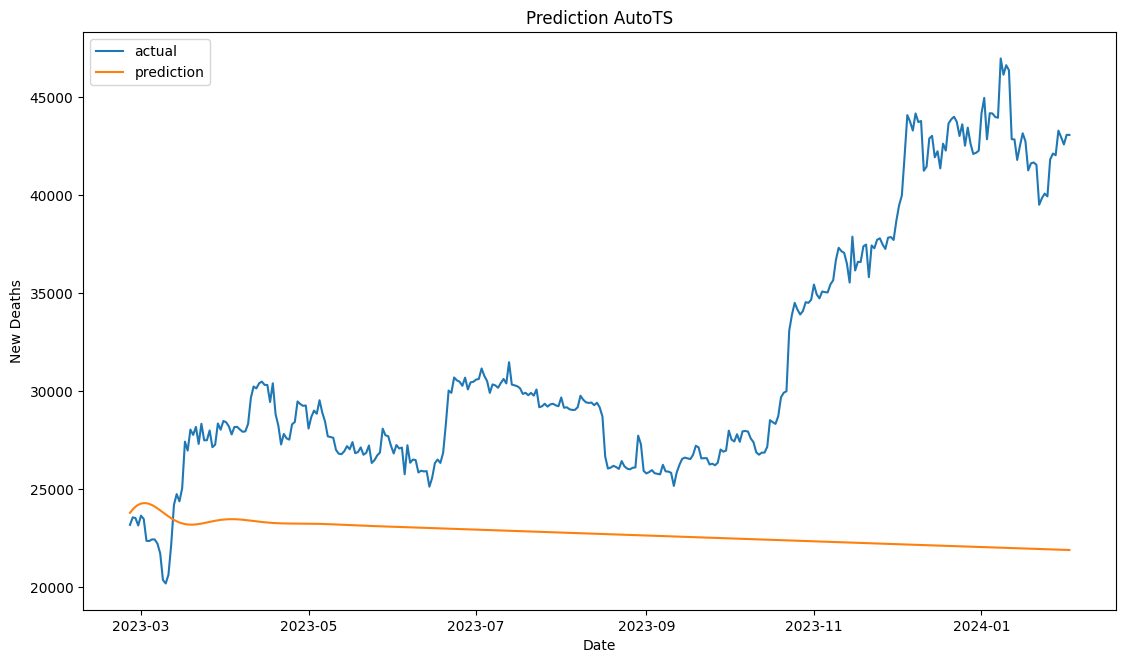

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(1280 / 96, 720 / 96))
ax.plot(dates[int(data_length*train_split):], test[target_column].values, label="actual")
ax.plot(dates[int(data_length*train_split):], prediction.forecast, label="prediction")
ax.set_title("Prediction AutoTS")
ax.set_ylabel("New Deaths")
ax.set_xlabel(date_column)
ax.legend()
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
plt.show()

Metrics

In [ ]:
max(prediction.forecast[target_column])

24287.330994966283

In [ ]:
non_zero = []
import sys
 
for i in prediction.forecast[target_column]:
    if i == 0:
        non_zero.append(i+sys.float_info.min)
    else:
        non_zero.append(i)
print_evaluation_metrics(non_zero, test[target_column])

Evaluation Metrics:
MSE: 120638369.09
RMSE: 10983.55
MAE: 8800.29
MAPE: 25.33
SMAPE: 30.45
